# Credit EDA Assignment

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# To display columns and rows as there are significant amount of columns
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 700)
 

In [2]:
# Reading Data From CSV
df0=pd.read_csv('application_data.csv')
df1=pd.read_csv('previous_application.csv')

In [3]:
# We will first look into df0 which has application data
df0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
# Lets look at the shape and info of the dataframe
print('Shape of dataframe', df0.shape)
print('--------------------------------')
print(df0.info(verbose=True, show_counts=True)) #verbose to print full summary and show_counts to display non null counts.

Shape of dataframe (307511, 122)
--------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE        

In [5]:
# Let's take a look at counts of null values
print(df0.isna().mean()*100)
#there are null values in plenty of columns, lets exclude the columns where there aren't any null values
print(len( df0.columns[df0.isna().any()] ))

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [6]:
# Lets keep a cap of 45%, variables greater than 45 are dropped
truncate_columns=(df0.isna().mean()*100)
truncate_columns[ truncate_columns>45 ].keys()
df0.drop(truncate_columns[ truncate_columns>45 ].keys(), axis=1, inplace=True )
df0.head()
df0.shape

(307511, 73)

## A) Identification of Missing values and Outliers


In [7]:
df0.dtypes.value_counts()

int64      41
float64    20
object     12
dtype: int64

In [8]:
totals=df0.isna().sum()
percentage=round( df0.isna().mean()*100, 2 )
null_col=pd.concat([totals,percentage], axis=1, keys=['Null records', 'Percentage']).sort_values(by="Percentage")
null_col[null_col['Percentage']>0]
# lets look at less percentage of null values and treat them.

Null records  Percentage
AMT_GOODS_PRICE                      278        0.09
EXT_SOURCE_2                         660        0.21
OBS_30_CNT_SOCIAL_CIRCLE            1021        0.33
DEF_30_CNT_SOCIAL_CIRCLE            1021        0.33
OBS_60_CNT_SOCIAL_CIRCLE            1021        0.33
DEF_60_CNT_SOCIAL_CIRCLE            1021        0.33
NAME_TYPE_SUITE                     1292        0.42
AMT_REQ_CREDIT_BUREAU_QRT          41519       13.50
AMT_REQ_CREDIT_BUREAU_HOUR         41519       13.50
AMT_REQ_CREDIT_BUREAU_DAY          41519       13.50
AMT_REQ_CREDIT_BUREAU_WEEK         41519       13.50
AMT_REQ_CREDIT_BUREAU_MON          41519       13.50
AMT_REQ_CREDIT_BUREAU_YEAR         41519       13.50
EXT_SOURCE_3                       60965       19.83
OCCUPATION_TYPE                    96391       31.35

### Analysis of AMT_GOODS_PRICE 


In [9]:
def box_analysis(var):
    plt.style.use('ggplot')
    sns.boxplot(x=df0[var])
    plt.title(f'Analysis of {var}')
    plt.show()

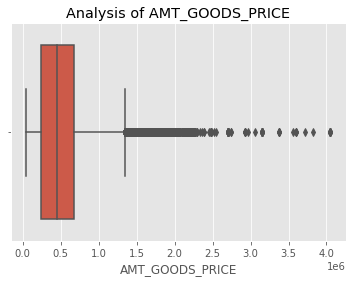

In [10]:

box_analysis('AMT_GOODS_PRICE')


`There are large amount of potential outliers`

In [11]:
print(df0['AMT_GOODS_PRICE'].describe())
print('Median is',df0['AMT_GOODS_PRICE'].median())
print('Mode is',df0['AMT_GOODS_PRICE'].mode()[0])

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64
Median is 450000.0
Mode is 450000.0


#### `Result: Median and mode are identical and the percentage of null records is 0.09%, so if we impute them it won't make them biased`

In [12]:
df0['AMT_GOODS_PRICE'].fillna(df0['AMT_GOODS_PRICE'].median(), inplace=True) #Replaced null with median/mode
 
df0['AMT_GOODS_PRICE'].isna().sum()#confirmation as null are imputed

0

### Analysis of EXT_SOURCE_2


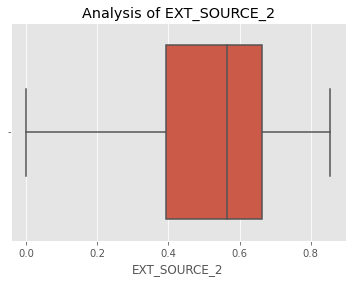

In [13]:

box_analysis('EXT_SOURCE_2')


### `No outliers are observed`

In [14]:
print(df0['EXT_SOURCE_2'].describe())
print('Median is',df0['EXT_SOURCE_2'].median())
print('Mode is',df0['EXT_SOURCE_2'].mode()[0])

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64
Median is 0.5659614260608526
Mode is 0.2858978721410488


### `Result: Mode and median are very close and the percentage of null records is 0.21% so  imputing records won't create any biasness`

In [15]:
#Imputing EXT_SOURCE_2 with median 
df0['EXT_SOURCE_2'].fillna(df0['EXT_SOURCE_2'].median(), inplace=True)
df0['EXT_SOURCE_2'].isna().sum()#confirmation as null are imputed

0

### Analysis of OBS_30_CNT_SOCIAL_CIRCLE


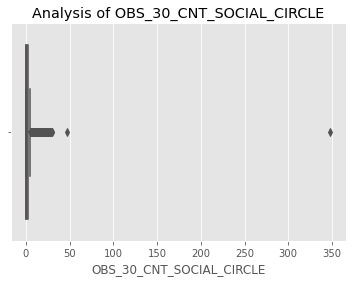

In [16]:

box_analysis('OBS_30_CNT_SOCIAL_CIRCLE')

#### `There are some potential outliers observed,boxplot is slim`

In [17]:
print(df0['OBS_30_CNT_SOCIAL_CIRCLE'].describe())
print('Median is',df0['OBS_30_CNT_SOCIAL_CIRCLE'].median())
print('Mode is',df0['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0])

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64
Median is 0.0
Mode is 0.0


In [18]:
df0['OBS_30_CNT_SOCIAL_CIRCLE'].quantile([0.9,0.95,1])

0.90      4.0
0.95      6.0
1.00    348.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

#### `Result: Median and mode are identical and the percentage of null records is 0.33%, so if we impute them it won't make them biased`

In [19]:
#Imputing with median 
df0['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df0['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)
df0['OBS_30_CNT_SOCIAL_CIRCLE'].isna().sum()#confirmation as null are imputed

0

###  Analysis of DEF_30_CNT_SOCIAL_CIRCLE

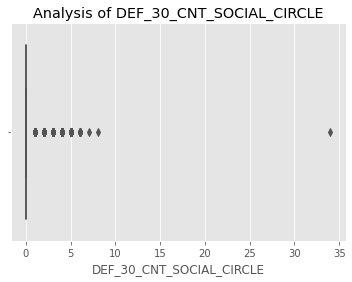

In [20]:

box_analysis('DEF_30_CNT_SOCIAL_CIRCLE')

#### `There are some potential outliers observed,box plot is slim`

In [21]:
print(df0['DEF_30_CNT_SOCIAL_CIRCLE'].describe())
print('Median is',df0['DEF_30_CNT_SOCIAL_CIRCLE'].median())
print('Mode is',df0['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0])

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64
Median is 0.0
Mode is 0.0


In [22]:
df0['DEF_30_CNT_SOCIAL_CIRCLE'].quantile([0.9,0.96,1])

0.90     1.0
0.96     1.0
1.00    34.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

#### `Result: Median and mode are identical and the percentage of null records is 0.33%, so if we impute them it won't make them biased`

In [23]:
#Imputing with median 
df0['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(df0['DEF_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)
df0['DEF_30_CNT_SOCIAL_CIRCLE'].isna().sum()#confirmation as null are imputed

0

### Analysis of OBS_60_CNT_SOCIAL_CIRCLE 


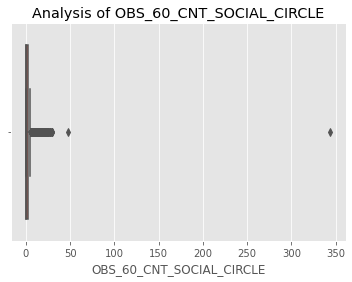

In [24]:

box_analysis('OBS_60_CNT_SOCIAL_CIRCLE')

#### `There are some potential outliers observed, boxplot is slim`

In [25]:
print(df0['OBS_60_CNT_SOCIAL_CIRCLE'].describe())
print('Median is',df0['OBS_60_CNT_SOCIAL_CIRCLE'].median())
print('Mode is',df0['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0])

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64
Median is 0.0
Mode is 0.0


#### `Result: Median and mode are identical and the percentage of null records is 0.33%, so if we impute them it won't make them biased`

In [26]:
#Imputing with median 
df0['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(df0['OBS_60_CNT_SOCIAL_CIRCLE'].median(), inplace=True)
df0['OBS_60_CNT_SOCIAL_CIRCLE'].isna().sum()#confirmation as null are imputed

0

###  Analysis of DEF_60_CNT_SOCIAL_CIRCLE

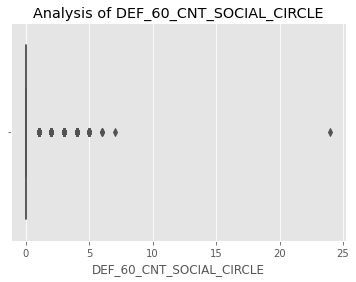

In [27]:

box_analysis('DEF_60_CNT_SOCIAL_CIRCLE')

### `There are some potential outliers observed, and boxplot is slim`

In [28]:
print(df0['DEF_60_CNT_SOCIAL_CIRCLE'].describe())
print('Median is',df0['DEF_60_CNT_SOCIAL_CIRCLE'].median())
print('Mode is',df0['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0])

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64
Median is 0.0
Mode is 0.0


#### `Result: Median and mode are identical and the percentage of null records is 0.33%, so if we impute them it won't make them biased`

In [29]:
#Imputing with median 
df0['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(df0['DEF_60_CNT_SOCIAL_CIRCLE'].median(), inplace=True)
df0['DEF_60_CNT_SOCIAL_CIRCLE'].isna().sum()#confirmation as null are imputed

0

In [30]:
#Lets take a look at remaining null values
r_totals=df0.isna().sum()
r_percentage=round( df0.isna().mean()*100, 2 )
null_col=pd.concat([r_totals,r_percentage], axis=1, keys=['Null records', 'Percentage']).sort_values(by="Percentage")
null_col[null_col['Percentage']>0]


Null records  Percentage
NAME_TYPE_SUITE                     1292        0.42
AMT_REQ_CREDIT_BUREAU_QRT          41519       13.50
AMT_REQ_CREDIT_BUREAU_HOUR         41519       13.50
AMT_REQ_CREDIT_BUREAU_DAY          41519       13.50
AMT_REQ_CREDIT_BUREAU_WEEK         41519       13.50
AMT_REQ_CREDIT_BUREAU_MON          41519       13.50
AMT_REQ_CREDIT_BUREAU_YEAR         41519       13.50
EXT_SOURCE_3                       60965       19.83
OCCUPATION_TYPE                    96391       31.35

### Analysis of NAME_TYPE_SUITE

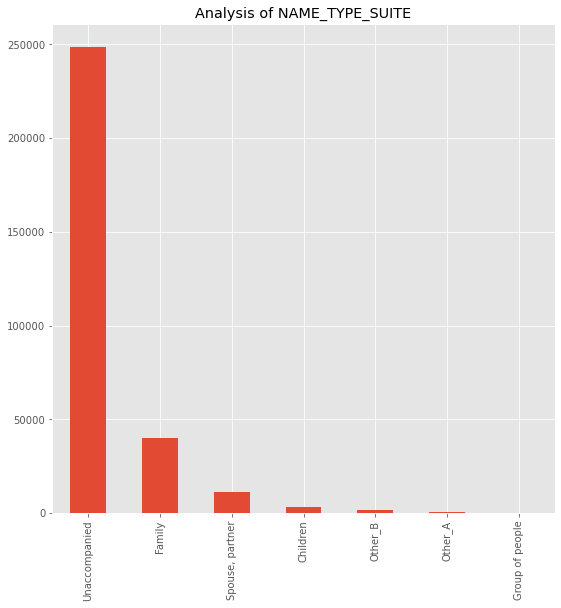

In [31]:
plt.figure(figsize=(9,9))
df0['NAME_TYPE_SUITE'].value_counts().plot.bar()
plt.title('Analysis of NAME_TYPE_SUITE')
plt.show()


In [32]:
(df0['NAME_TYPE_SUITE'].value_counts())

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [33]:
df0['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

`Result: As we can see 'Unaccompanied' has highest frequency , so we can impute null values with 'Unaccompanied' as the null values is 0.42% only so it won't create any biasness`

In [34]:
df0['NAME_TYPE_SUITE'].mode()[0]

'Unaccompanied'

In [35]:
#Imputing with mode 
df0['NAME_TYPE_SUITE'].fillna(df0['NAME_TYPE_SUITE'].mode()[0], inplace=True)
df0['NAME_TYPE_SUITE'].isna().sum()#confirmation as null are imputed

0

### List of records who have  percentage of null values greater than 10

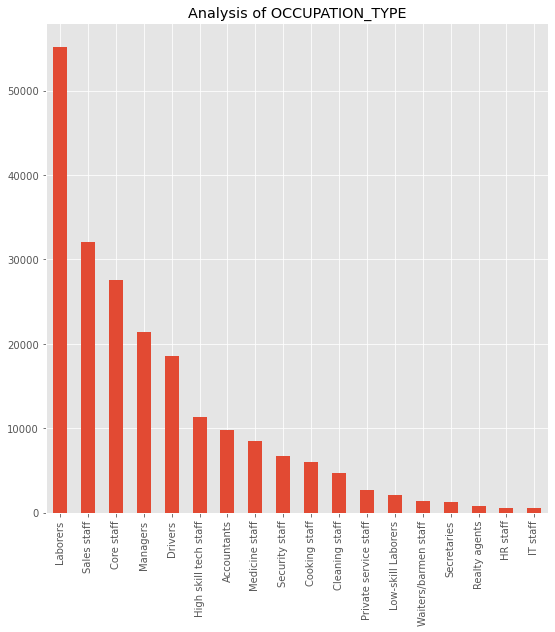

In [36]:
plt.figure(figsize=(9,9))
df0['OCCUPATION_TYPE'].value_counts().plot.bar()
plt.title('Analysis of OCCUPATION_TYPE')
plt.show()

### Result: There are Higher number of null values, approximately 96391, if we replace them with mode it will create biasness, so we will replace them with 'Others' as this is a categorical variable


In [37]:
df0['OCCUPATION_TYPE'].fillna('Others', inplace=True) #Replaced null with "Others category"
df0['OCCUPATION_TYPE'].isna().sum() #confirmation as null are imputed

0

In [38]:
records=['AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK'
,'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR','EXT_SOURCE_3']
df0[records].describe()


AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_HOUR  \
count              265992.000000               265992.000000   
mean                    0.265474                    0.006402   
std                     0.794056                    0.083849   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                   261.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     9.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_YEAR   EXT_SOURCE_3  
count              265992.000000               265992.000000  246546.000000  
mean                    0.267395                    1.899974       0.510853  
std                     0.916002                    1.869295       0.194844  
min                     0.000000                    0.000000       0.000527  
25%                     0.000000                    0.000000       0.370650  
50%                     0.000000                    1.000000       0.535276  
75%                     0.000000                    3.000000       0.669057  
max                    27.000000                   25.000000       0.896010

In [39]:
df0[records].mode()

AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_YEAR  EXT_SOURCE_3  
0                        0.0                         0.0        0.7463

### Result: There are more than 12% of null values, so  based on mode/median we can impute them

In [40]:
df0['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(df0['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0], inplace=True)
df0['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(df0['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0], inplace=True)
df0['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(df0['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0], inplace=True)
df0['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df0['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0], inplace=True)
df0['AMT_REQ_CREDIT_BUREAU_MON'].fillna(df0['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0], inplace=True)
df0['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(df0['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0], inplace=True)
df0['EXT_SOURCE_3'].fillna(df0['EXT_SOURCE_3'].mode()[0], inplace=True)

df0[records].isna().sum()#confirmation after imputing

AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
EXT_SOURCE_3                  0
dtype: int64

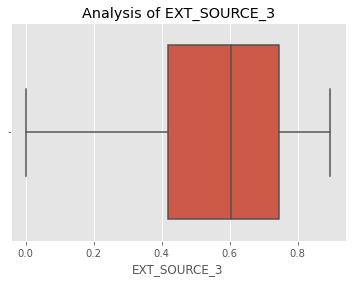

In [41]:
sns.boxplot(x=df0['EXT_SOURCE_3'])
plt.title('Analysis of EXT_SOURCE_3')
plt.show()


`No outliers observed`

<Figure size 720x648 with 0 Axes>

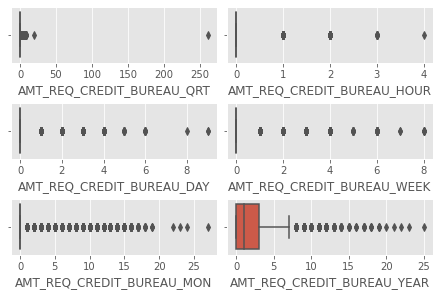

In [42]:
plt.figure(figsize=(10,9))
fig, axes = plt.subplots(3, 2, constrained_layout=True)
for i, j in zip(axes.flatten(),records):        #Using For loop 

    sns.boxplot(df0[j],ax=i)
plt.show()


`In each of the above boxplots there are potential outliers, AMT_REQ_CREDIT_BUREAU_QRT has potential outlier at 261,Following-> AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR  variables have slim boxplot`

In [43]:
df0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

### CODE_GENDER variable

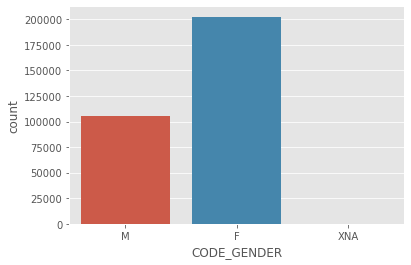

In [44]:
sns.countplot(x=df0['CODE_GENDER'])
plt.show()

In [45]:
df0['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [46]:
df0[ df0['CODE_GENDER']=='XNA' ]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
35657       141289       0    Revolving loans         XNA            Y   
38566       144669       0    Revolving loans         XNA            N   
83382       196708       0    Revolving loans         XNA            N   
189640      319880       0    Revolving loans         XNA            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35657                Y             0          207000.0    382500.0   
38566                Y             2          157500.0    270000.0   
83382                Y             1          135000.0    405000.0   
189640               Y             0          247500.0    540000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
35657       19125.0         337500.0   Unaccompanied               Working   
38566       13500.0         225000.0          Family               Working   
83382       20250.0         225000.0   Unaccompanied               Working   
189640      27000.0         900000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
35657   Secondary / secondary special            Married  Municipal apartment   
38566   Secondary / secondary special            Married    House / apartment   
83382                Higher education            Married    House / apartment   
189640              Incomplete higher     Civil marriage    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
35657                     0.020713      -20232         -10044   
38566                     0.026392      -13717          -2797   
83382                     0.035792      -10647          -1228   
189640                    0.035792       -9649          -2293   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
35657            -10024.0            -3537           1               1   
38566             -2241.0            -4659           1               1   
83382              -183.0            -1671           1               1   
189640            -4099.0            -2326           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
35657                 1                 1           1           0   
38566                 1                 1           1           0   
83382                 1                 1           1           0   
189640                1                 1           1           0   

           OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
35657               Others              2.0                     3   
38566   Low-skill Laborers              4.0                     2   
83382           Core staff              3.0                     2   
189640              Others              2.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
35657                             3                    TUESDAY   
38566                             2                     FRIDAY   
83382                             2                   THURSDAY   
189640                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
35657                        10                           0   
38566                        16                           0   
83382                        15                           0   
189640                       15                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
35657                            0                            0   
38566                            0                            0   
83382                            0                            0   
189640                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
35657                        0                       0   
3

### Result:As there are only 4 (XNA) records in CODE_GENDER, we can impute it with F, as their frequency is much higher

In [47]:
# Imputing F in place of XNA
df0['CODE_GENDER']= df0['CODE_GENDER'].apply(lambda x: 'F' if x=='XNA' else x)
df0['CODE_GENDER'].value_counts() #Confirmation as there are no XNA values

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

### ORGANIZATION_TYPE categorical check

In [48]:
pd.unique(df0['ORGANIZATION_TYPE'])

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [49]:
df0['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [50]:
# It can be seen that there is a category named 'XNA' and it is imputed with 'Unknown' 
df0['ORGANIZATION_TYPE']= df0['ORGANIZATION_TYPE'].apply(lambda x: 'Unknown' if x=='XNA' else x)
df0[df0['ORGANIZATION_TYPE']=='XNA']#confirmation that XNA has been imputed

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_2, EXT_SOURCE_3, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR]
Index: []

In [51]:
df0.isna().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    12
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 2
REGION_RATING_

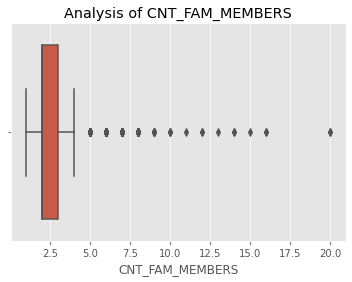

In [52]:

box_analysis('CNT_FAM_MEMBERS')

`Result: There are number of potential outliers,having children more than 5`

In [53]:
print(df0['CNT_FAM_MEMBERS'].describe())
print('Median is',df0['CNT_FAM_MEMBERS'].median())
print('Mode is',df0['CNT_FAM_MEMBERS'].mode()[0])

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64
Median is 2.0
Mode is 2.0


`Result as there are only 2 null, we can impute them with median/mode`

In [54]:
df0['CNT_FAM_MEMBERS'].isna().sum()

2

In [55]:
#Imputing with median 
df0['CNT_FAM_MEMBERS'].fillna(df0['CNT_FAM_MEMBERS'].median(), inplace=True)
df0['CNT_FAM_MEMBERS'].isna().sum()#confirmation as null are imputed

0

### AMT_ANNUITY variable

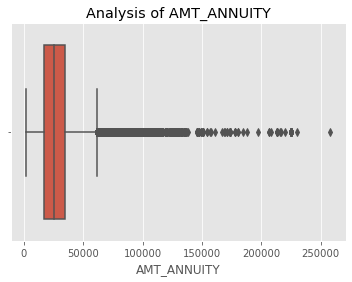

In [56]:

box_analysis('AMT_ANNUITY')

### Result:There are severe potential outliers in the variable, with maximum potential outlier ranging upto 258025.5

In [57]:
print(df0['AMT_ANNUITY'].describe())
print('Median is',df0['AMT_ANNUITY'].median())
print('Mode is',df0['AMT_ANNUITY'].mode()[0])

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64
Median is 24903.0
Mode is 9000.0


`As there are only 12 records with null values , we can impute them with median, as there is big difference between median and mode, median is prefferable`

In [58]:
#Imputing with median 
df0['AMT_ANNUITY'].fillna(df0['AMT_ANNUITY'].median(), inplace=True)
df0['AMT_ANNUITY'].isna().sum()#confirmation as null are imputed



0

## B) Data check

In [59]:
#Columns which have negative(-) sign needs to be converted to positive
df0['DAYS_BIRTH']=df0['DAYS_BIRTH'].apply( lambda x: -x if x<0 else x)
df0['DAYS_BIRTH']

0          9461
1         16765
2         19046
3         19005
4         19932
          ...  
307506     9327
307507    20775
307508    14966
307509    11961
307510    16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [60]:
df0['DAYS_EMPLOYED']=df0['DAYS_EMPLOYED'].abs()#another method to convert negative to positve

In [61]:
df0['DAYS_REGISTRATION']=df0['DAYS_REGISTRATION'].abs()

In [62]:
df0['DAYS_ID_PUBLISH']=df0['DAYS_ID_PUBLISH'].abs()
df0['DAYS_LAST_PHONE_CHANGE']=df0['DAYS_LAST_PHONE_CHANGE'].abs()

In [63]:
df0.head()
print(df0.dtypes)


SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

## C)Data Imbalance

In [64]:
df0['TARGET'].value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

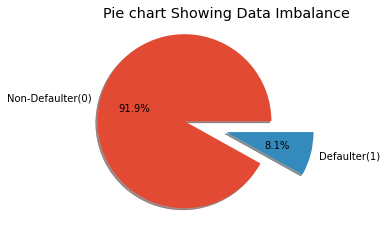

In [65]:
plt.title('Pie chart Showing Data Imbalance')
plt.pie(df0['TARGET'].value_counts(normalize=True)*100, labels=['Non-Defaulter(0)', 'Defaulter(1)'], autopct='%1.1f%%', shadow=True, explode=[0.5, 0])
plt.show()


`It is clear that there is an imbalance in data, as close to as 92% of people are non defaulters where as remaining 8% are defaulters.This holds true because the lesser the defaulters more efficiently bank works`

In [66]:
#Datatype conversion  'AMT_ANNUITY','WEEKDAY_APPR_PROCESS_START'
numeric_columns=list(df0.select_dtypes(include=['float64']).columns)
df0.dtypes
df0.loc[:,numeric_columns]=df0.loc[:,numeric_columns].apply(lambda x: x.astype('int',errors='ignore'))
print(df0.dtypes)


SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL                 int64
AMT_CREDIT                       int64
AMT_ANNUITY                      int64
AMT_GOODS_PRICE                  int64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE       int64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION                int64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [67]:
string_columns=list(df0.select_dtypes(include=['object']).columns)
df0.loc[:,string_columns]=df0.loc[:,string_columns].apply(lambda x: x.astype('str',errors='ignore'))


In [68]:
df0.head()


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0            202500      406597        24700   
1               N             0            270000     1293502        35698   
2               Y             0             67500      135000         6750   
3               Y             0            135000      312682        29686   
4               Y             0            121500      513000        21865   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0           351000   Unaccompanied          Working   
1          1129500          Family    State servant   
2           135000   Unaccompanied          Working   
3           297000   Unaccompanied          Working   
4           513000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                           0        9461            637               3648   
1                           0       16765           1188               1186   
2                           0       19046            225               4260   
3                           0       19005           3039               9833   
4                           0       19932           3038               4311   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers                1   
1                 1           1           0      Core staff                2   
2                 1           1           0        Laborers                1   
3                 1           0           0        Laborers                2   
4                 1           0           0      Core staff                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [69]:
df0['AGE']=df0['DAYS_BIRTH'].apply(lambda x : float(round(x/365, 0)))


## D) Binnning 

In [70]:
# We will bin the values into categories

df0["INCOME_GROUPS"] = pd.qcut(df0['AMT_INCOME_TOTAL'],q=[0,0.1,0.3,0.6,0.8,1],labels=['Very Low','Low','Medium','High','Very High'])
df0[["INCOME_GROUPS"]].value_counts()

INCOME_GROUPS
Medium           84302
High             75513
Low              67187
Very High        47118
Very Low         33391
dtype: int64

In [71]:
df0['AGE'].describe()

count    307511.000000
mean         43.938646
std          11.964047
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: AGE, dtype: float64

`Here minimum age is 21 and maximum age is 69, so we can bin them using arange(20,70,5) with step of 5 `

In [72]:
df0['AGE_GROUPS'] = pd.cut(df0['AGE'],bins=np.arange(20,70,5))
df0['AGE_GROUPS'].value_counts()

(35, 40]    43297
(40, 45]    40585
(30, 35]    39473
(45, 50]    34924
(50, 55]    34910
(25, 30]    34656
(55, 60]    33045
(60, 65]    25965
(20, 25]    14213
Name: AGE_GROUPS, dtype: int64

In [73]:
#can be used for analysis
df0['C/I_RATIO']=round((df0['AMT_CREDIT']/df0['AMT_INCOME_TOTAL'])) #Credit-income ratio
df0['SOCIAL_CIRCLE_30_DAYS_DEF_PERCENTAGE']=df0['DEF_30_CNT_SOCIAL_CIRCLE']/df0['OBS_30_CNT_SOCIAL_CIRCLE']
df0['SOCIAL_CIRCLE_60_DAYS_DEF_PERCENTAGE']=df0['DEF_60_CNT_SOCIAL_CIRCLE']/df0['OBS_60_CNT_SOCIAL_CIRCLE']

## E)Univariate Analysis

In [74]:
def uni_analysis(var):
        plt.figure(figsize=(7,7))
        plt.style.use("classic")
        sns.countplot(data=df0, x=var)
        plt.title(f'Analysis of {var}')
        plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
        plt.show()

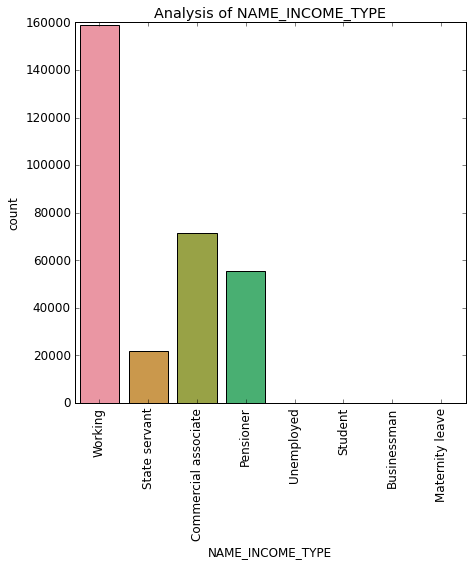

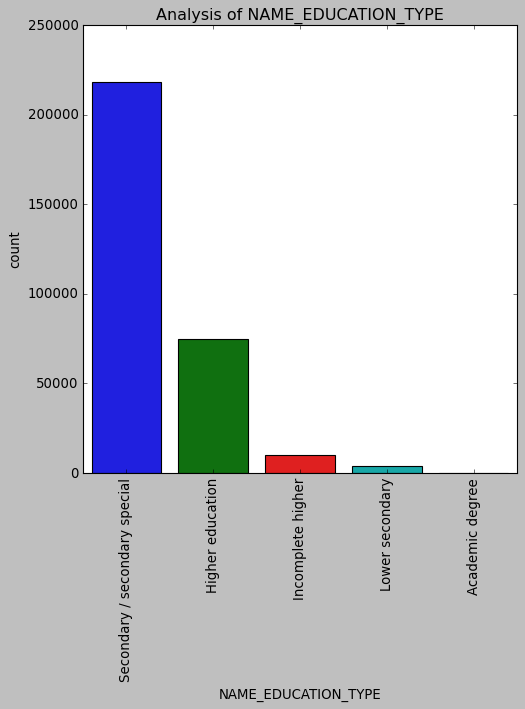

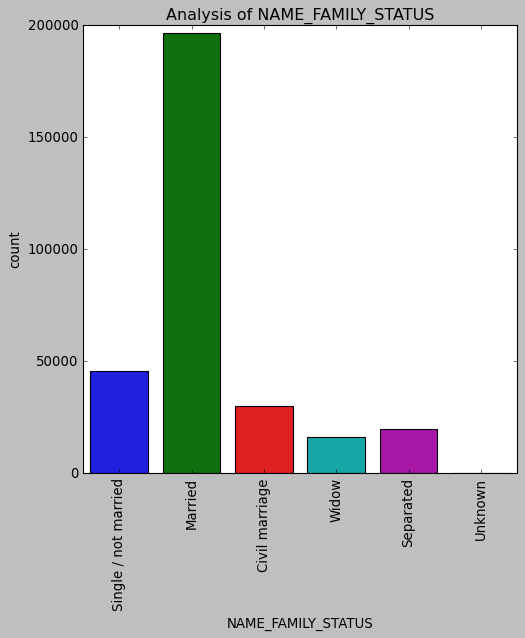

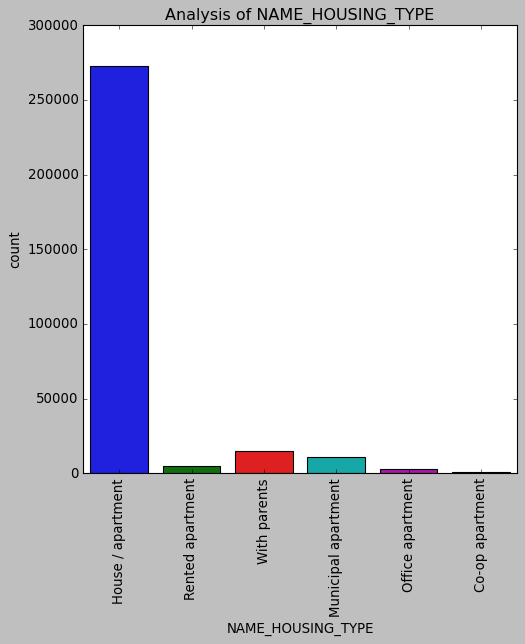

In [75]:
univariate_cols=['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
for i in univariate_cols:
    uni_analysis(i)


`Result: 1)NAME_INCOME_TYPE: Counts of working income type is much more than the rest
         2)NAME_EDUCATION_TYPE: Majority Clients belong to Secondary education type
         3)NAME_FAMILY_STATUS: Married people are more clients of bank
         4)NAME_HOUSING_TYPE:  Frequency count of clients having house/apartment is highest and that too by a big margin.`

#### Data Imbalance Ratio

In [76]:
target0=df0[ df0['TARGET'] == 0] #Non Defaulter 
target1=df0[ df0['TARGET'] == 1] #Defaulter
print(round(len(target0)/len(target1),2))

11.39


`The imbalance ratio is 11.39`

## F)Segmented Univariate Analysis

In [77]:
#reusable ploting function

def plotfunc(df,col,title,hue = None):
    
    sns.set_style('dark')
    sns.set_context("notebook", rc={"lines.linewidth": 3})
    plt.rcParams["axes.labelsize"] = 12
    plt.rcParams['axes.titlesize'] = 17
    plt.rcParams['axes.titlepad'] = 27
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 5 + 4*len(temp.unique())
    fig.set_size_inches(width , 7)
    plt.yscale('linear')
    plt.title(title,fontsize=14)
    ax = sns.countplot(data=df, x=col, hue=hue, palette='bright') 
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

    plt.show()

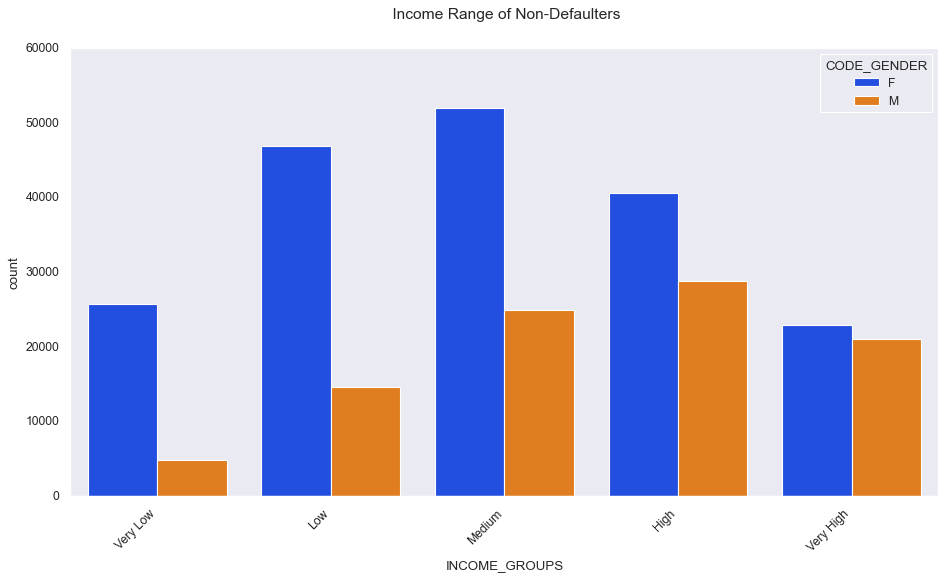

In [78]:
plotfunc(target0,col='INCOME_GROUPS',title=' Income Range of Non-Defaulters',hue='CODE_GENDER')


`Conclusion: For Non-Defaulters 
    1) The count of Female is more in every category
    2) For the first 3 categories frequency of malesis significantly lower` 

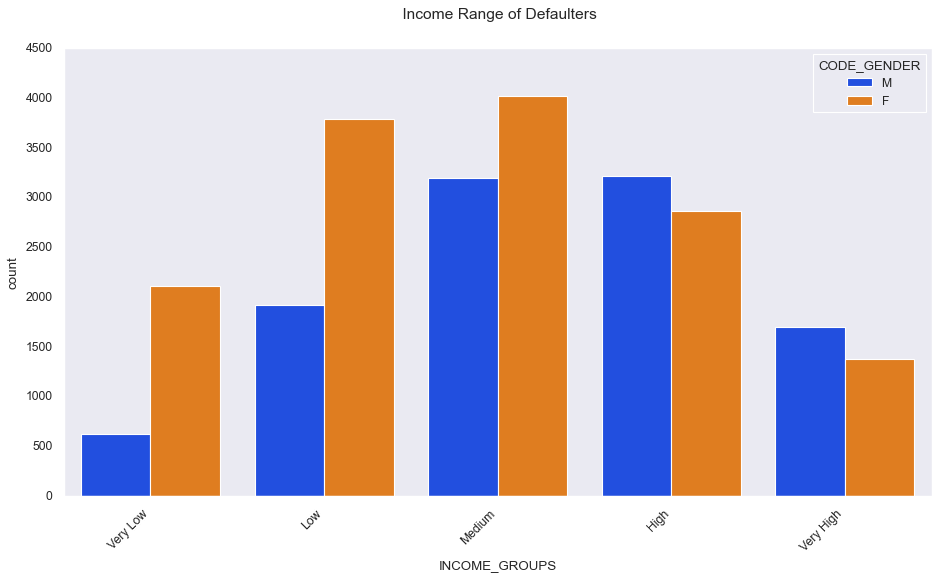

In [79]:
#Defaulter
plotfunc(target1,col='INCOME_GROUPS',title=' Income Range of Defaulters',hue='CODE_GENDER')


`Conclusion: For Defaulters 
    1) The count of Males is more for last 2 categories
    2) For the first category frequency of males is much low` 

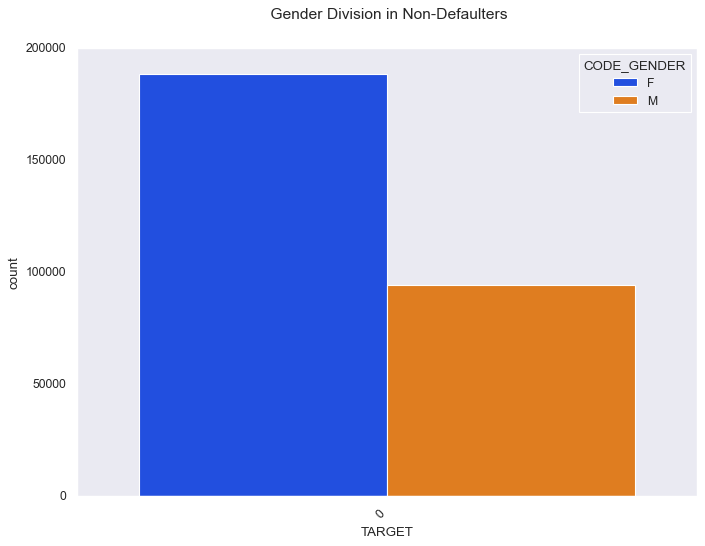

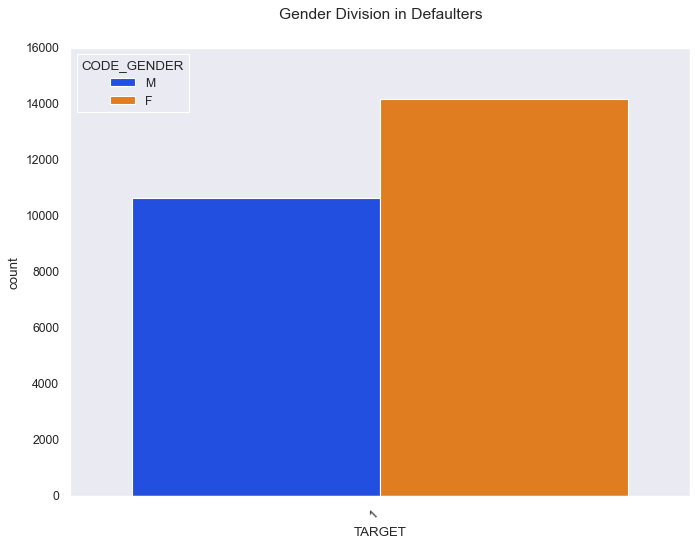

In [80]:
plotfunc(target0,col='TARGET',title=' Gender Division in Non-Defaulters', hue='CODE_GENDER')

plotfunc(target1,col='TARGET',title='Gender Division in Defaulters', hue='CODE_GENDER')


* Female clients have applied for loan more than Male clients
* The ratio of Female clients to male clients in Non-Defaulter category is more than Defaulter category


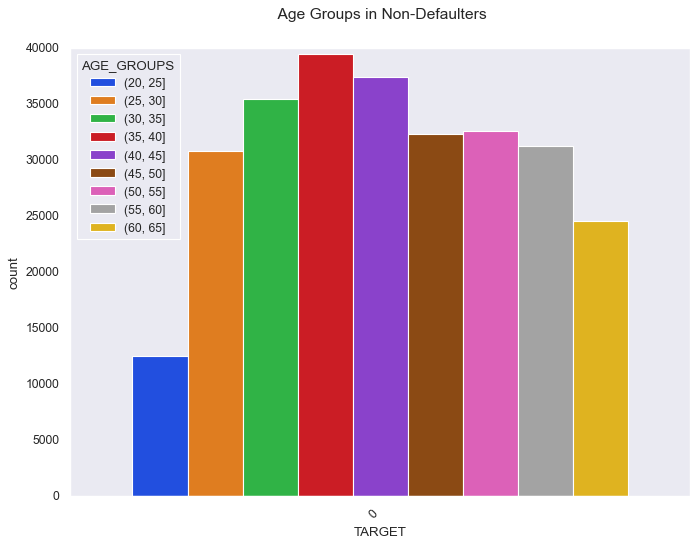

In [81]:
plotfunc(target0,col='TARGET',title=' Age Groups in Non-Defaulters', hue='AGE_GROUPS')



`Age group of (30,35] have higher frequency of taking loans in non defaulters list while (20,25] age group have least frequency`

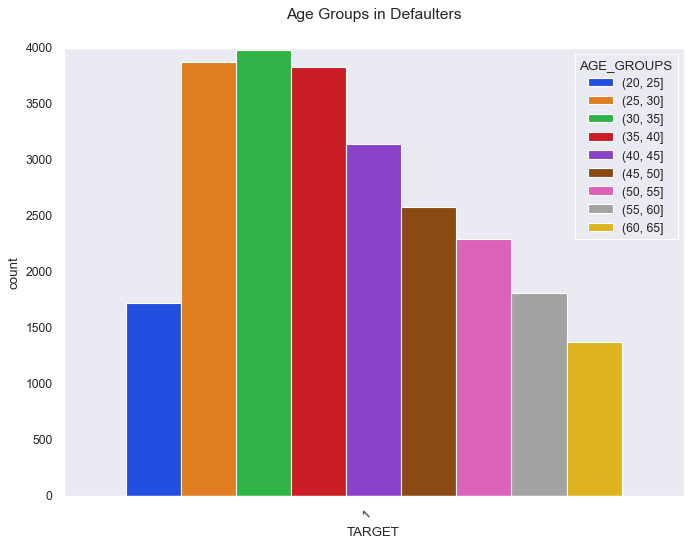

In [82]:
plotfunc(target1,col='TARGET',title='Age Groups in Defaulters', hue='AGE_GROUPS')


`Age group of (30,35] have higher frequency of taking loans in defaulters list, it can be noticed that from (40,45] age group the frequency decreases,meaning age group (30,35] have most difficulty paying loans`

### function and plotting of categorical analysis

In [83]:
def categorical_analysis(var):
    plt.figure(figsize=(40,20))
    
    plt.rcParams['axes.labelpad'] = 50
    plt.subplot(1, 2, 1)
    sns.countplot(var, data=target0, palette = 'Set3', hue='TARGET') 
    plt.xlabel(var, fontsize= 30, fontweight="bold")                                   
    plt.ylabel('No Difficulty in payment', fontsize= 20, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
    
    
    plt.rcParams['axes.labelpad'] = 50
    plt.subplot(1, 2, 2)
    sns.countplot(var, data=target1, palette = 'Set1', hue='TARGET')                     
    plt.xlabel(var, fontsize= 30, fontweight="bold")
    plt.ylabel('Difficulty in paying', fontsize= 20, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
    plt.show()

In [84]:
#list of all categorical columns
categories = list(df0.select_dtypes(include= ('category','object')).columns) 
print(categories)# we will use looping concept to loop over columns

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'INCOME_GROUPS', 'AGE_GROUPS']


<Figure size 160x160 with 0 Axes>

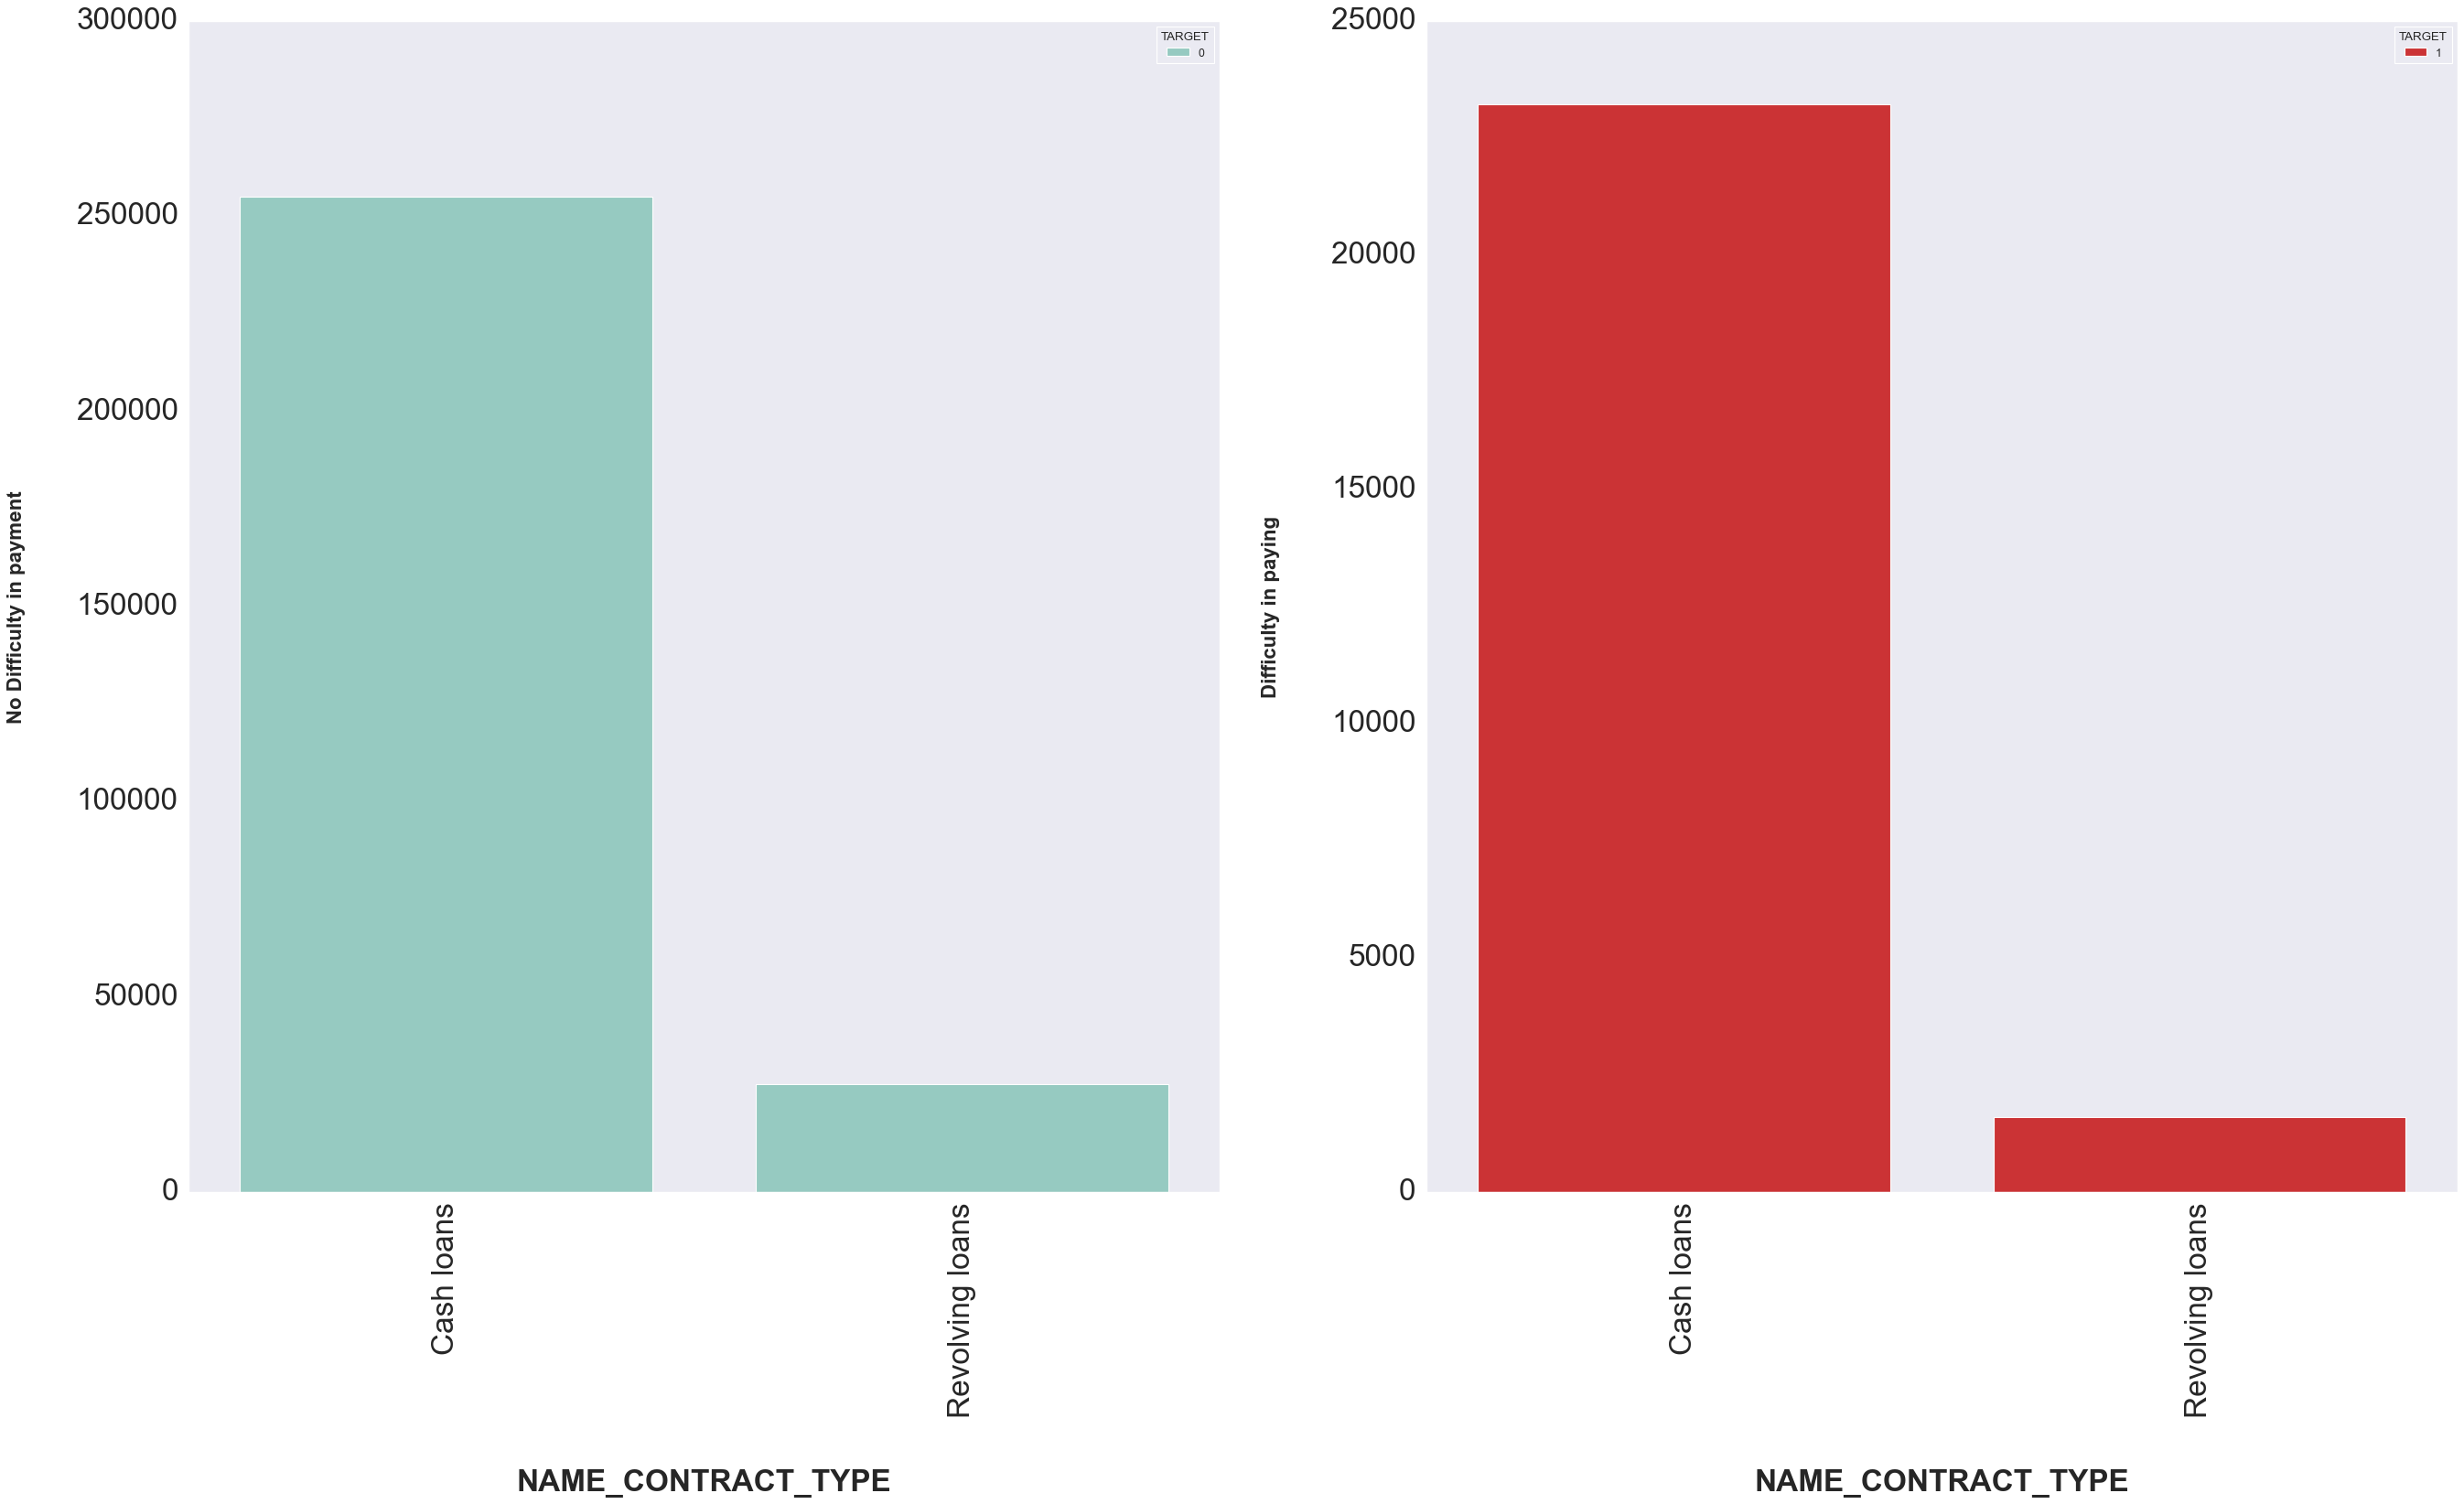

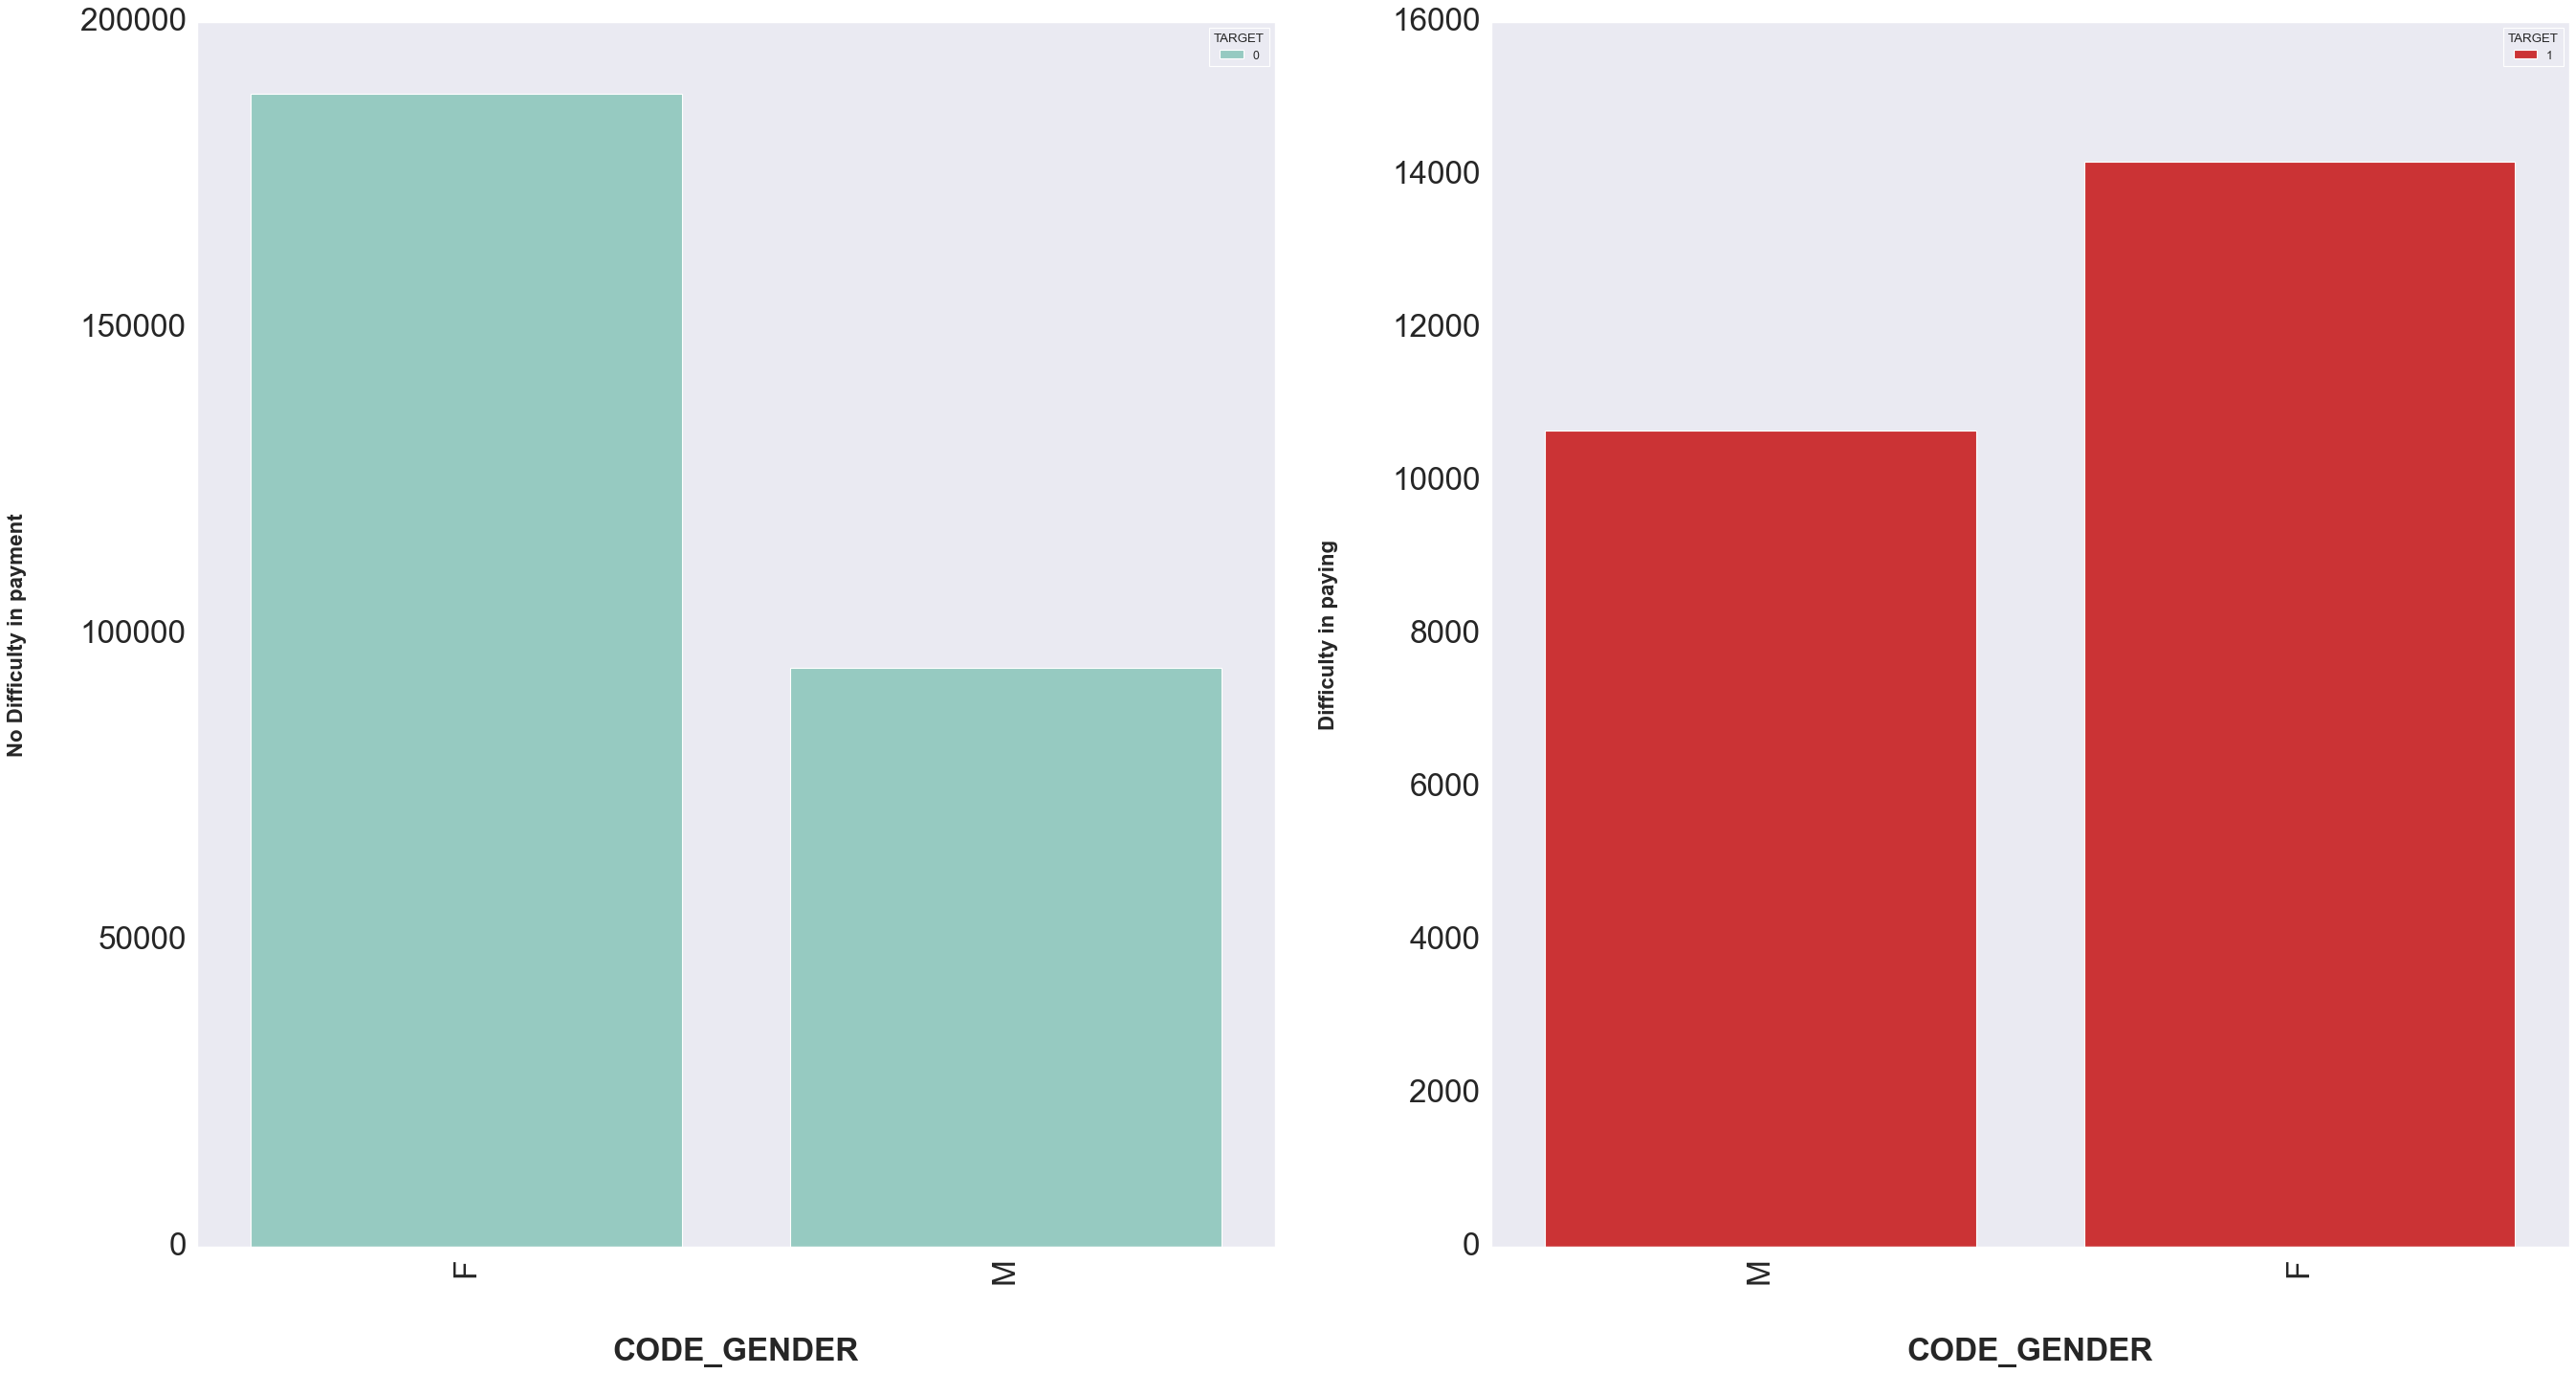

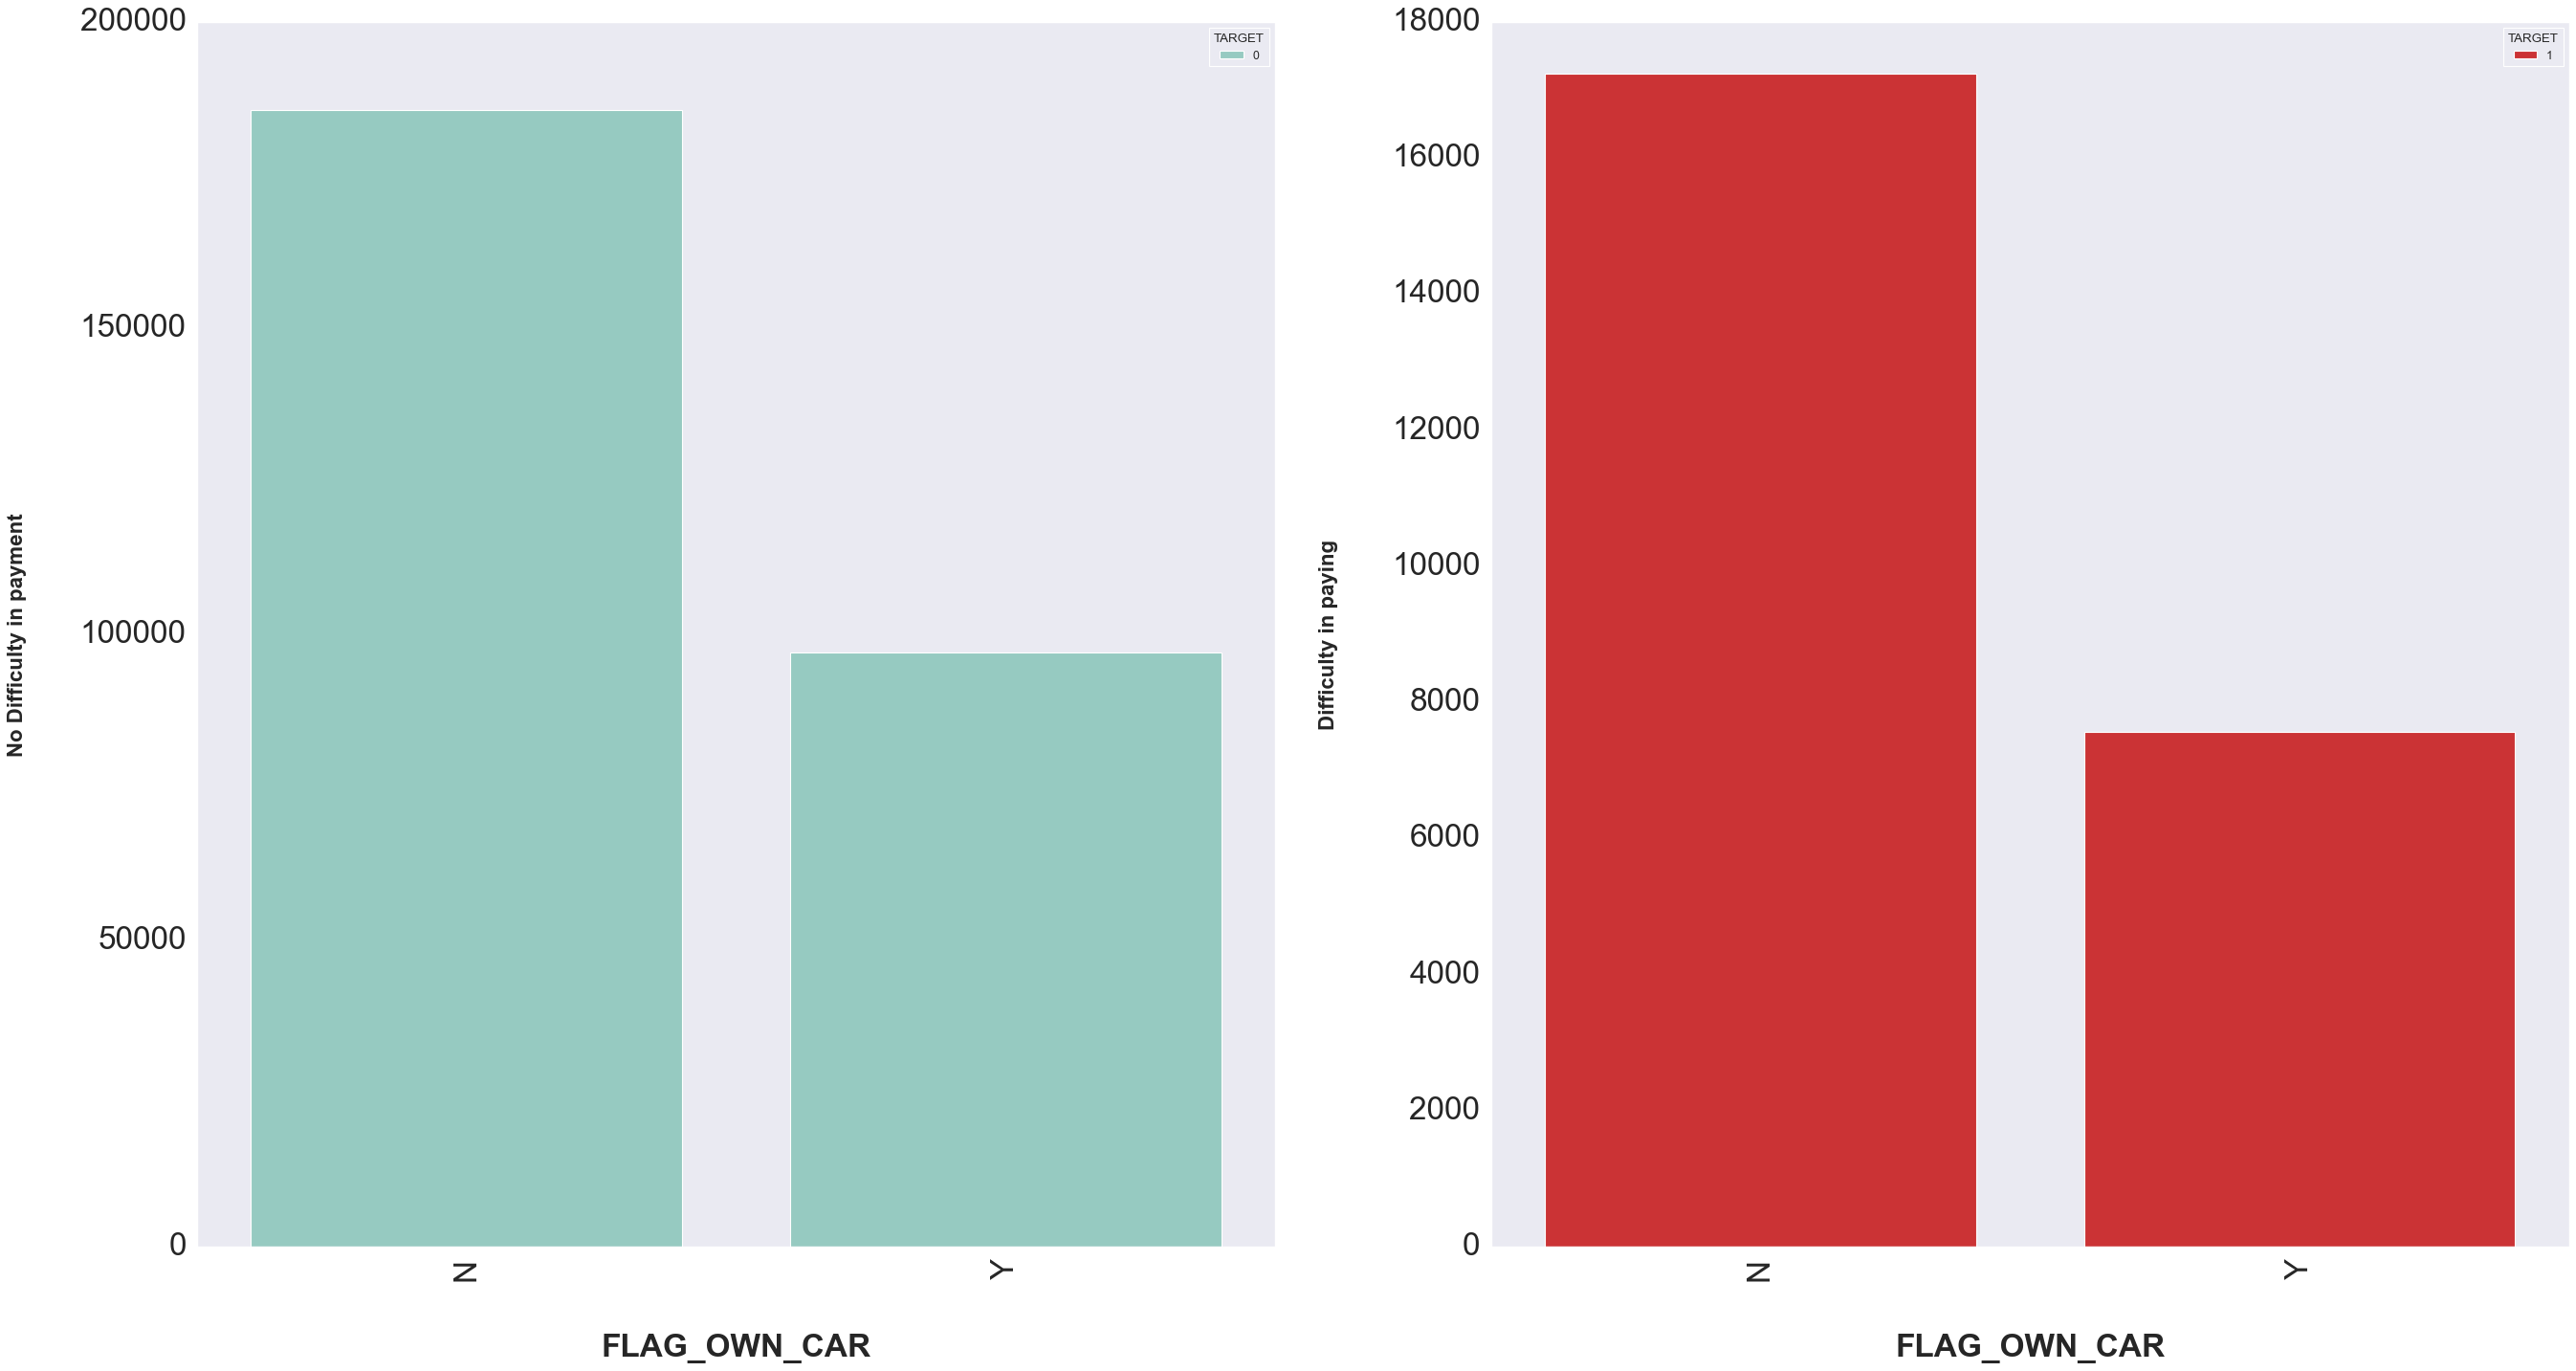

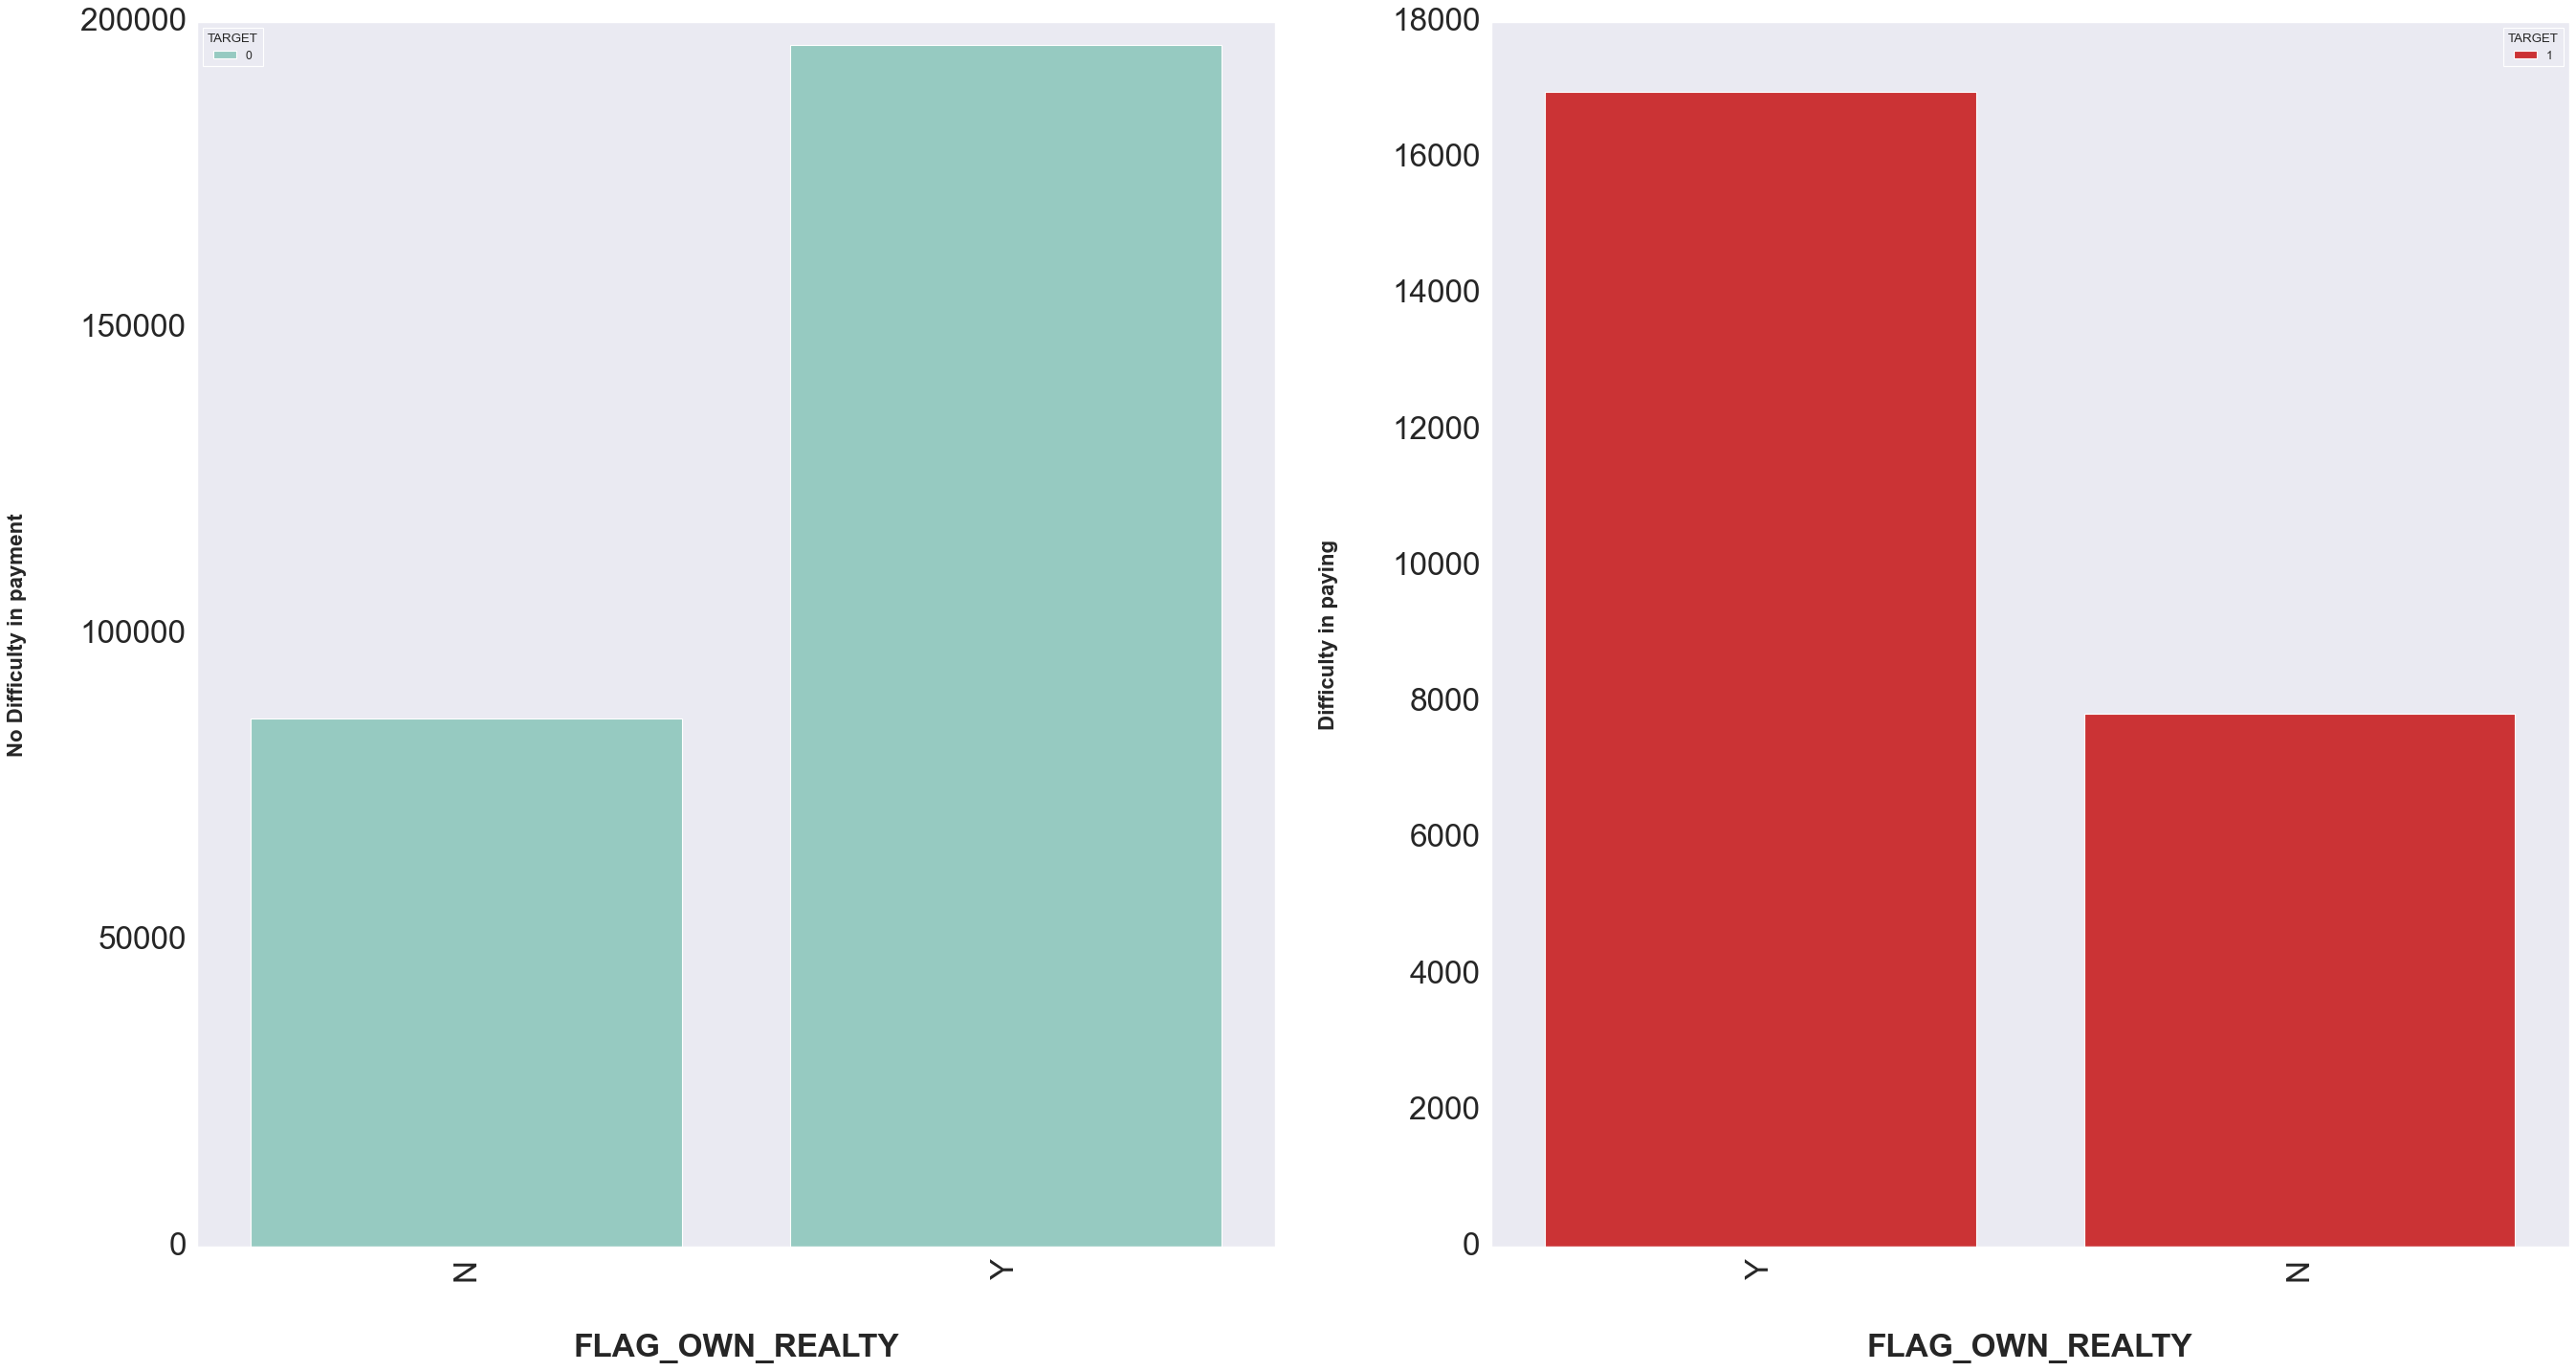

In [85]:
list1=categories[0:4]    #converted into list1,list2,list3,list4 because cells take much time executing 
list2=categories[4:8]
list3=categories[8:12]
list4=categories[12:16]

plt.figure(figsize=(2,2)) 

for i in list1:
    categorical_analysis(i)

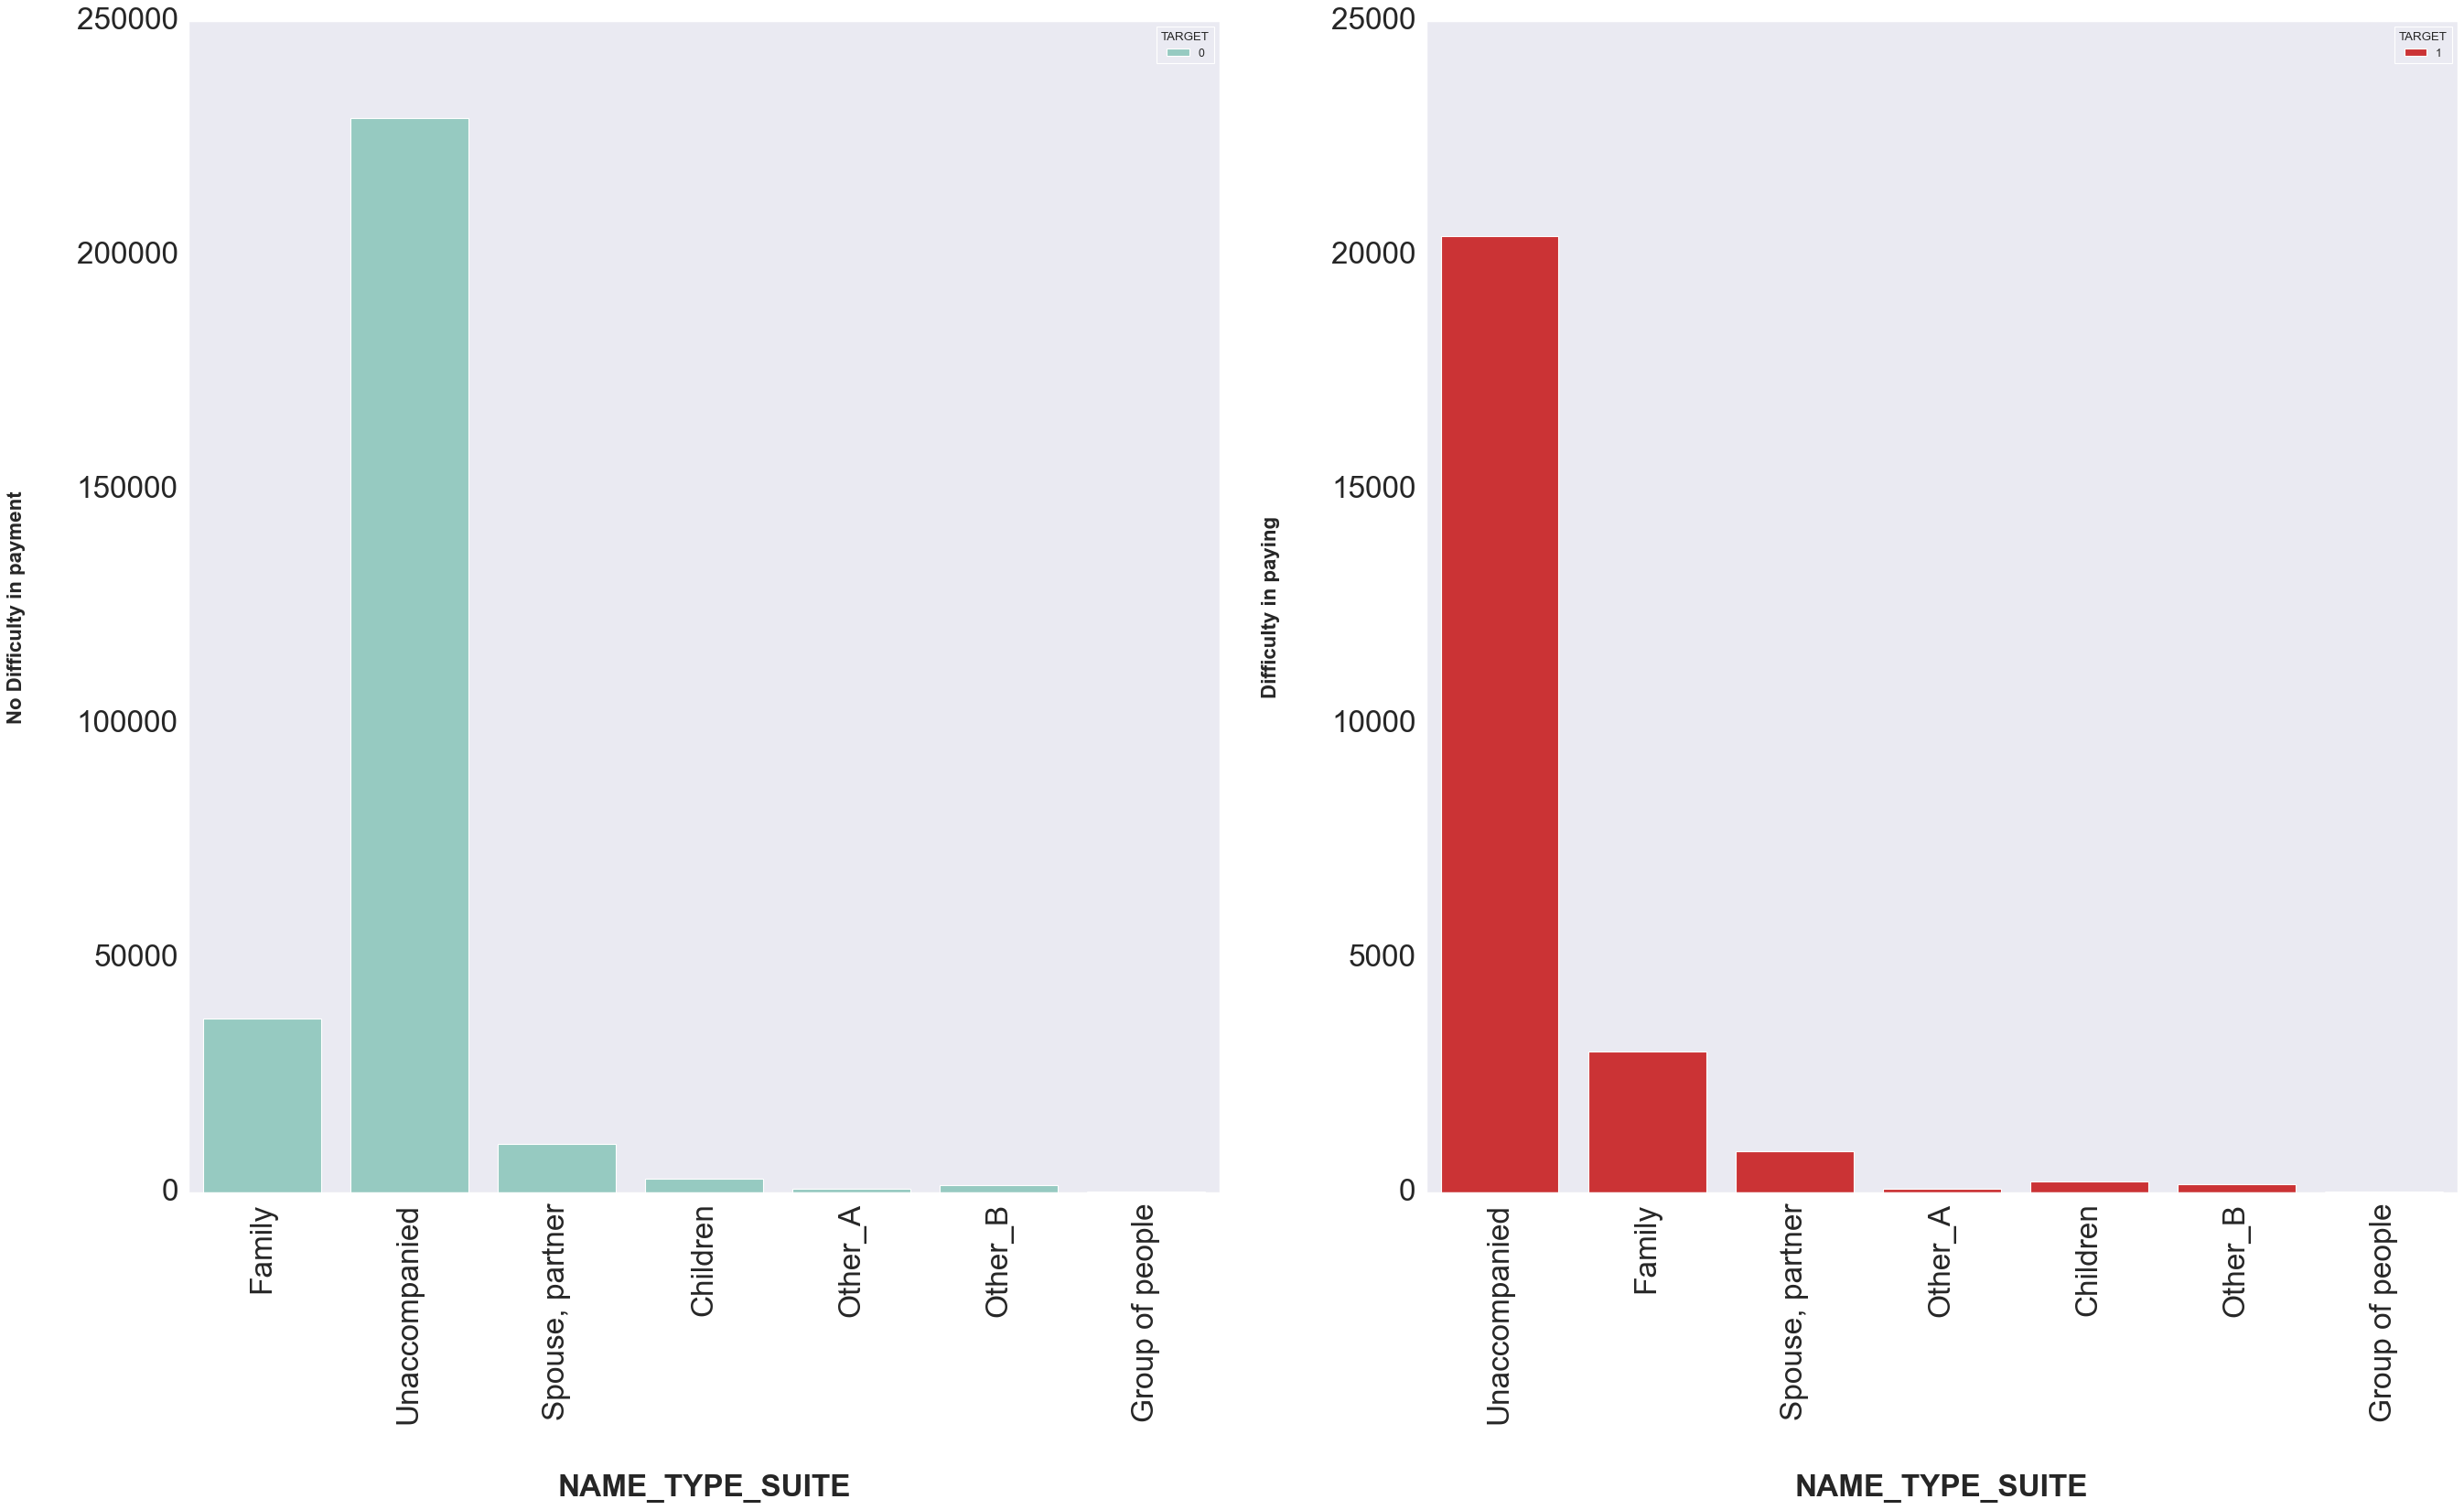

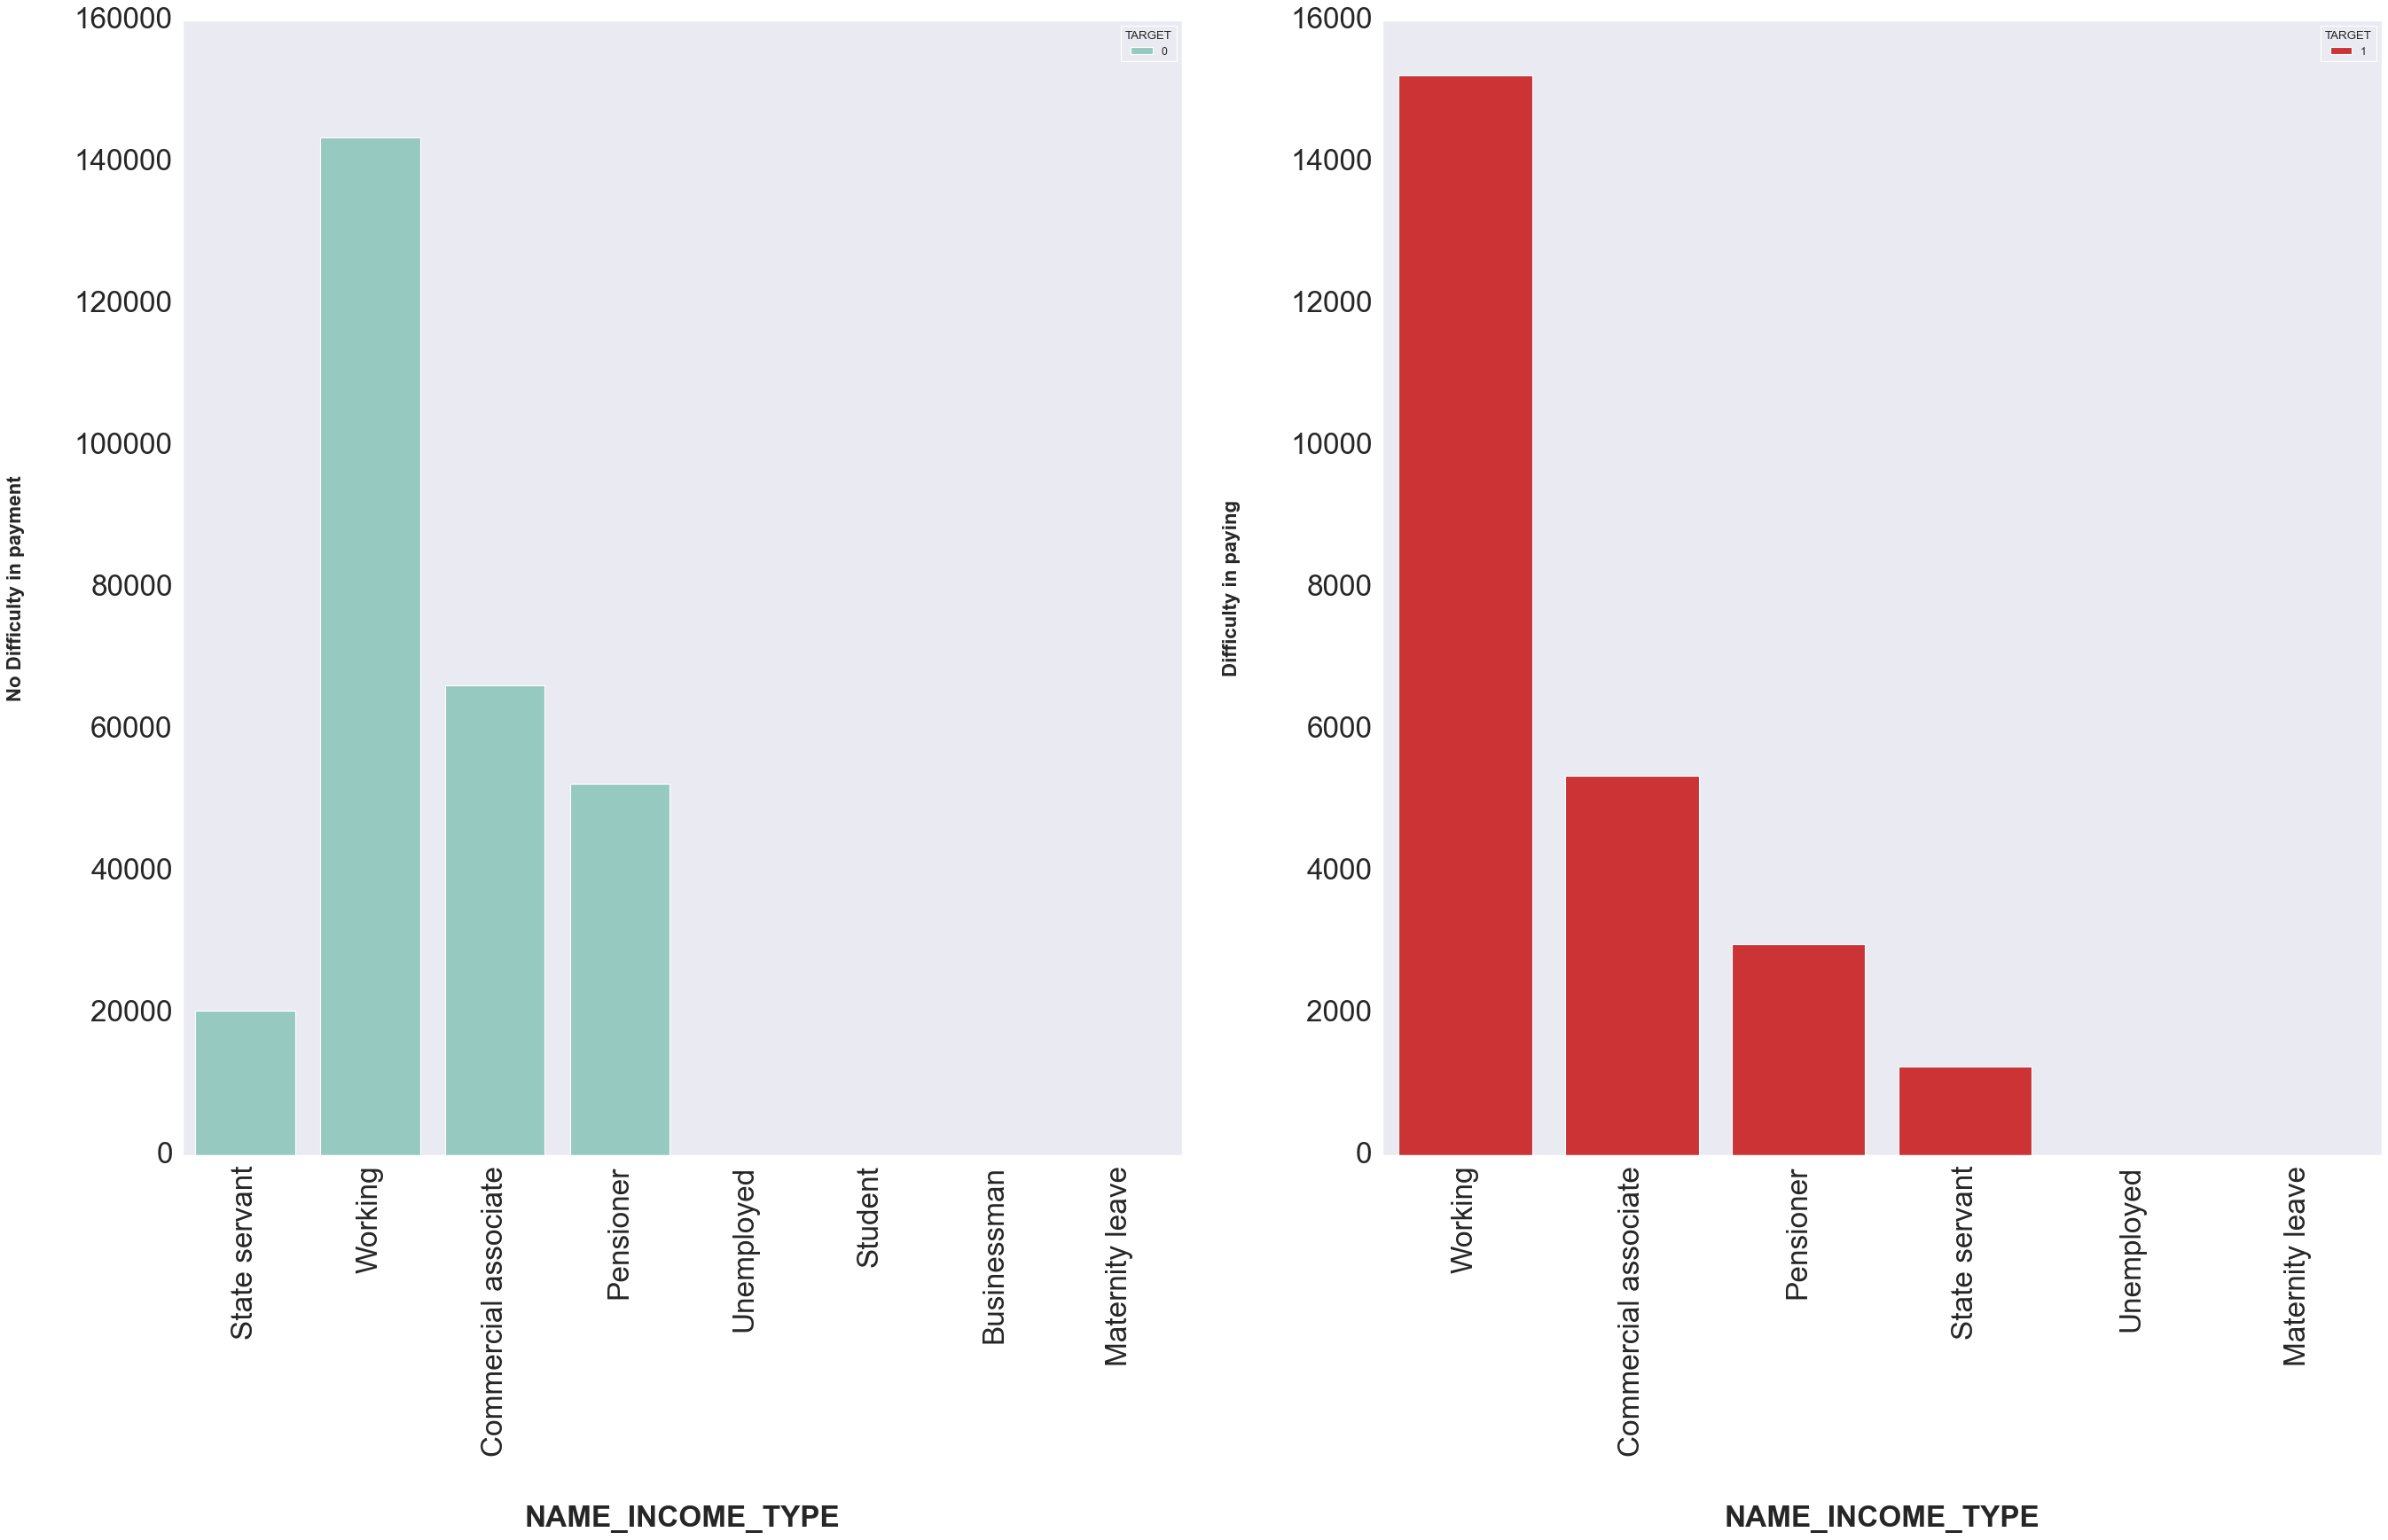

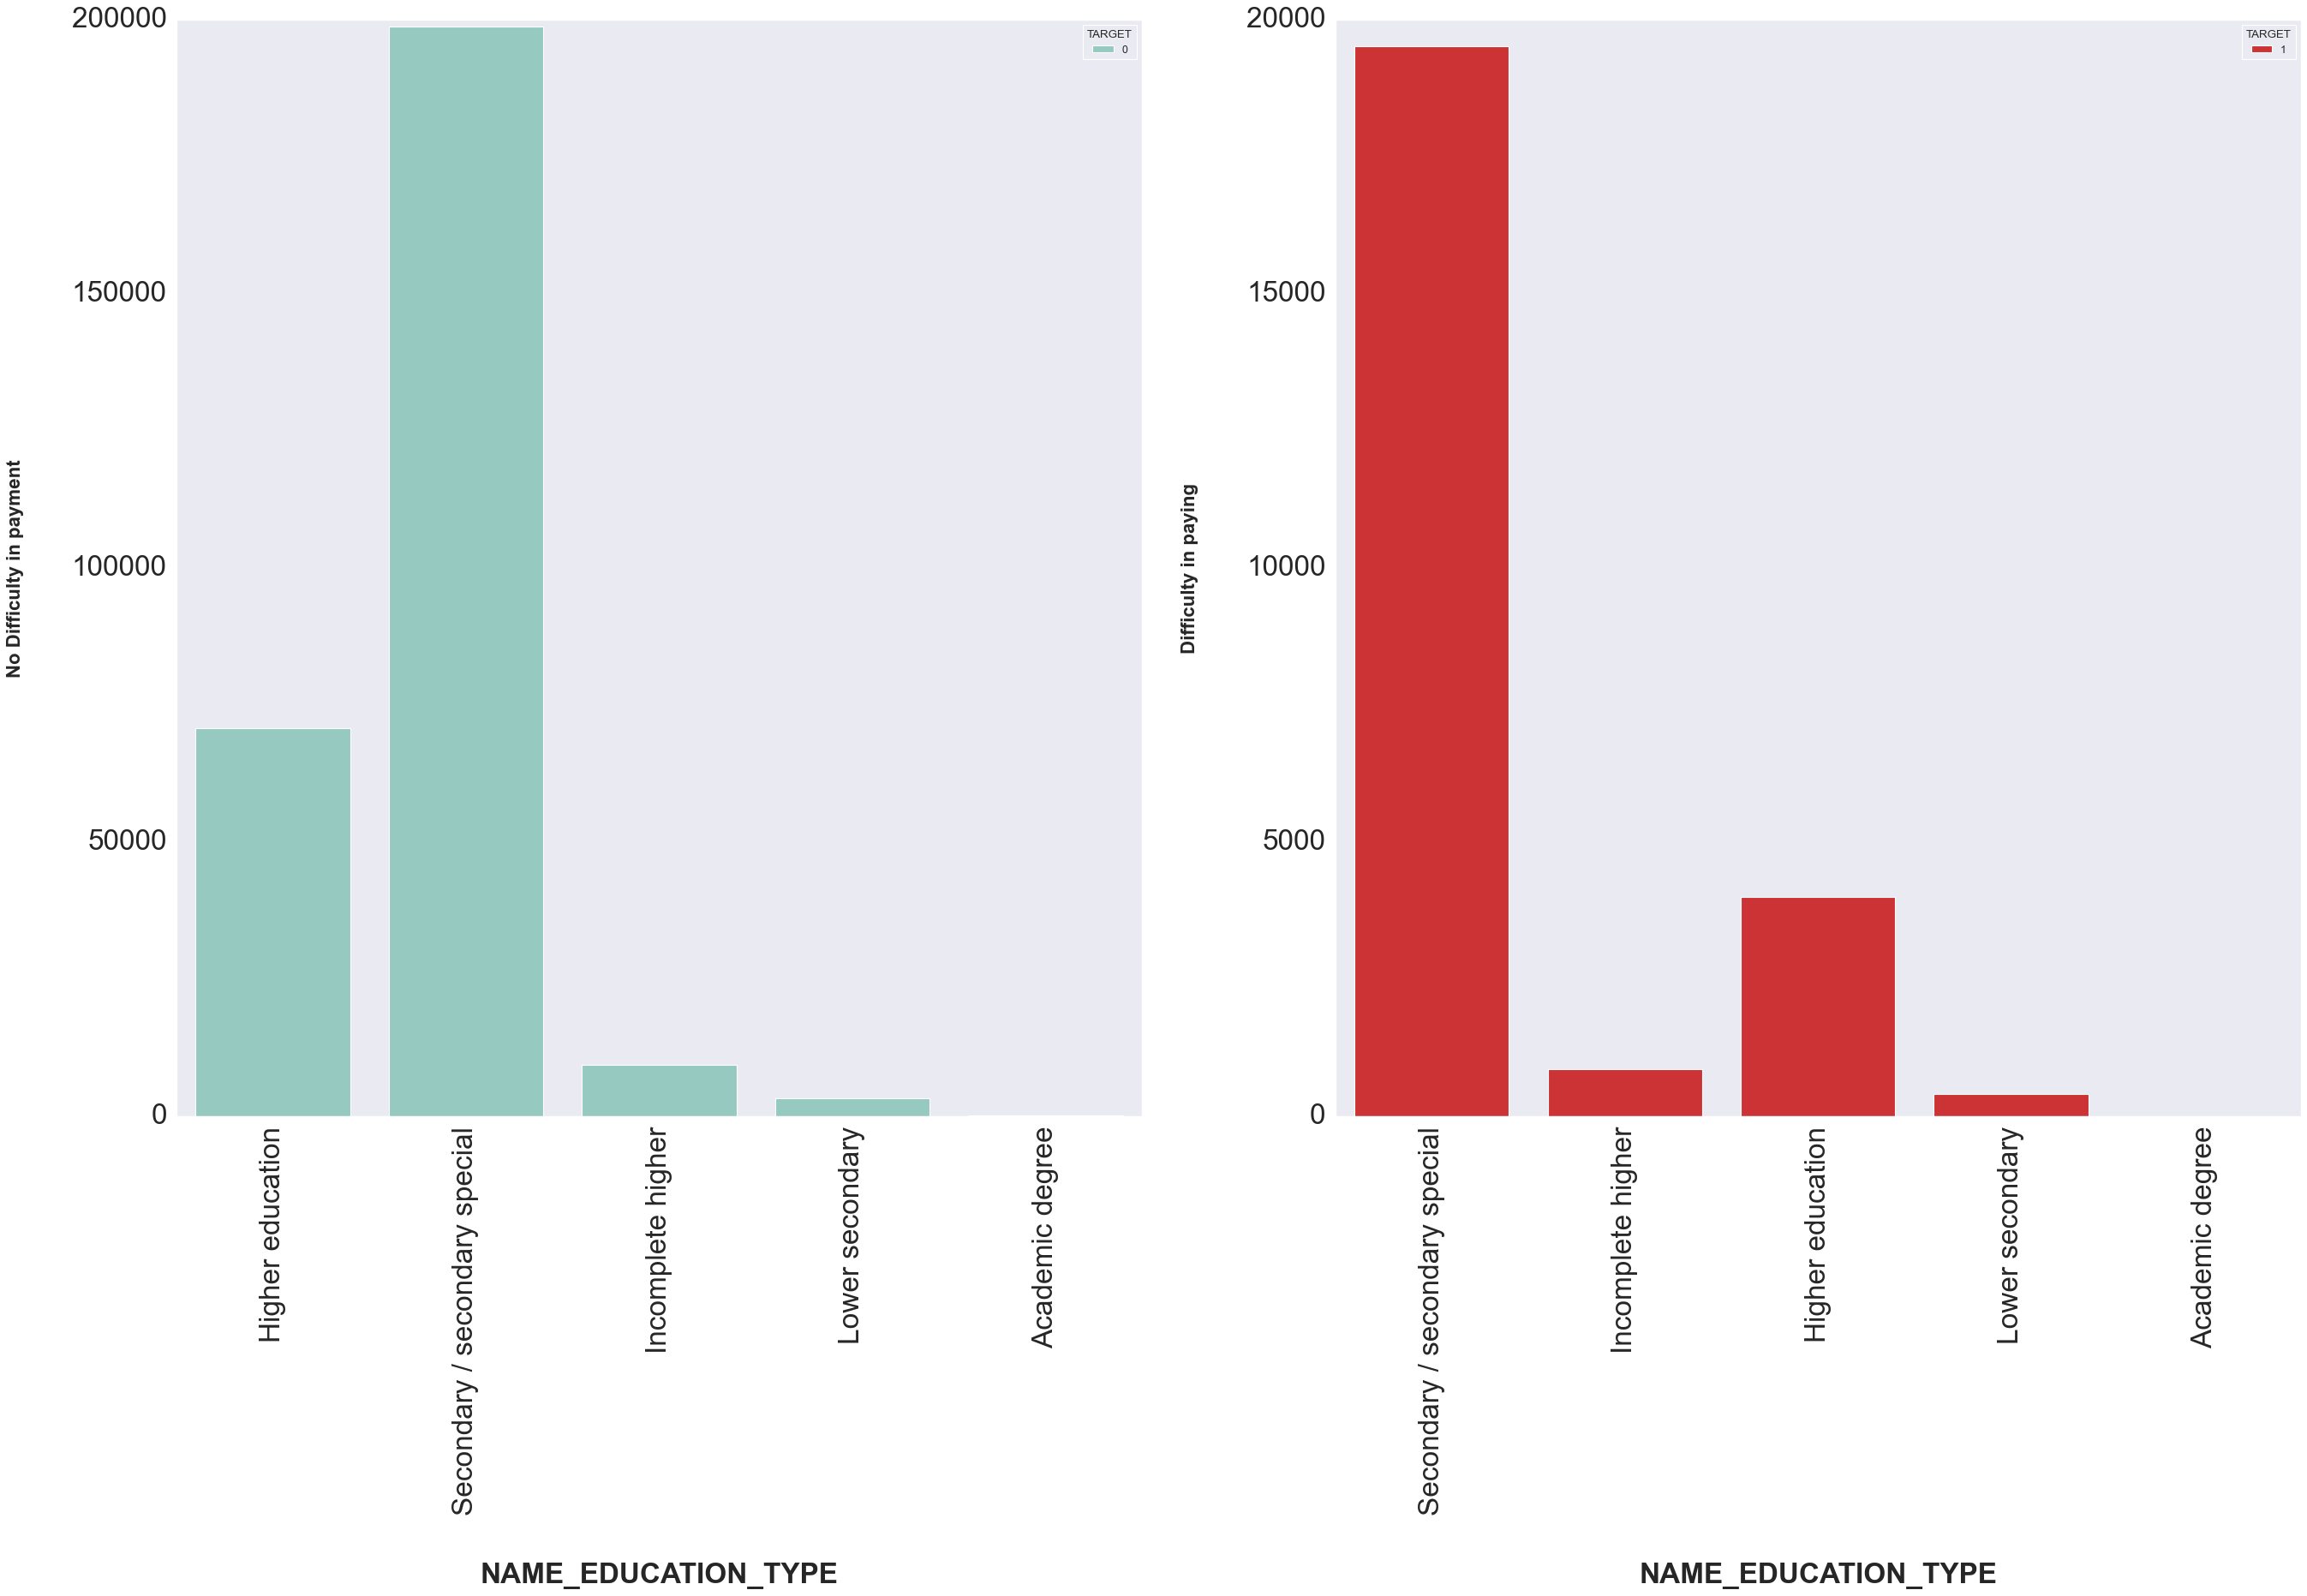

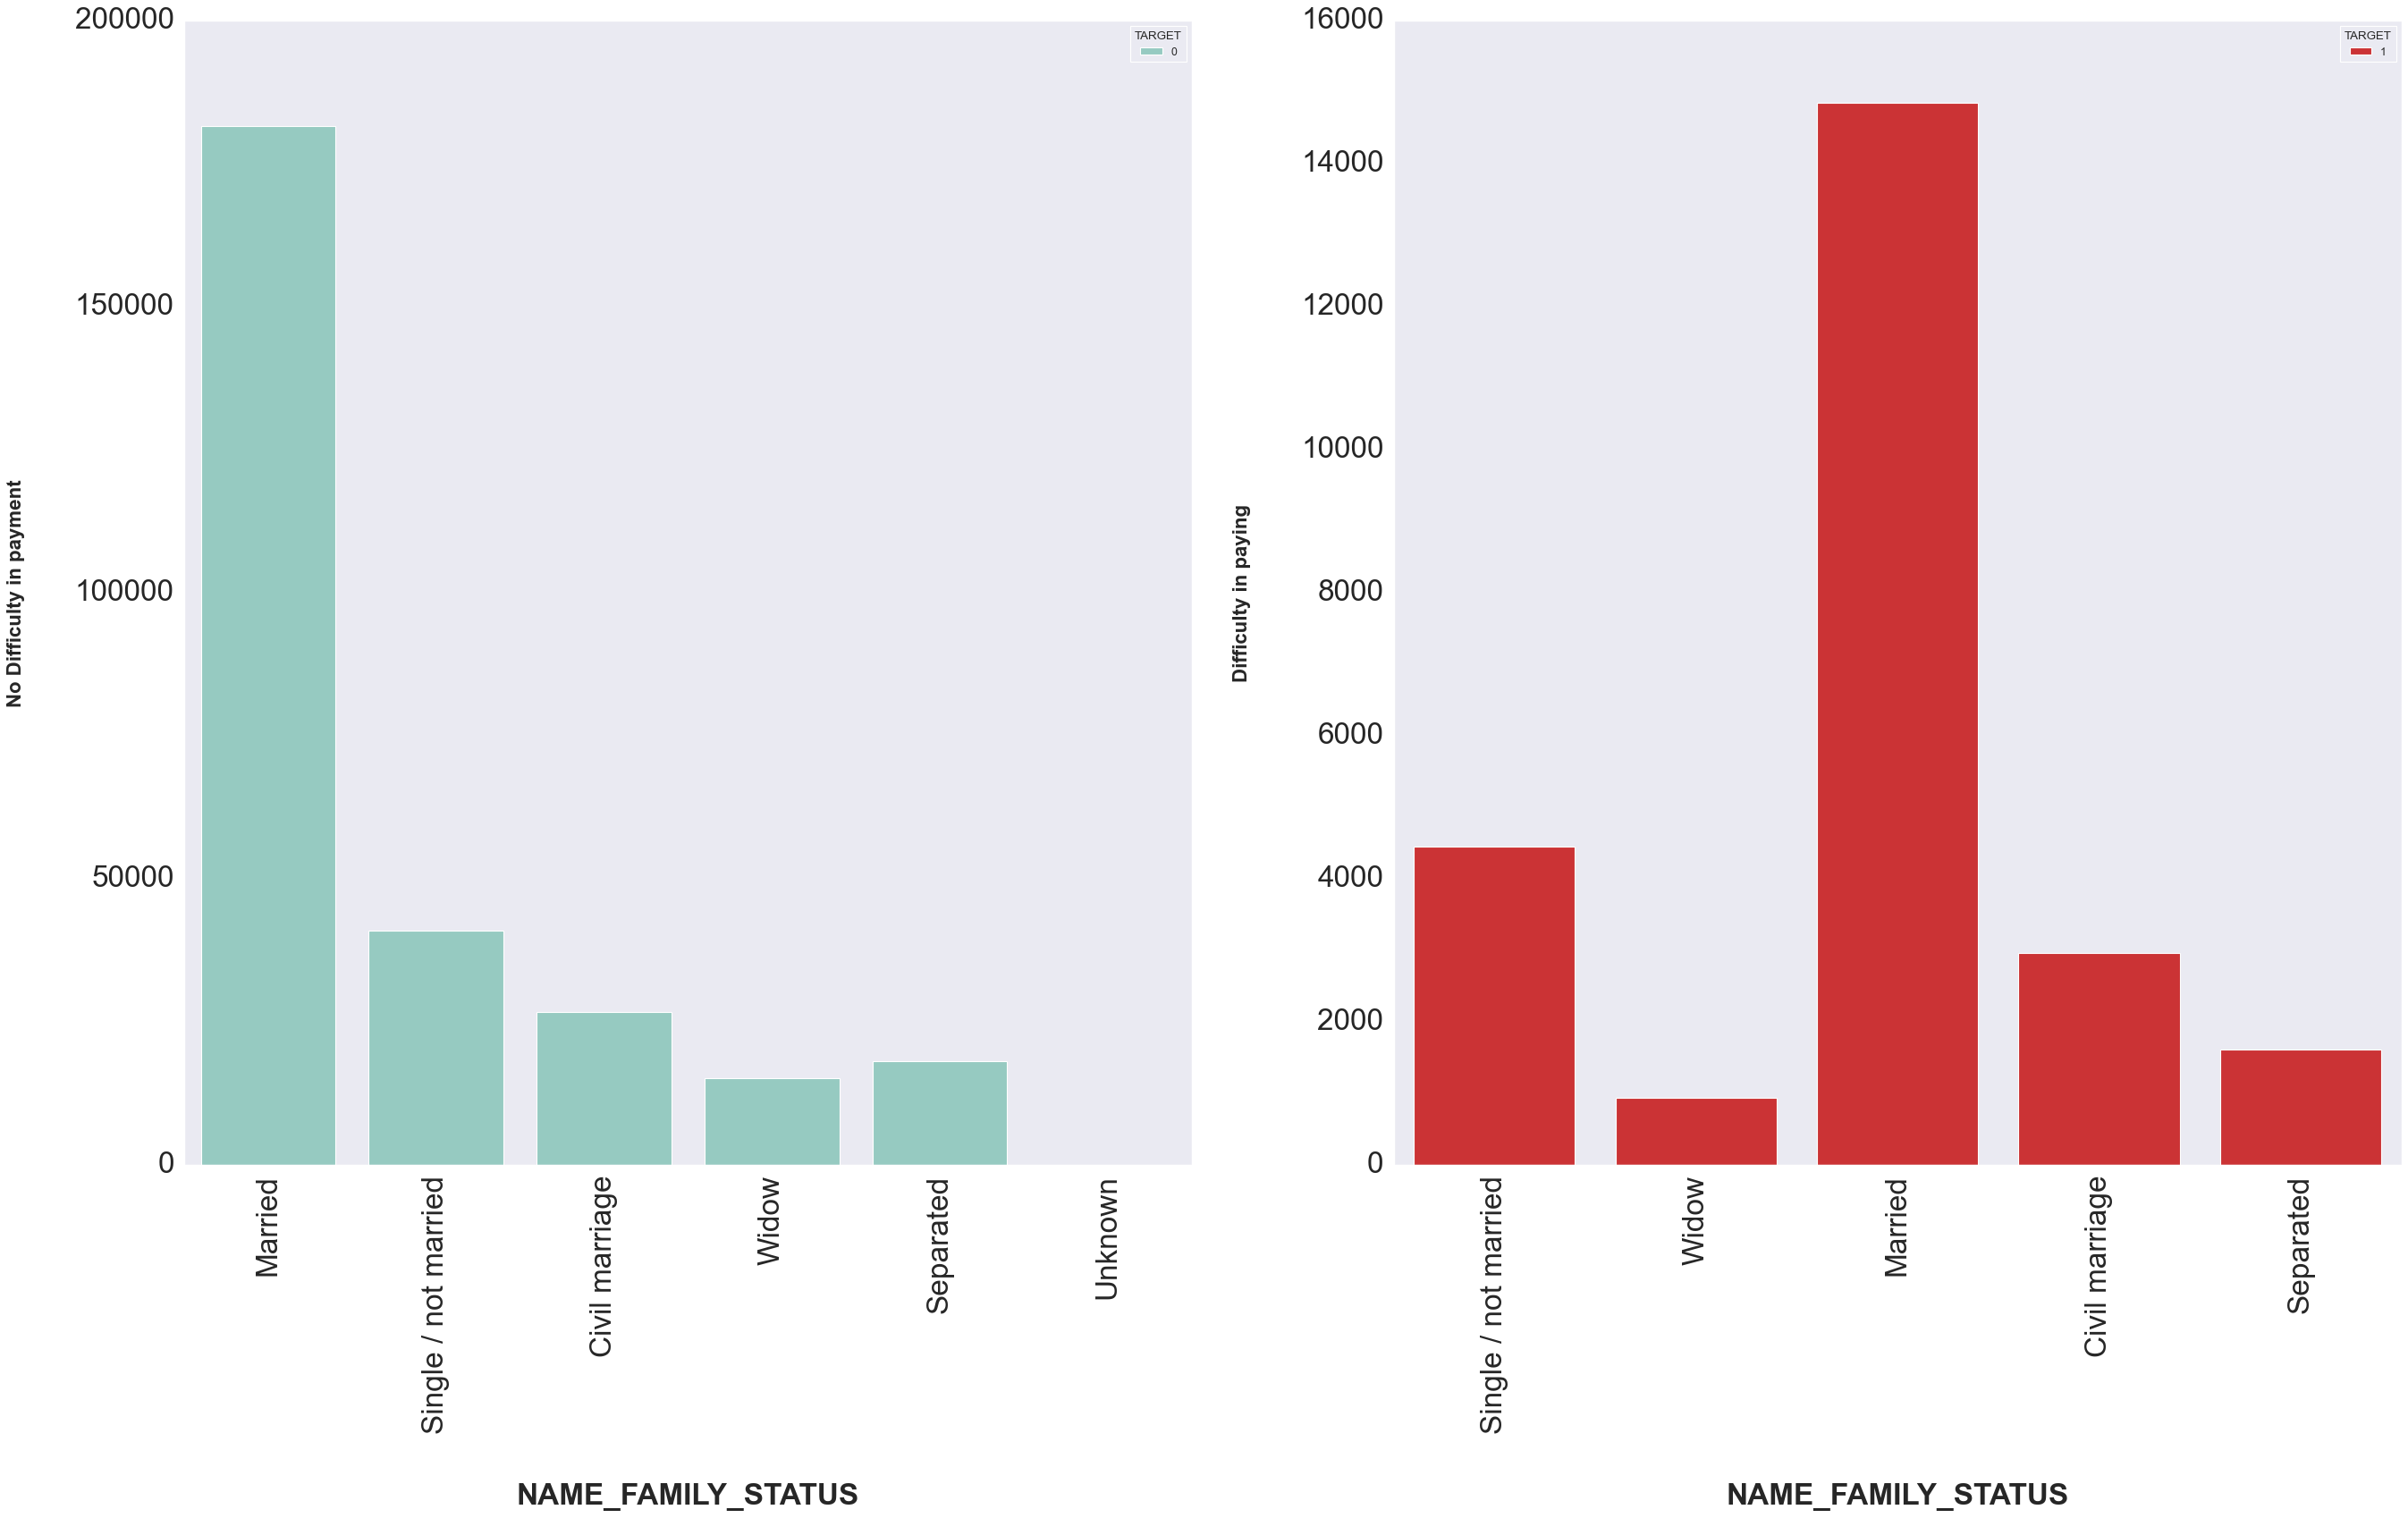

In [86]:
for i in list2:
    categorical_analysis(i)

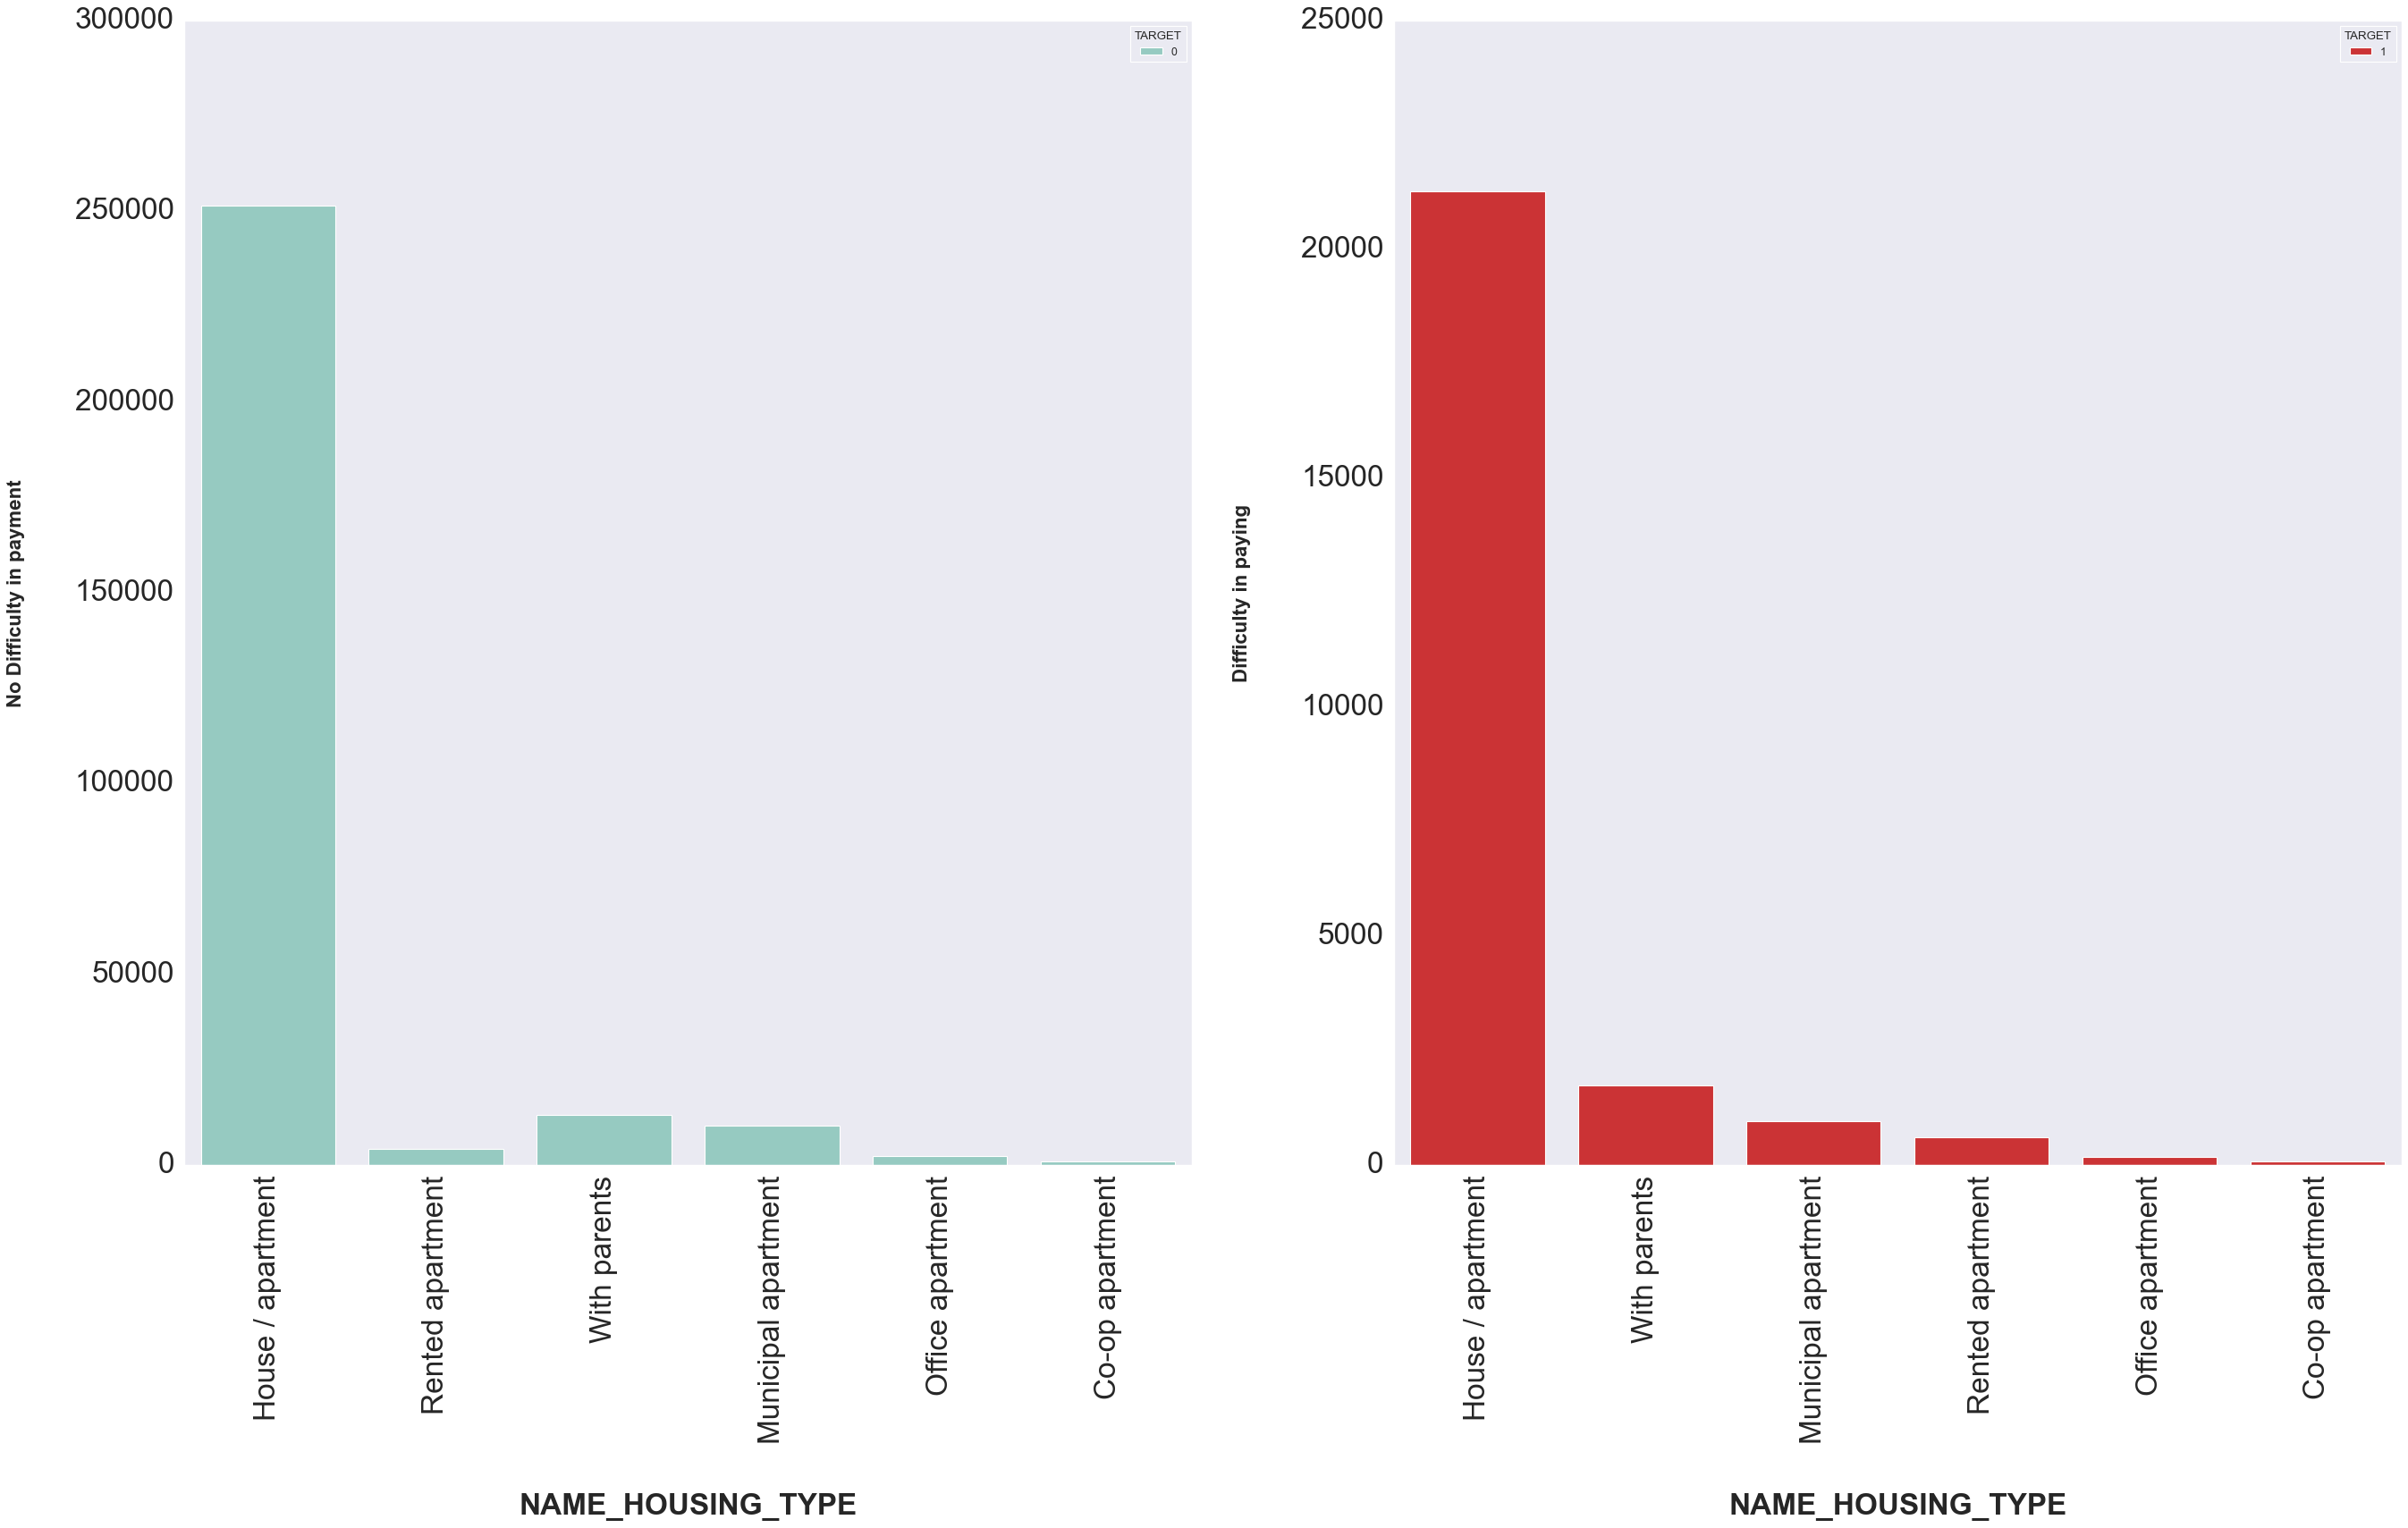

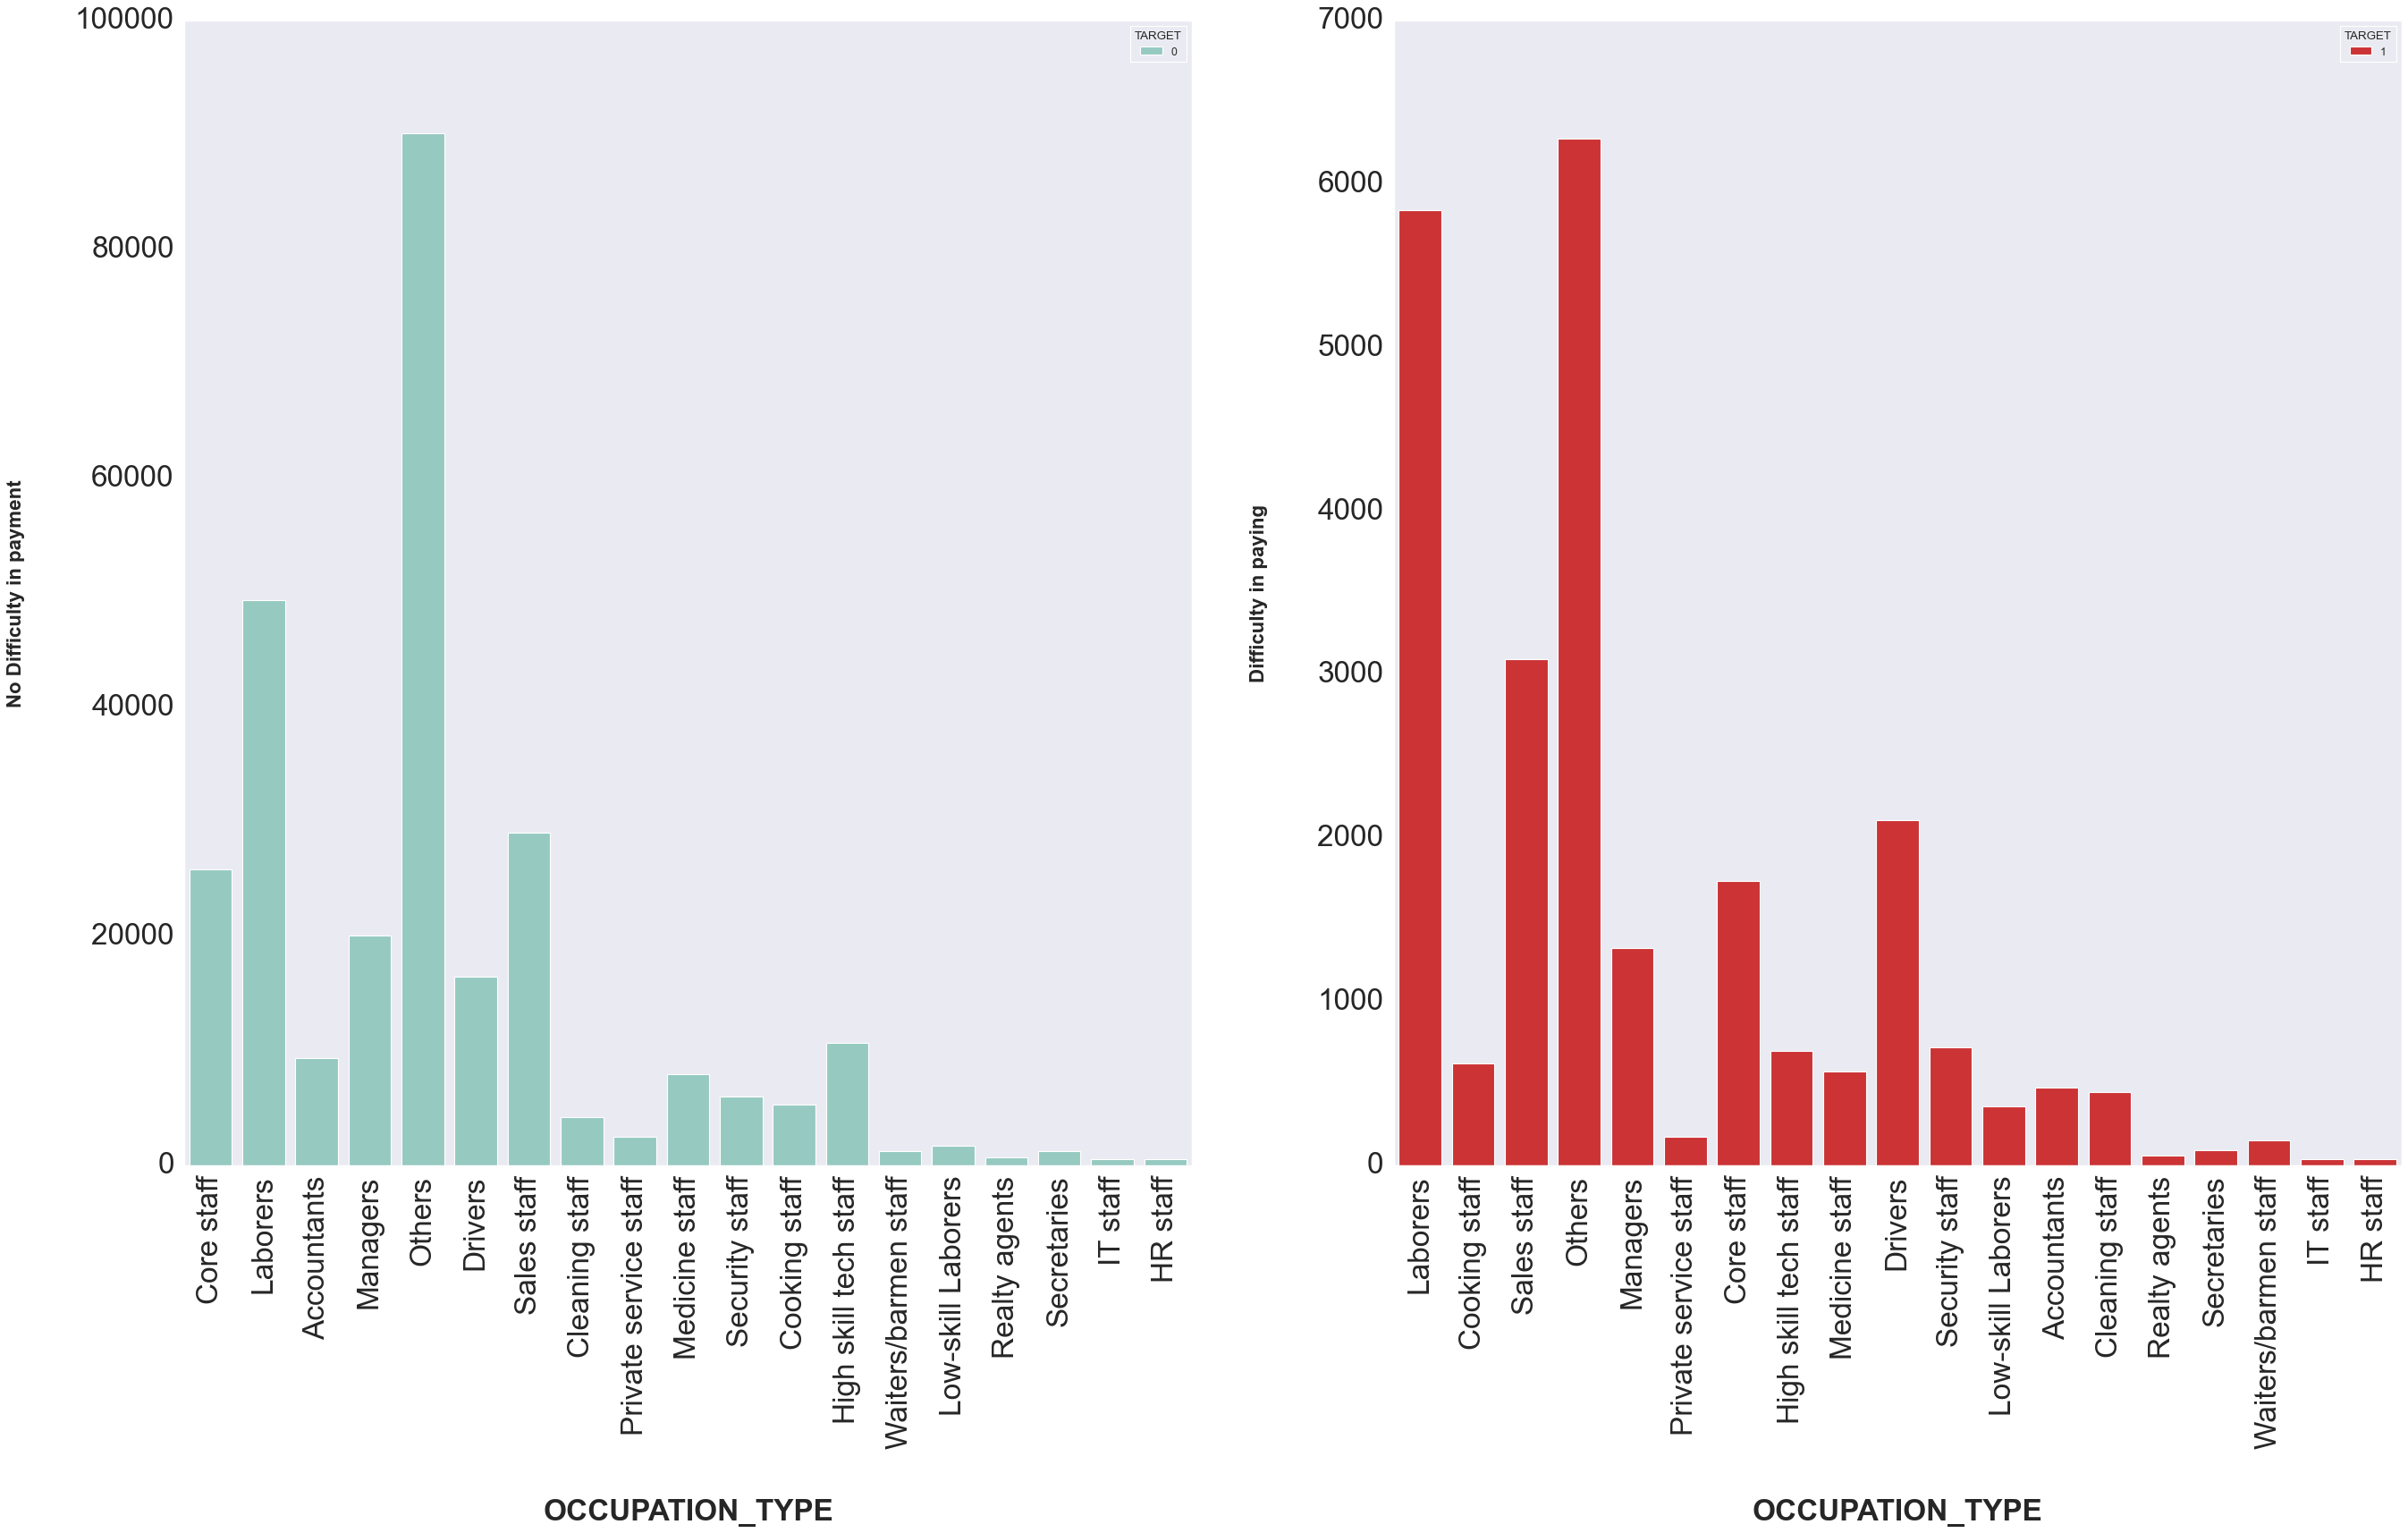

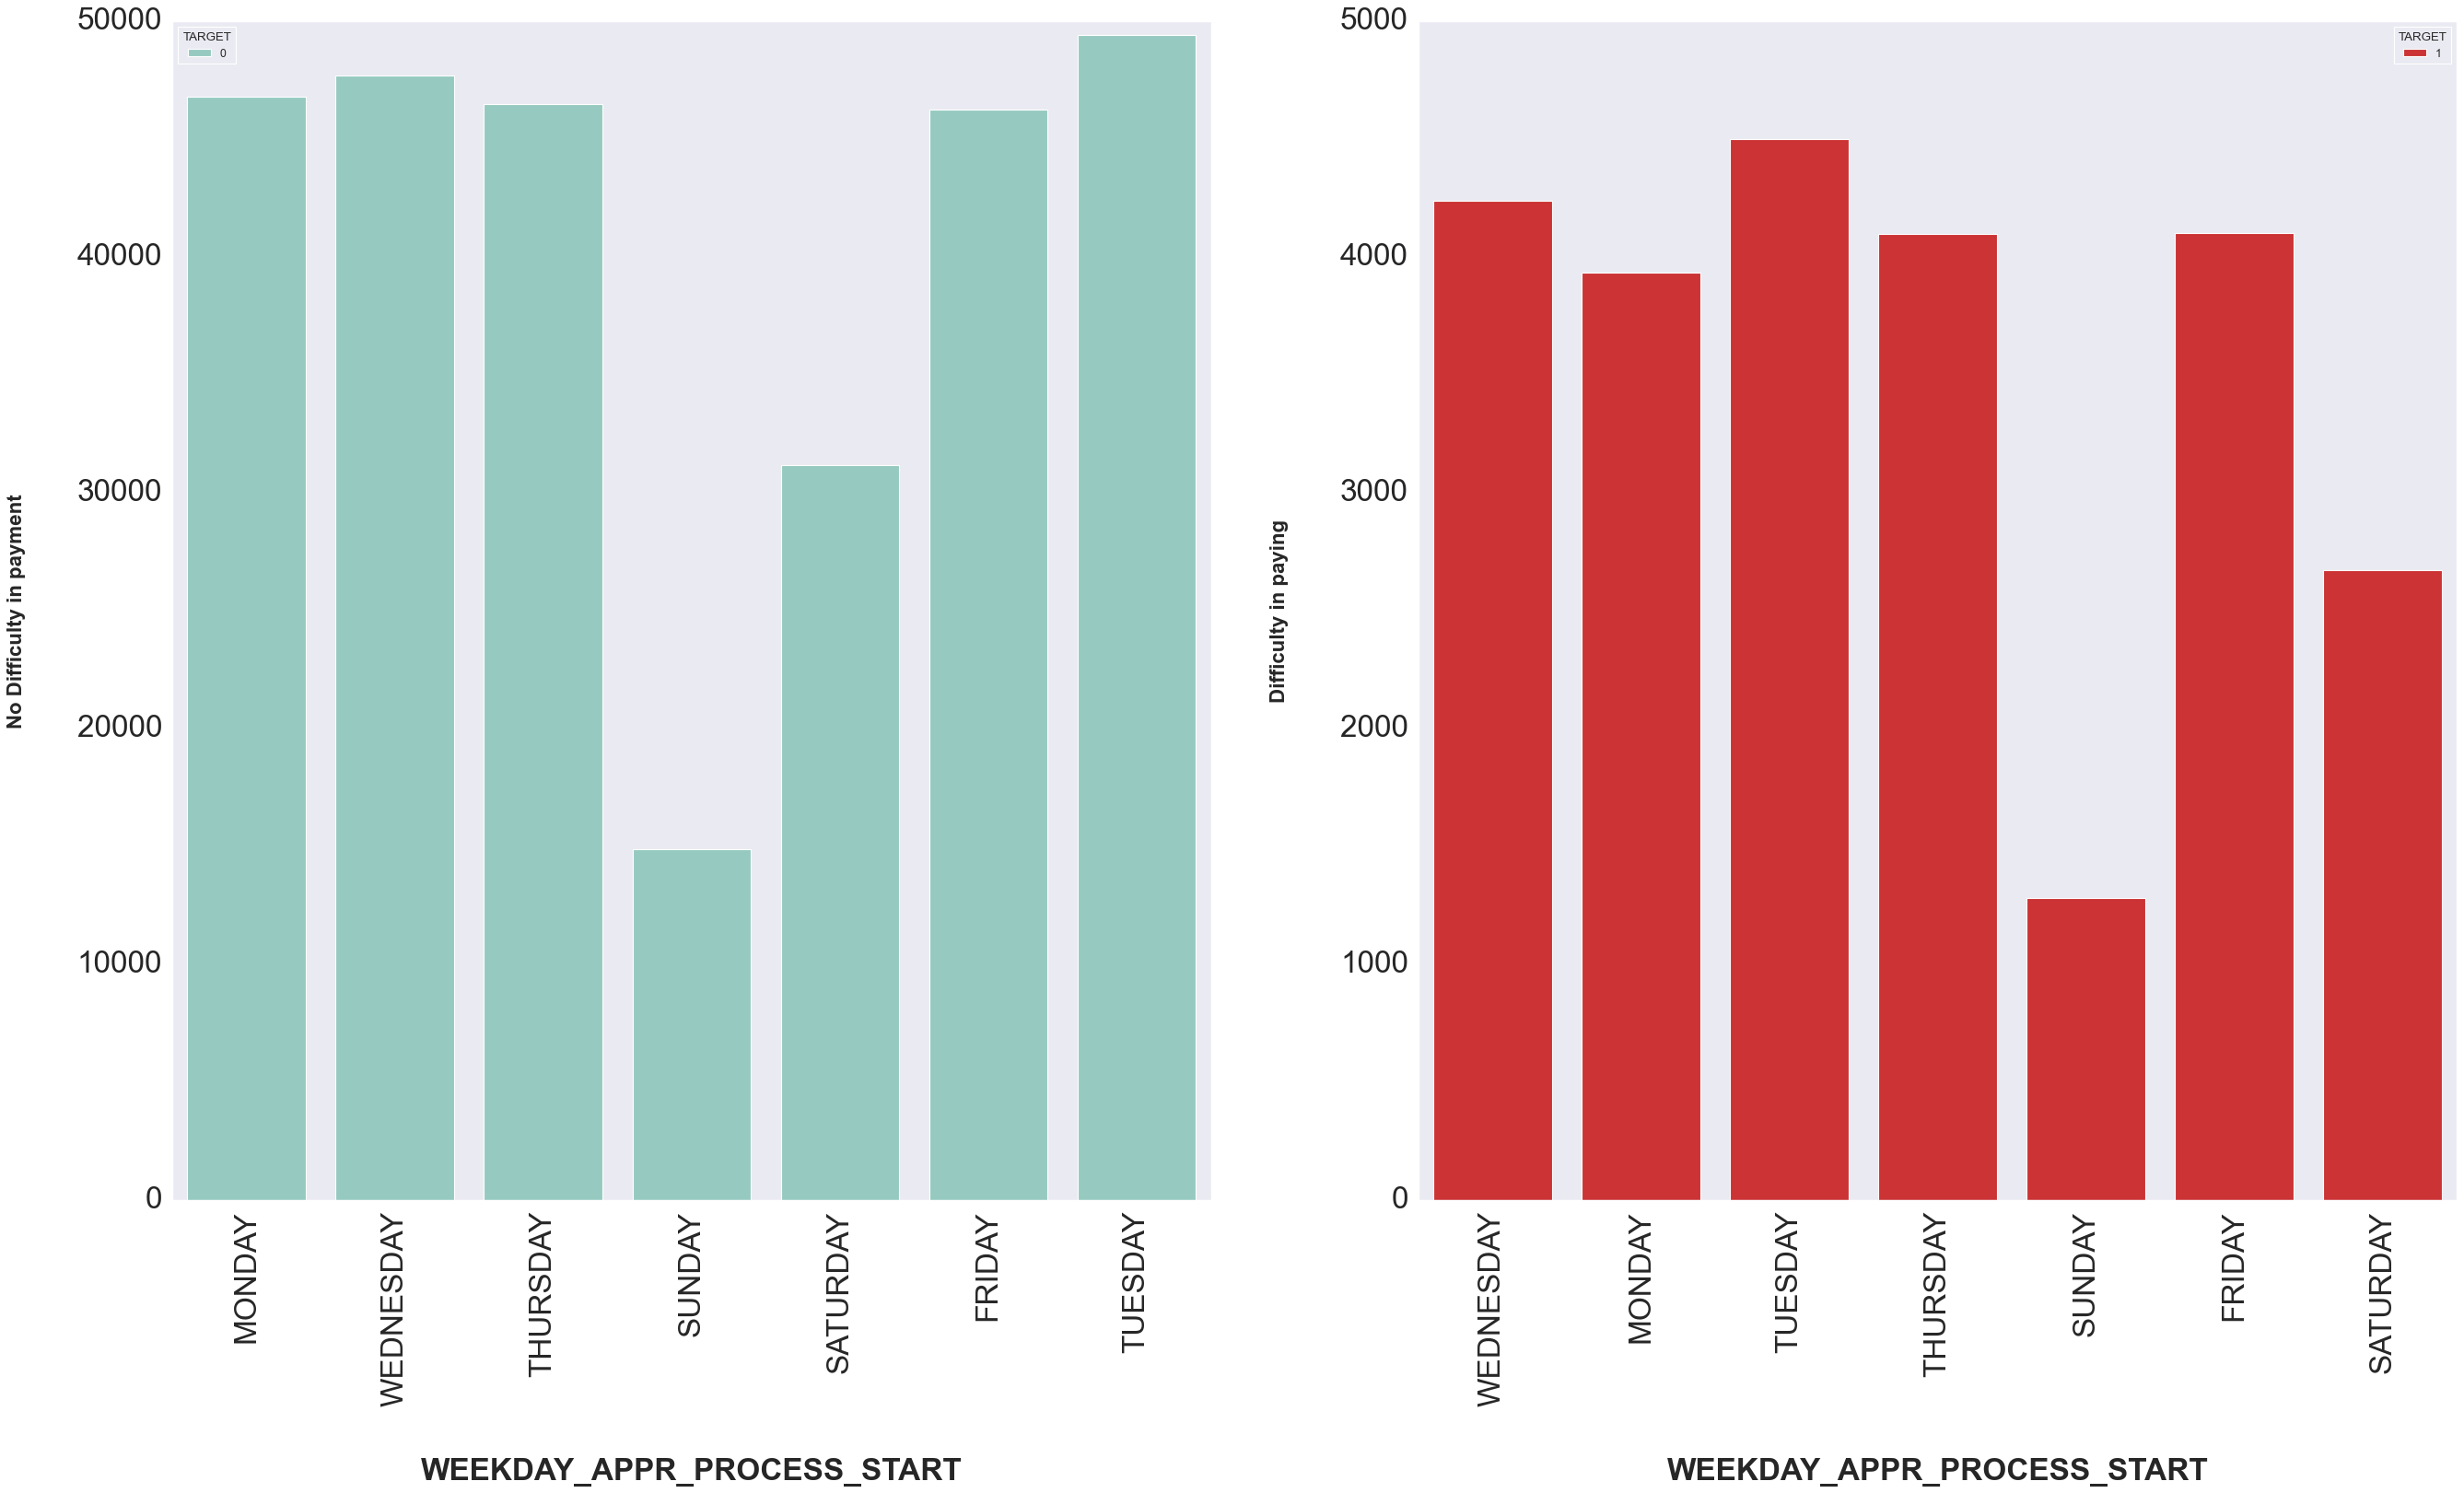

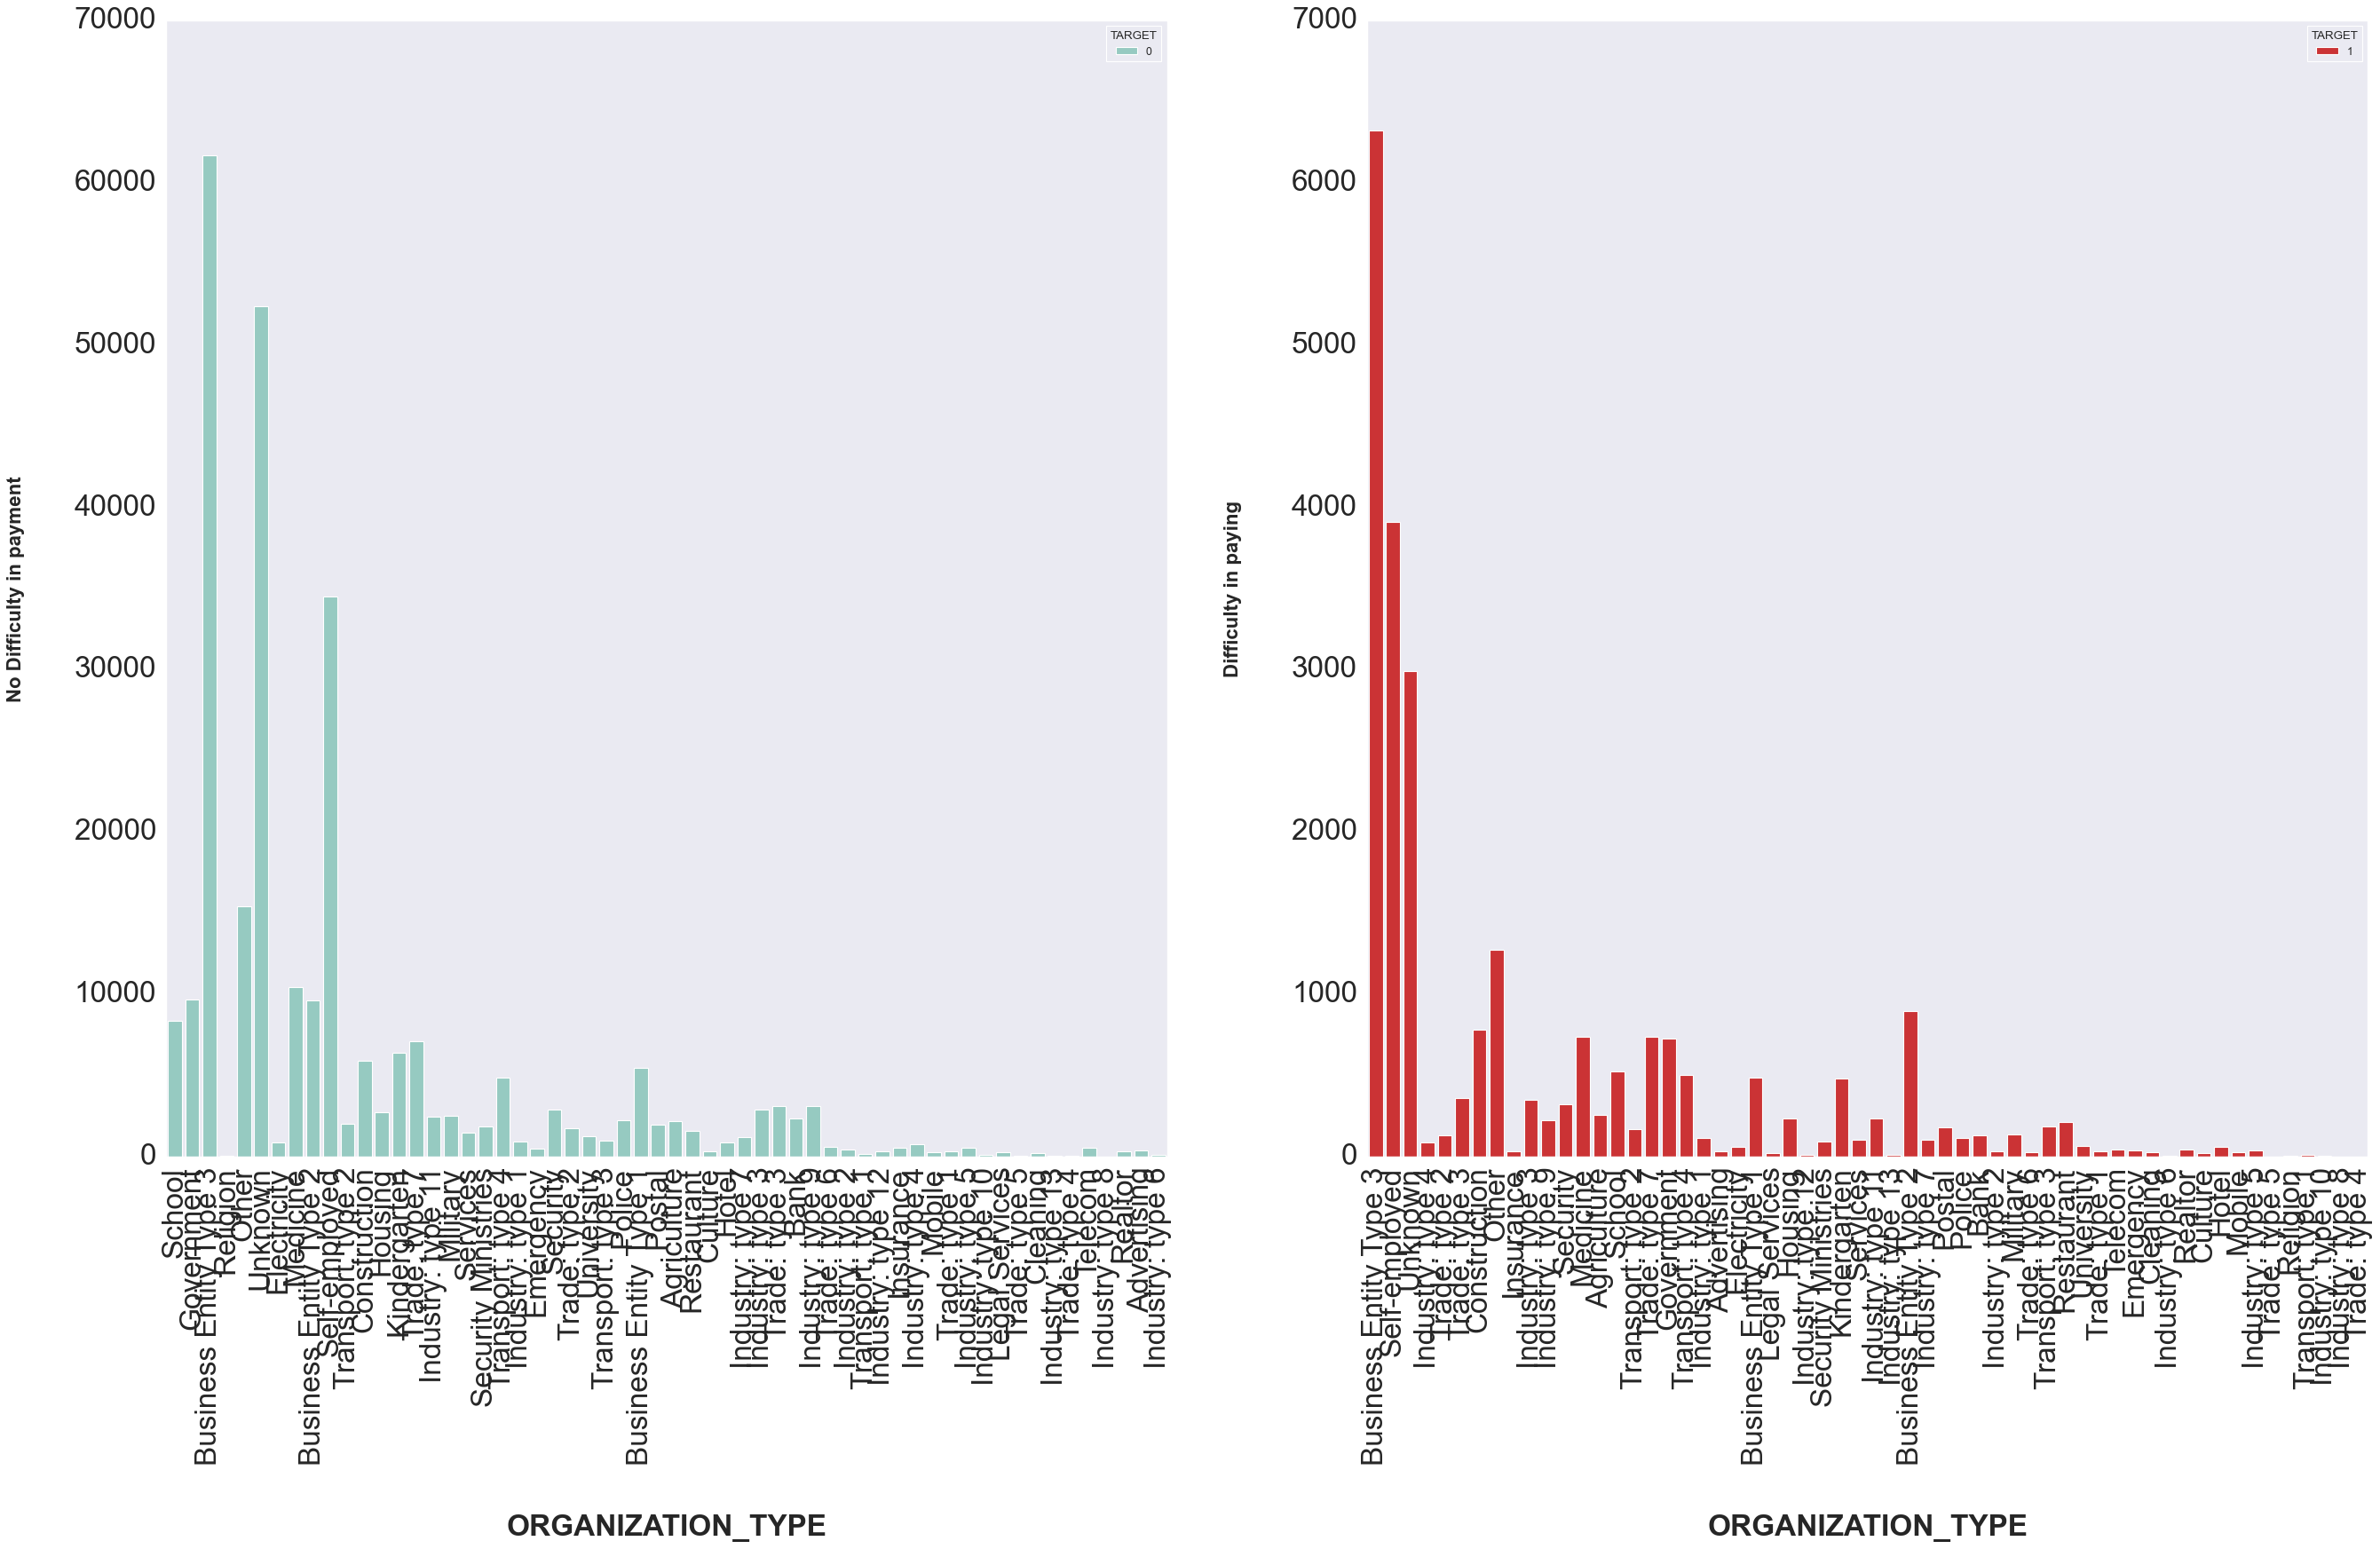

In [87]:
for i in list3:
    categorical_analysis(i)

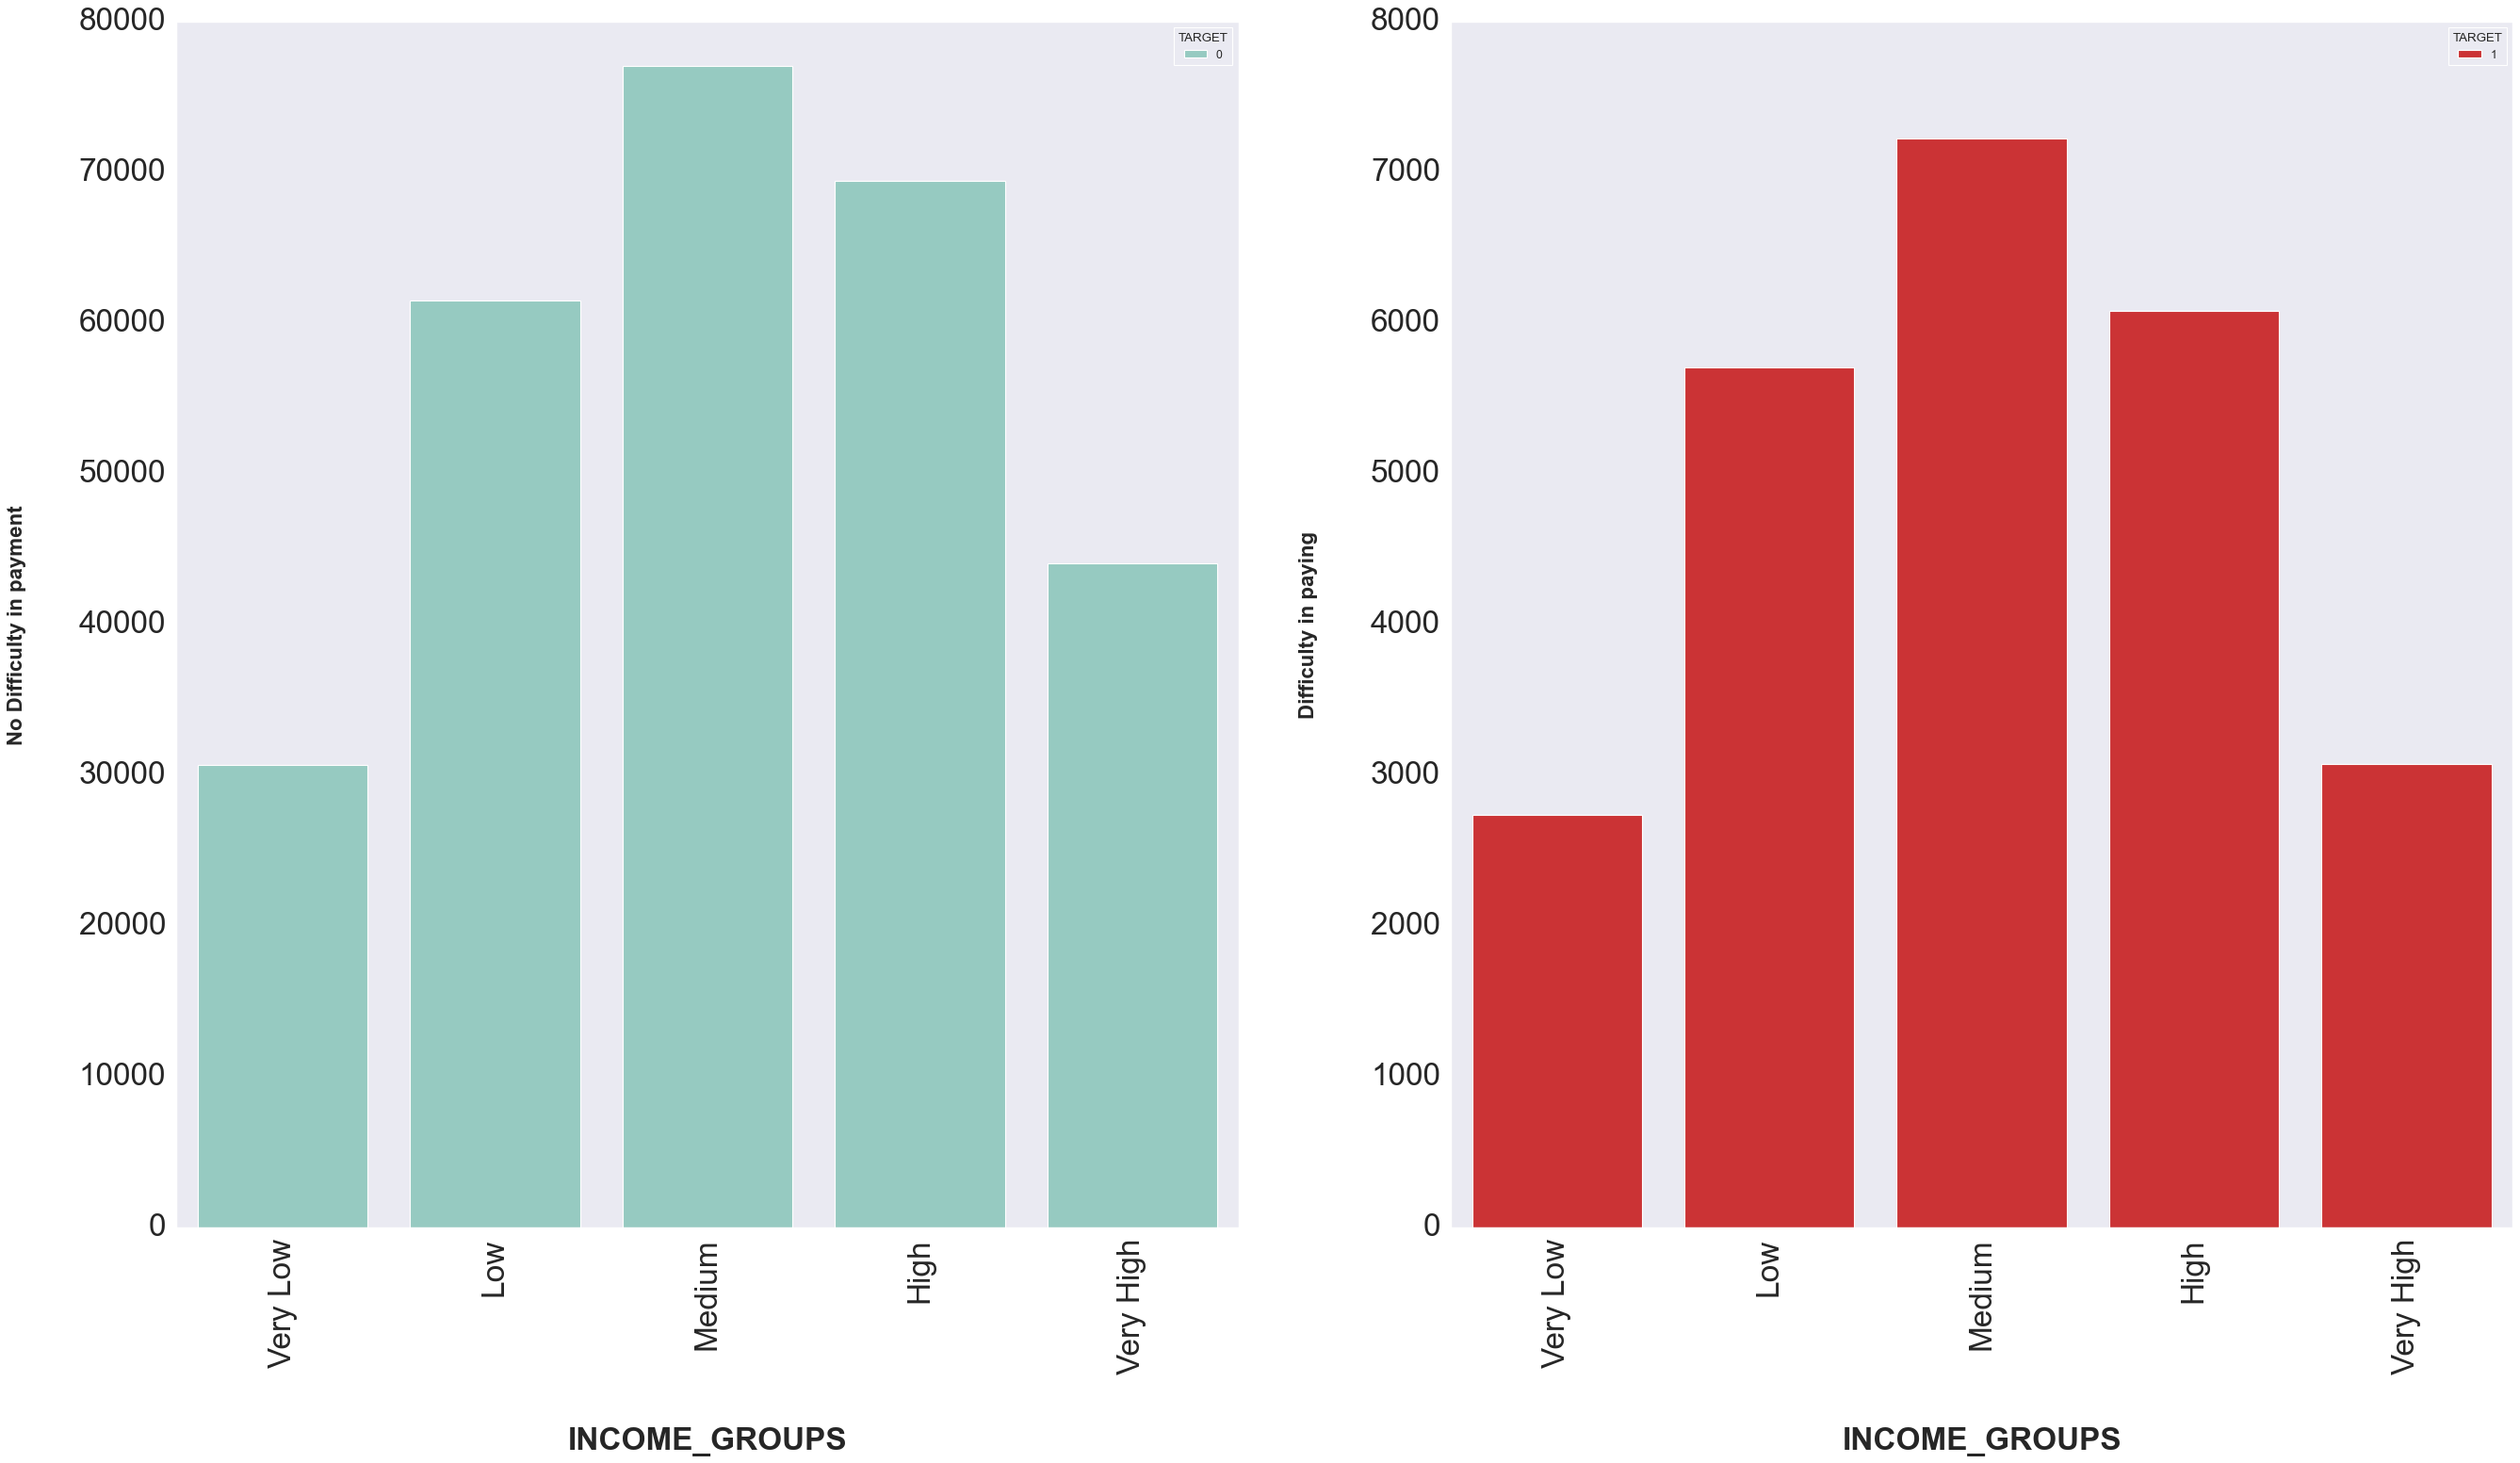

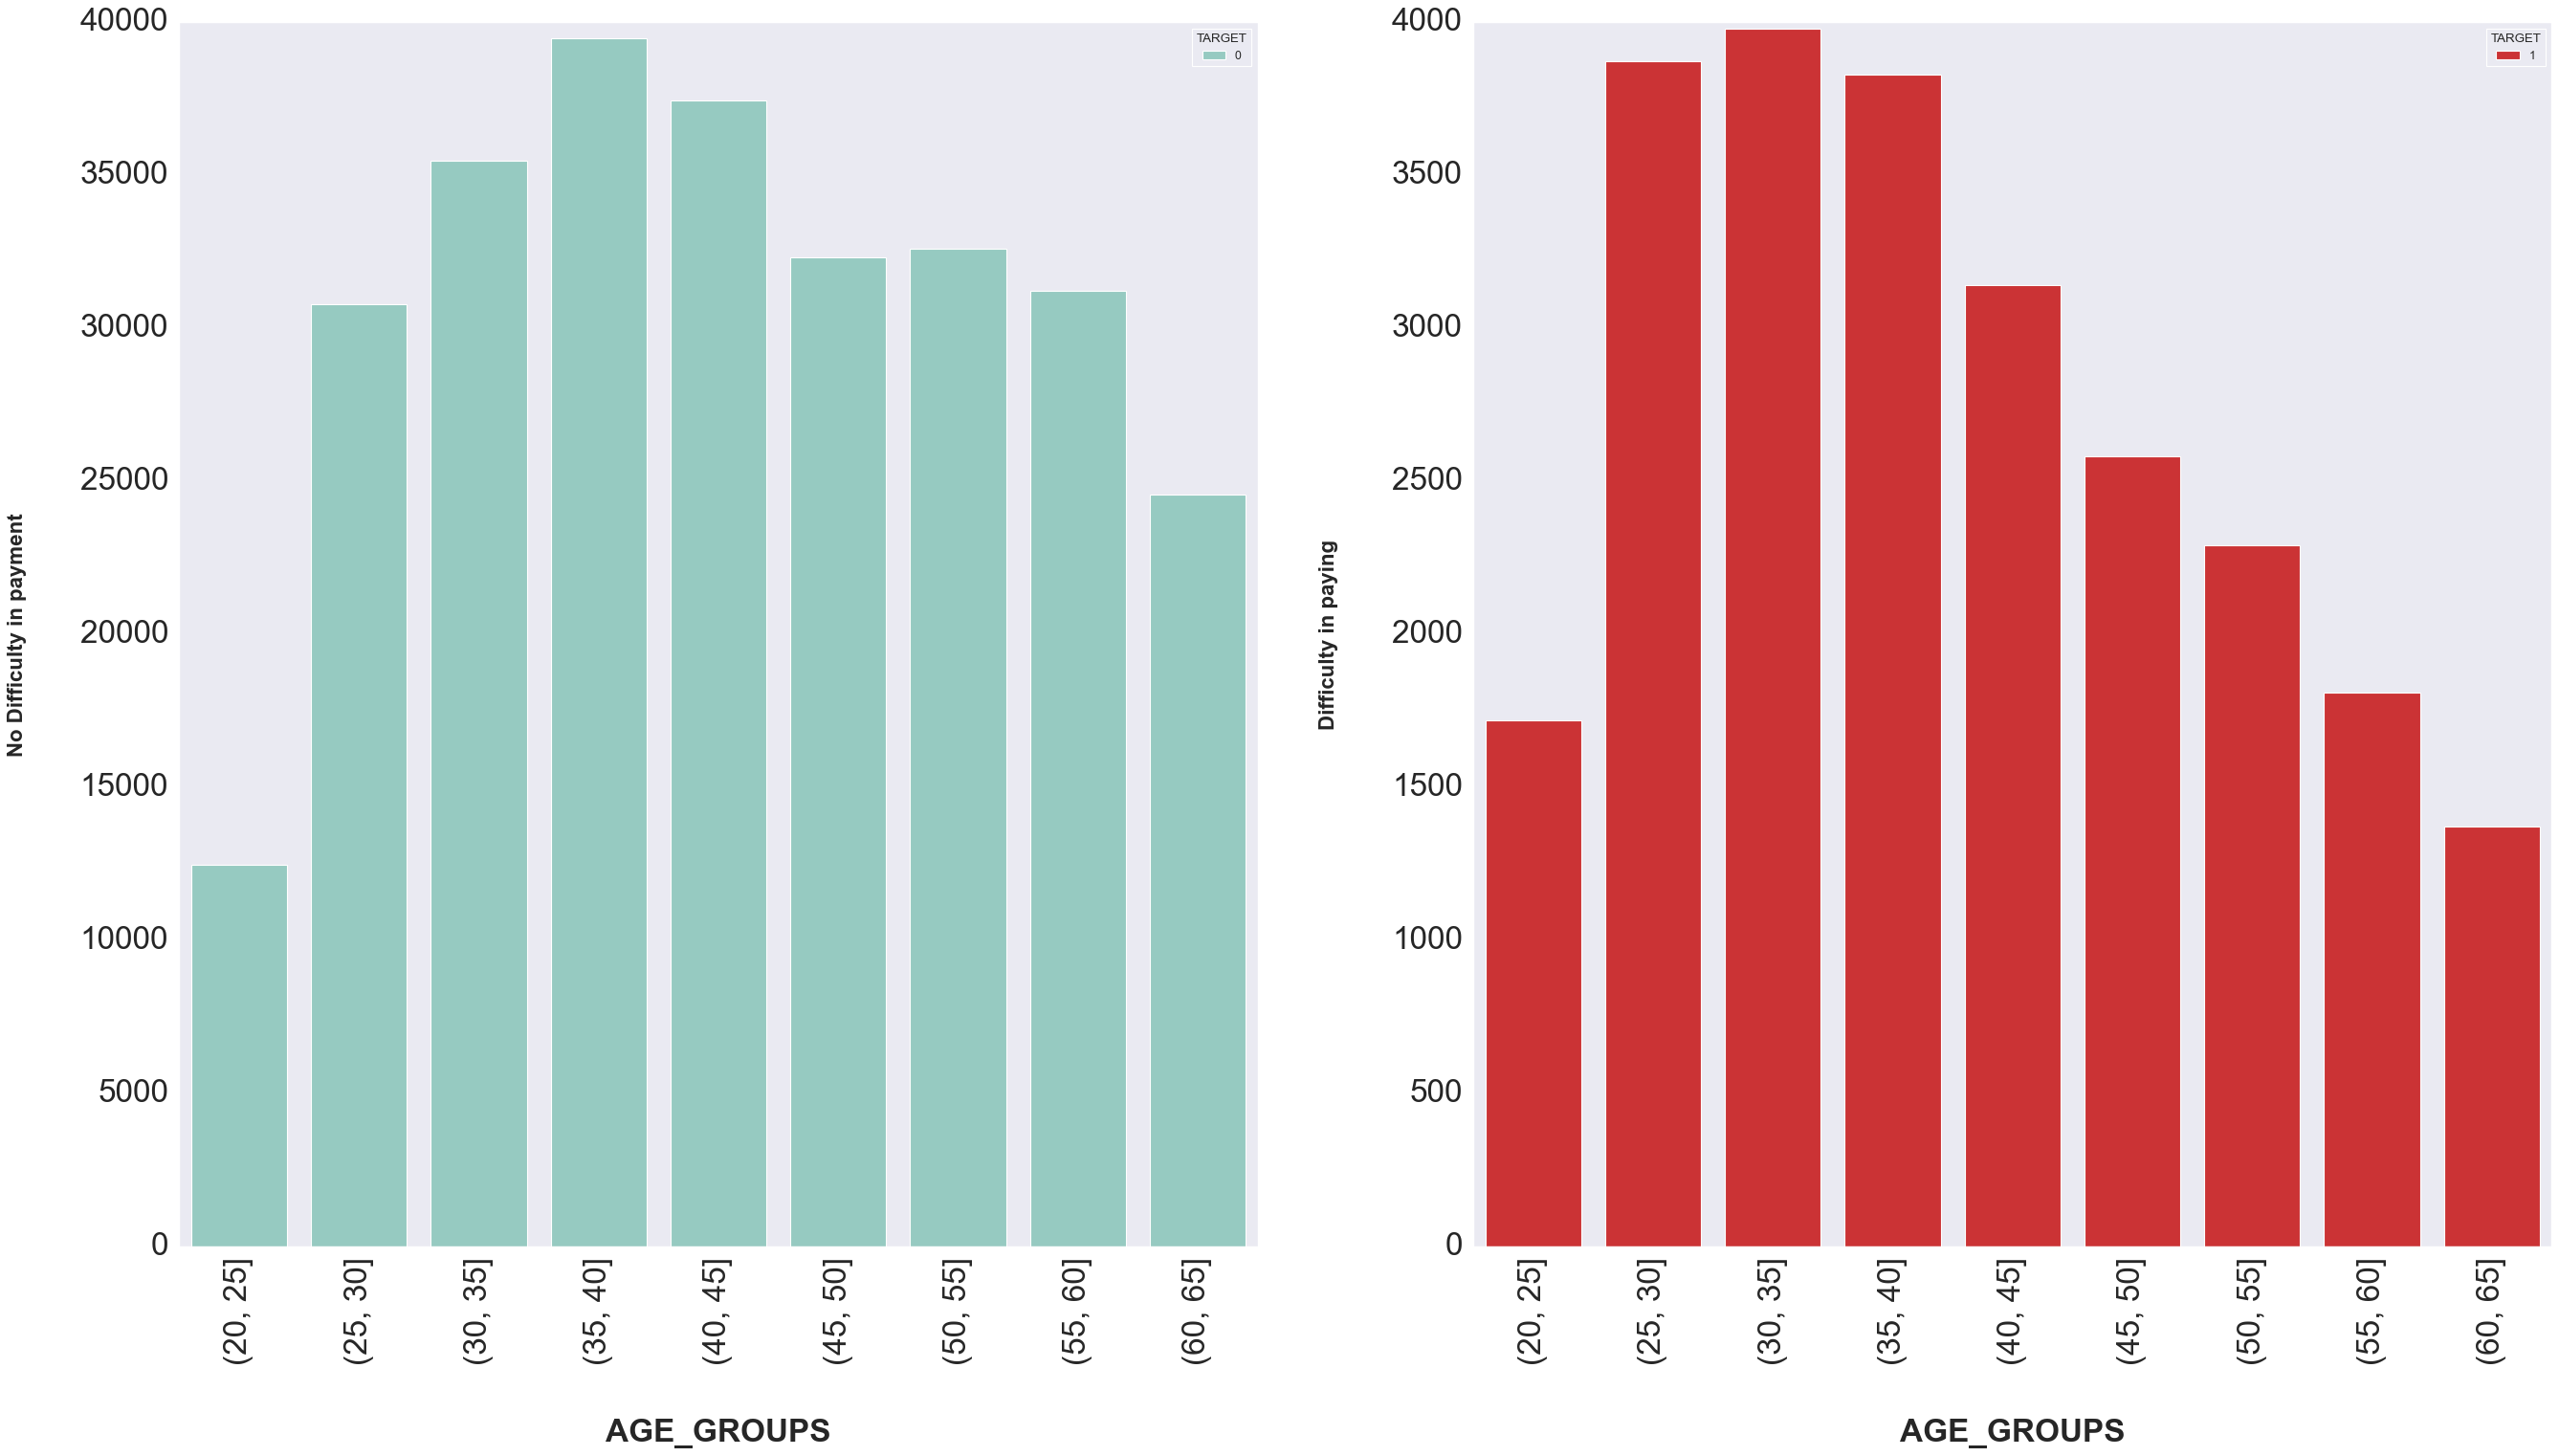

In [88]:
for i in list4:
    categorical_analysis(i)


`
-Revolving loans weightage is very less in comparison to cash loans in case of both defaulters as well as non defaulters
-There are More males in defaulter category
-Clients with Very high income group are bit less in defaulters group
-Age group of (60,65] have less chances of defaulting`

###  Analysis of Numerical columns 

In [89]:
def numerical_analysis(var):
    sns.set(style="darkgrid")
    plt.figure(figsize=(40,20))
    
   
    plt.subplot(1,2,1)                                   
    sns.histplot(target0[var], color="b",kde=True, stat="density", linewidth=0)
    plt.yscale('linear') 
    plt.xlabel(var, fontsize= 30, fontweight="bold")
    plt.ylabel('No Payment Issues', fontsize= 30, fontweight="bold")                    #Target 0
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
     
    
    
    
    plt.subplot(1,2,2)                                                                                                      
    sns.histplot(target1[var], color="r",kde=True, stat="density", linewidth=0)
    plt.yscale('linear')    
    plt.xlabel(var, fontsize= 30, fontweight="bold")
    plt.ylabel('Payment Issues', fontsize= 30, fontweight="bold")                       # Target 1
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
    
    plt.show();

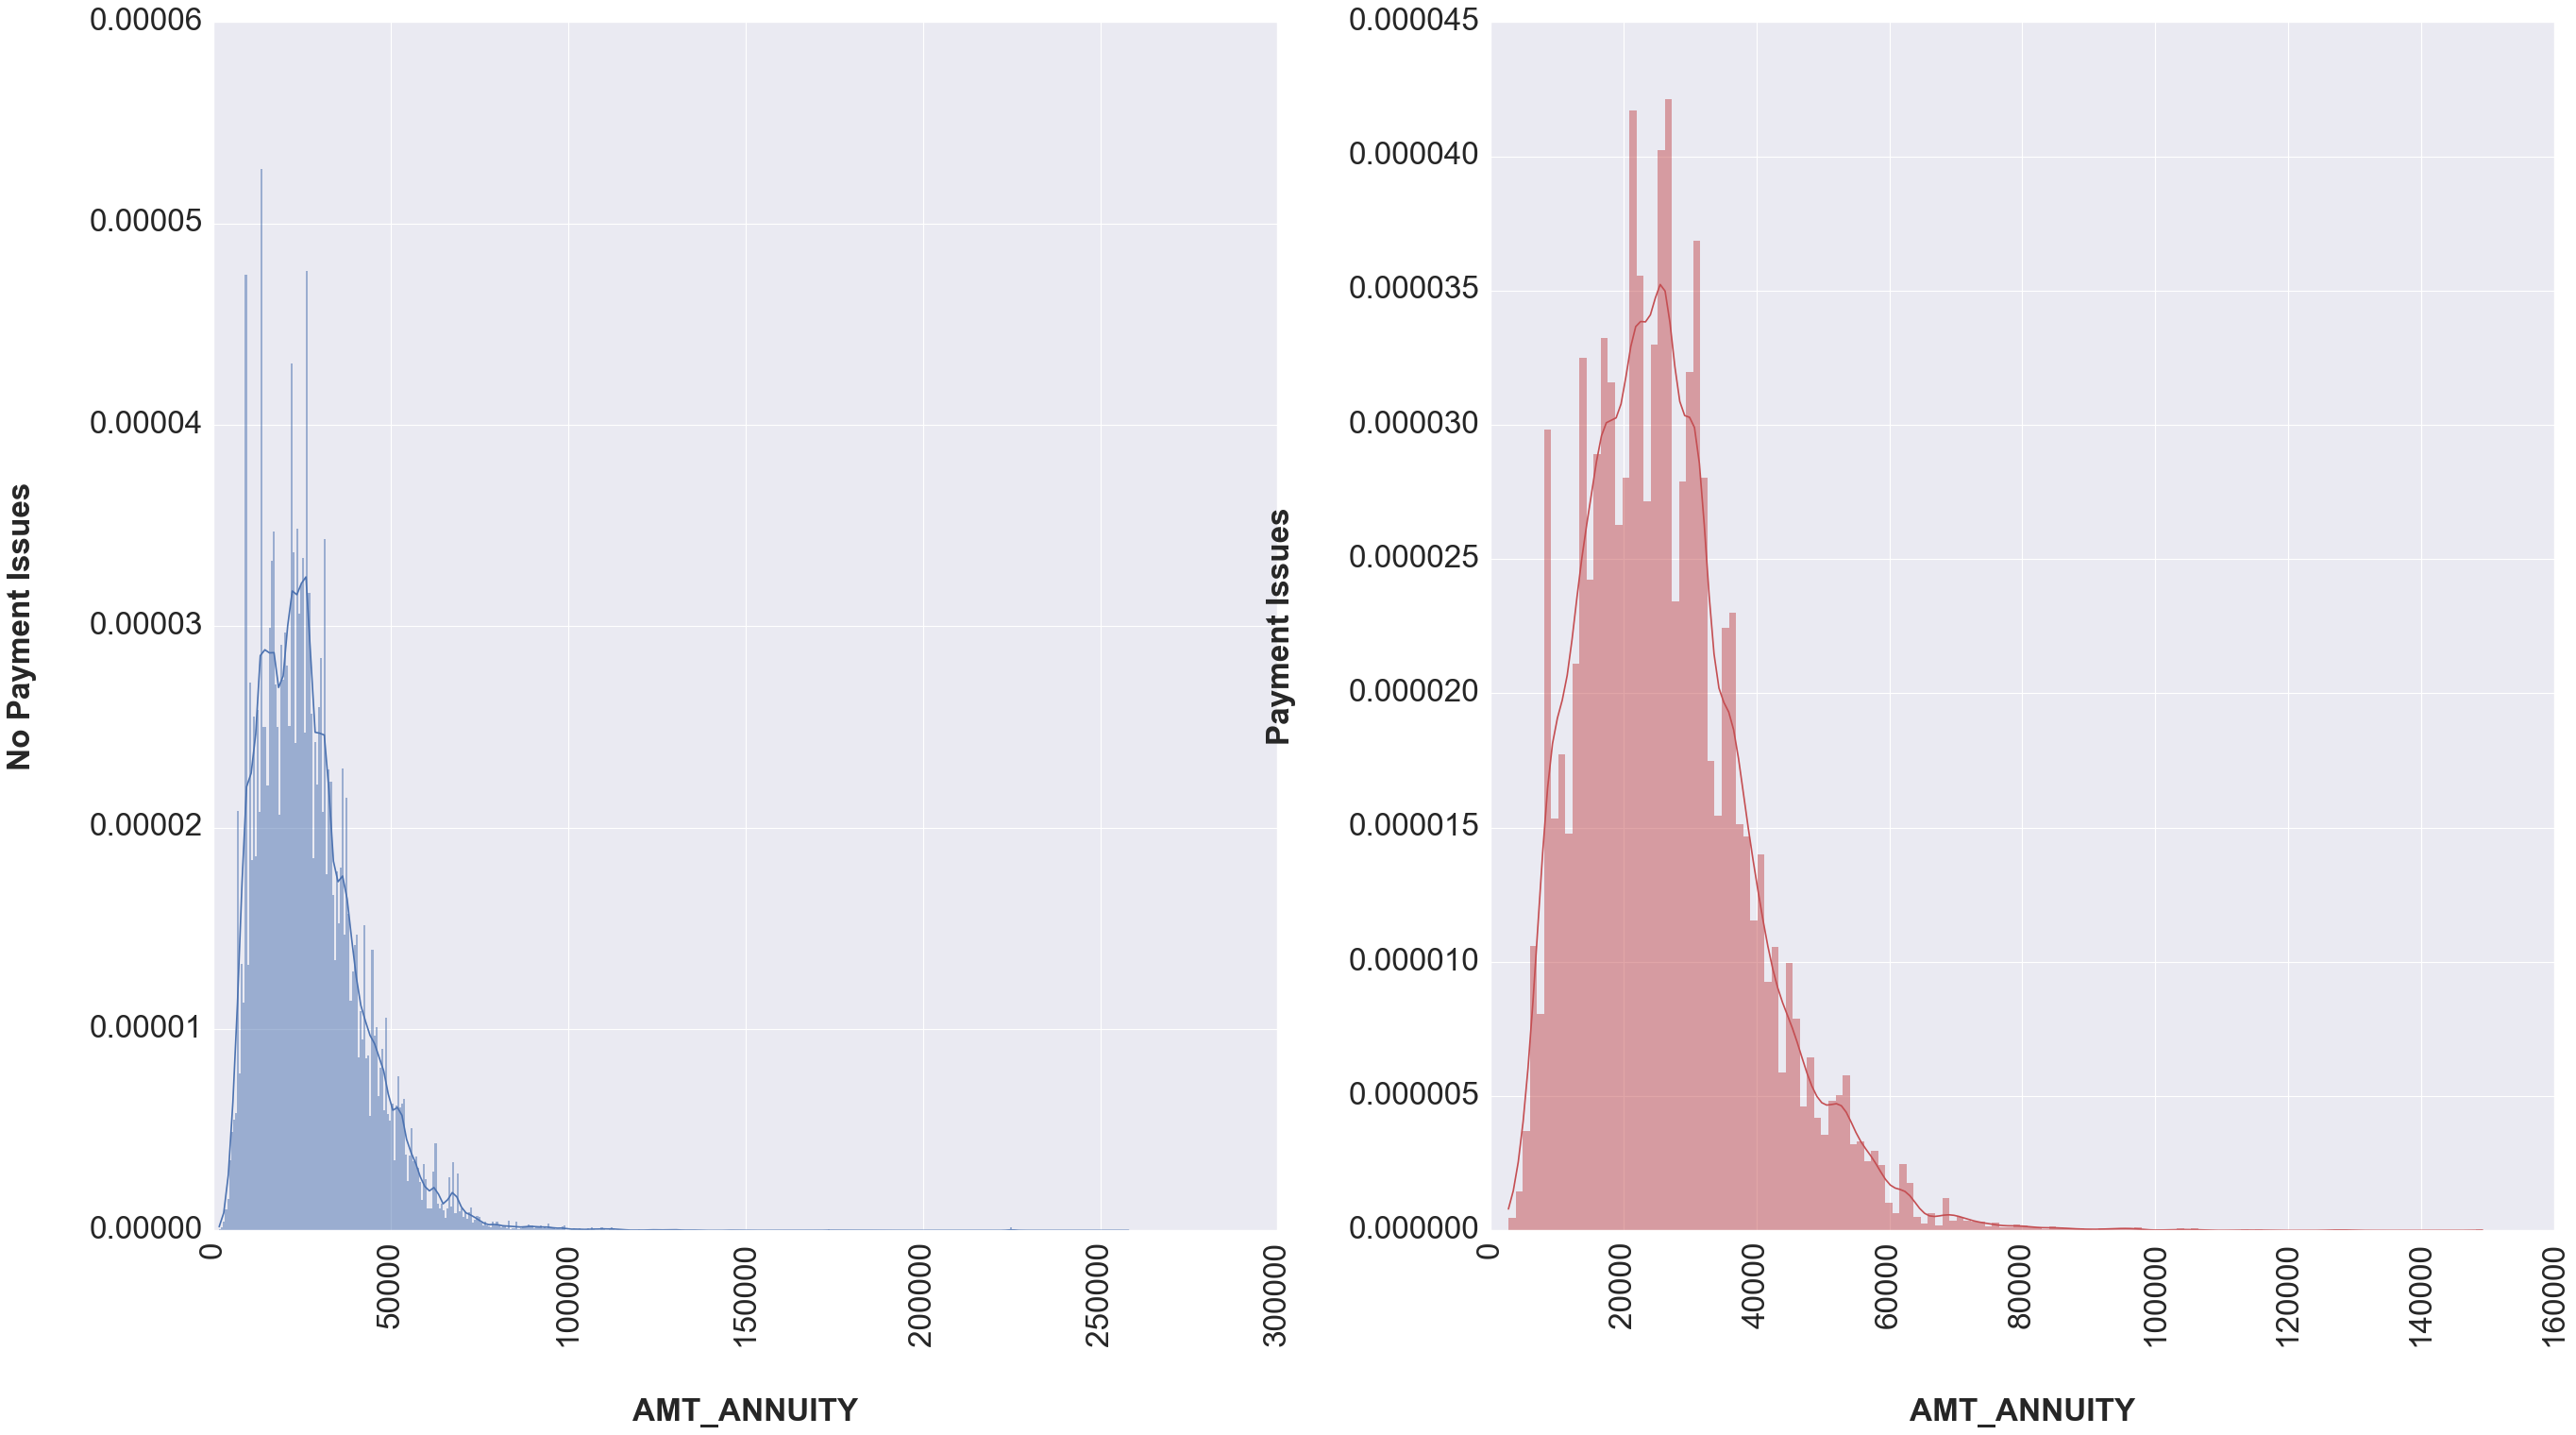

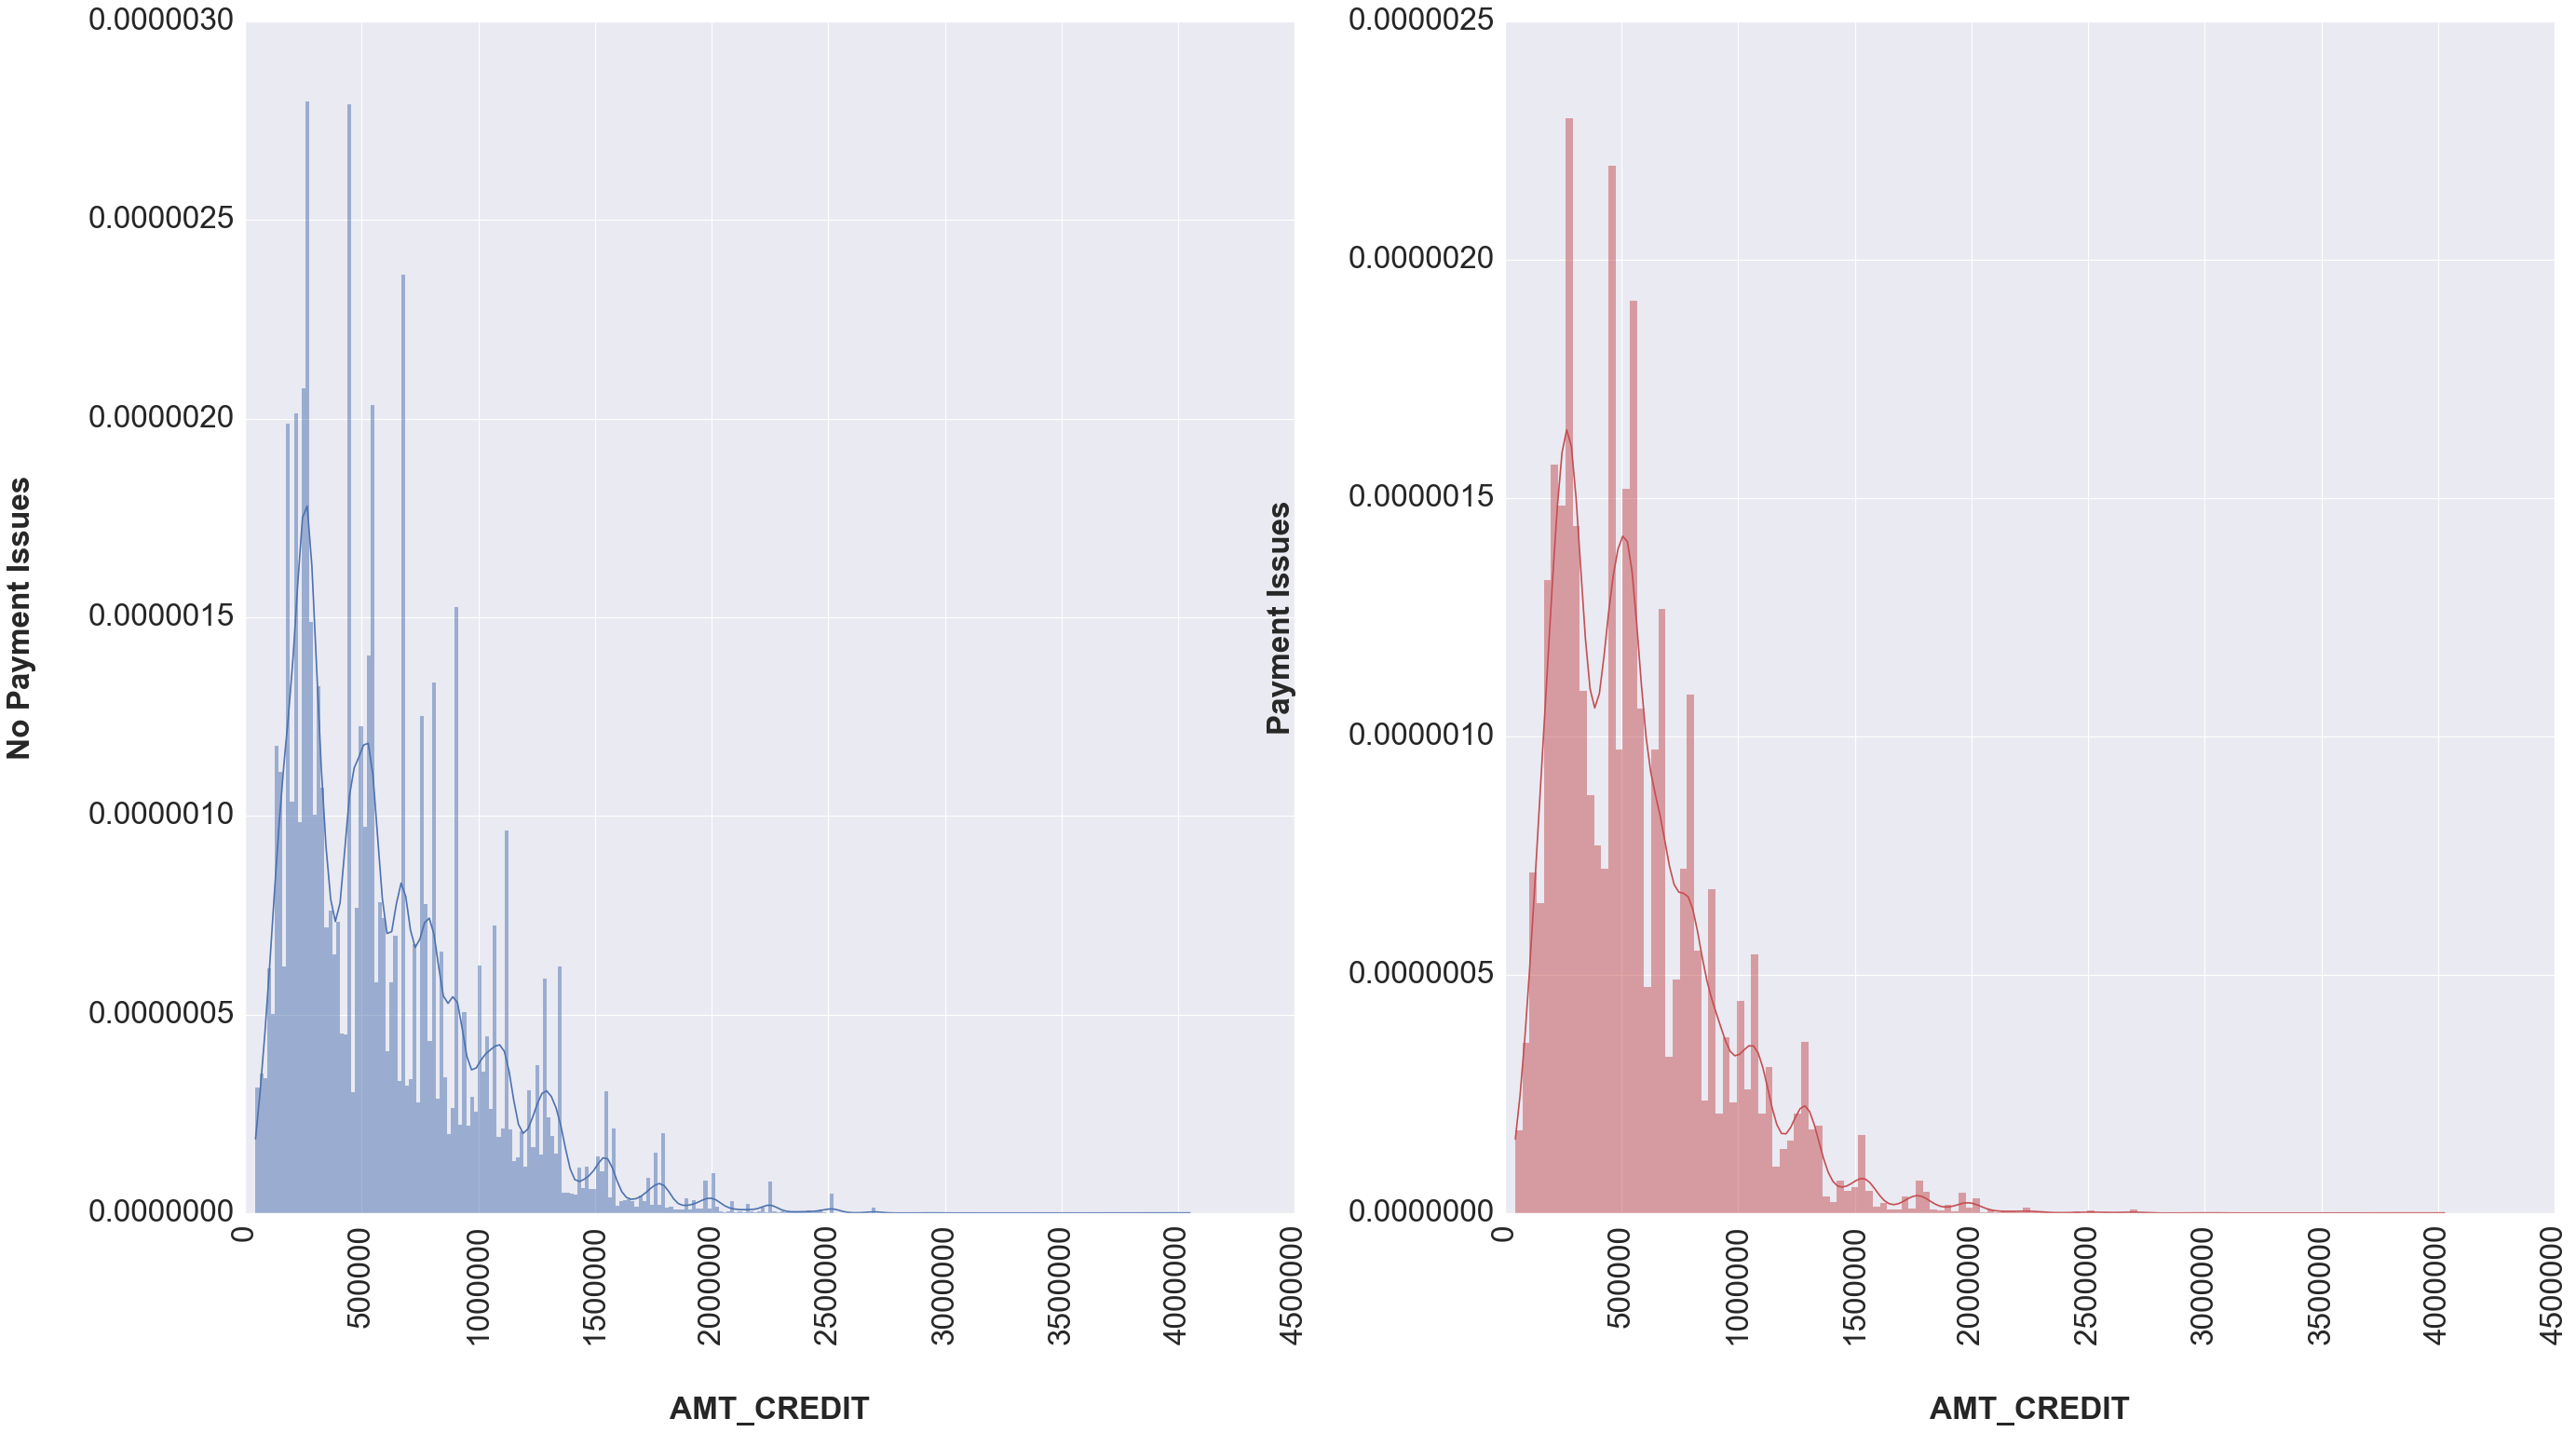

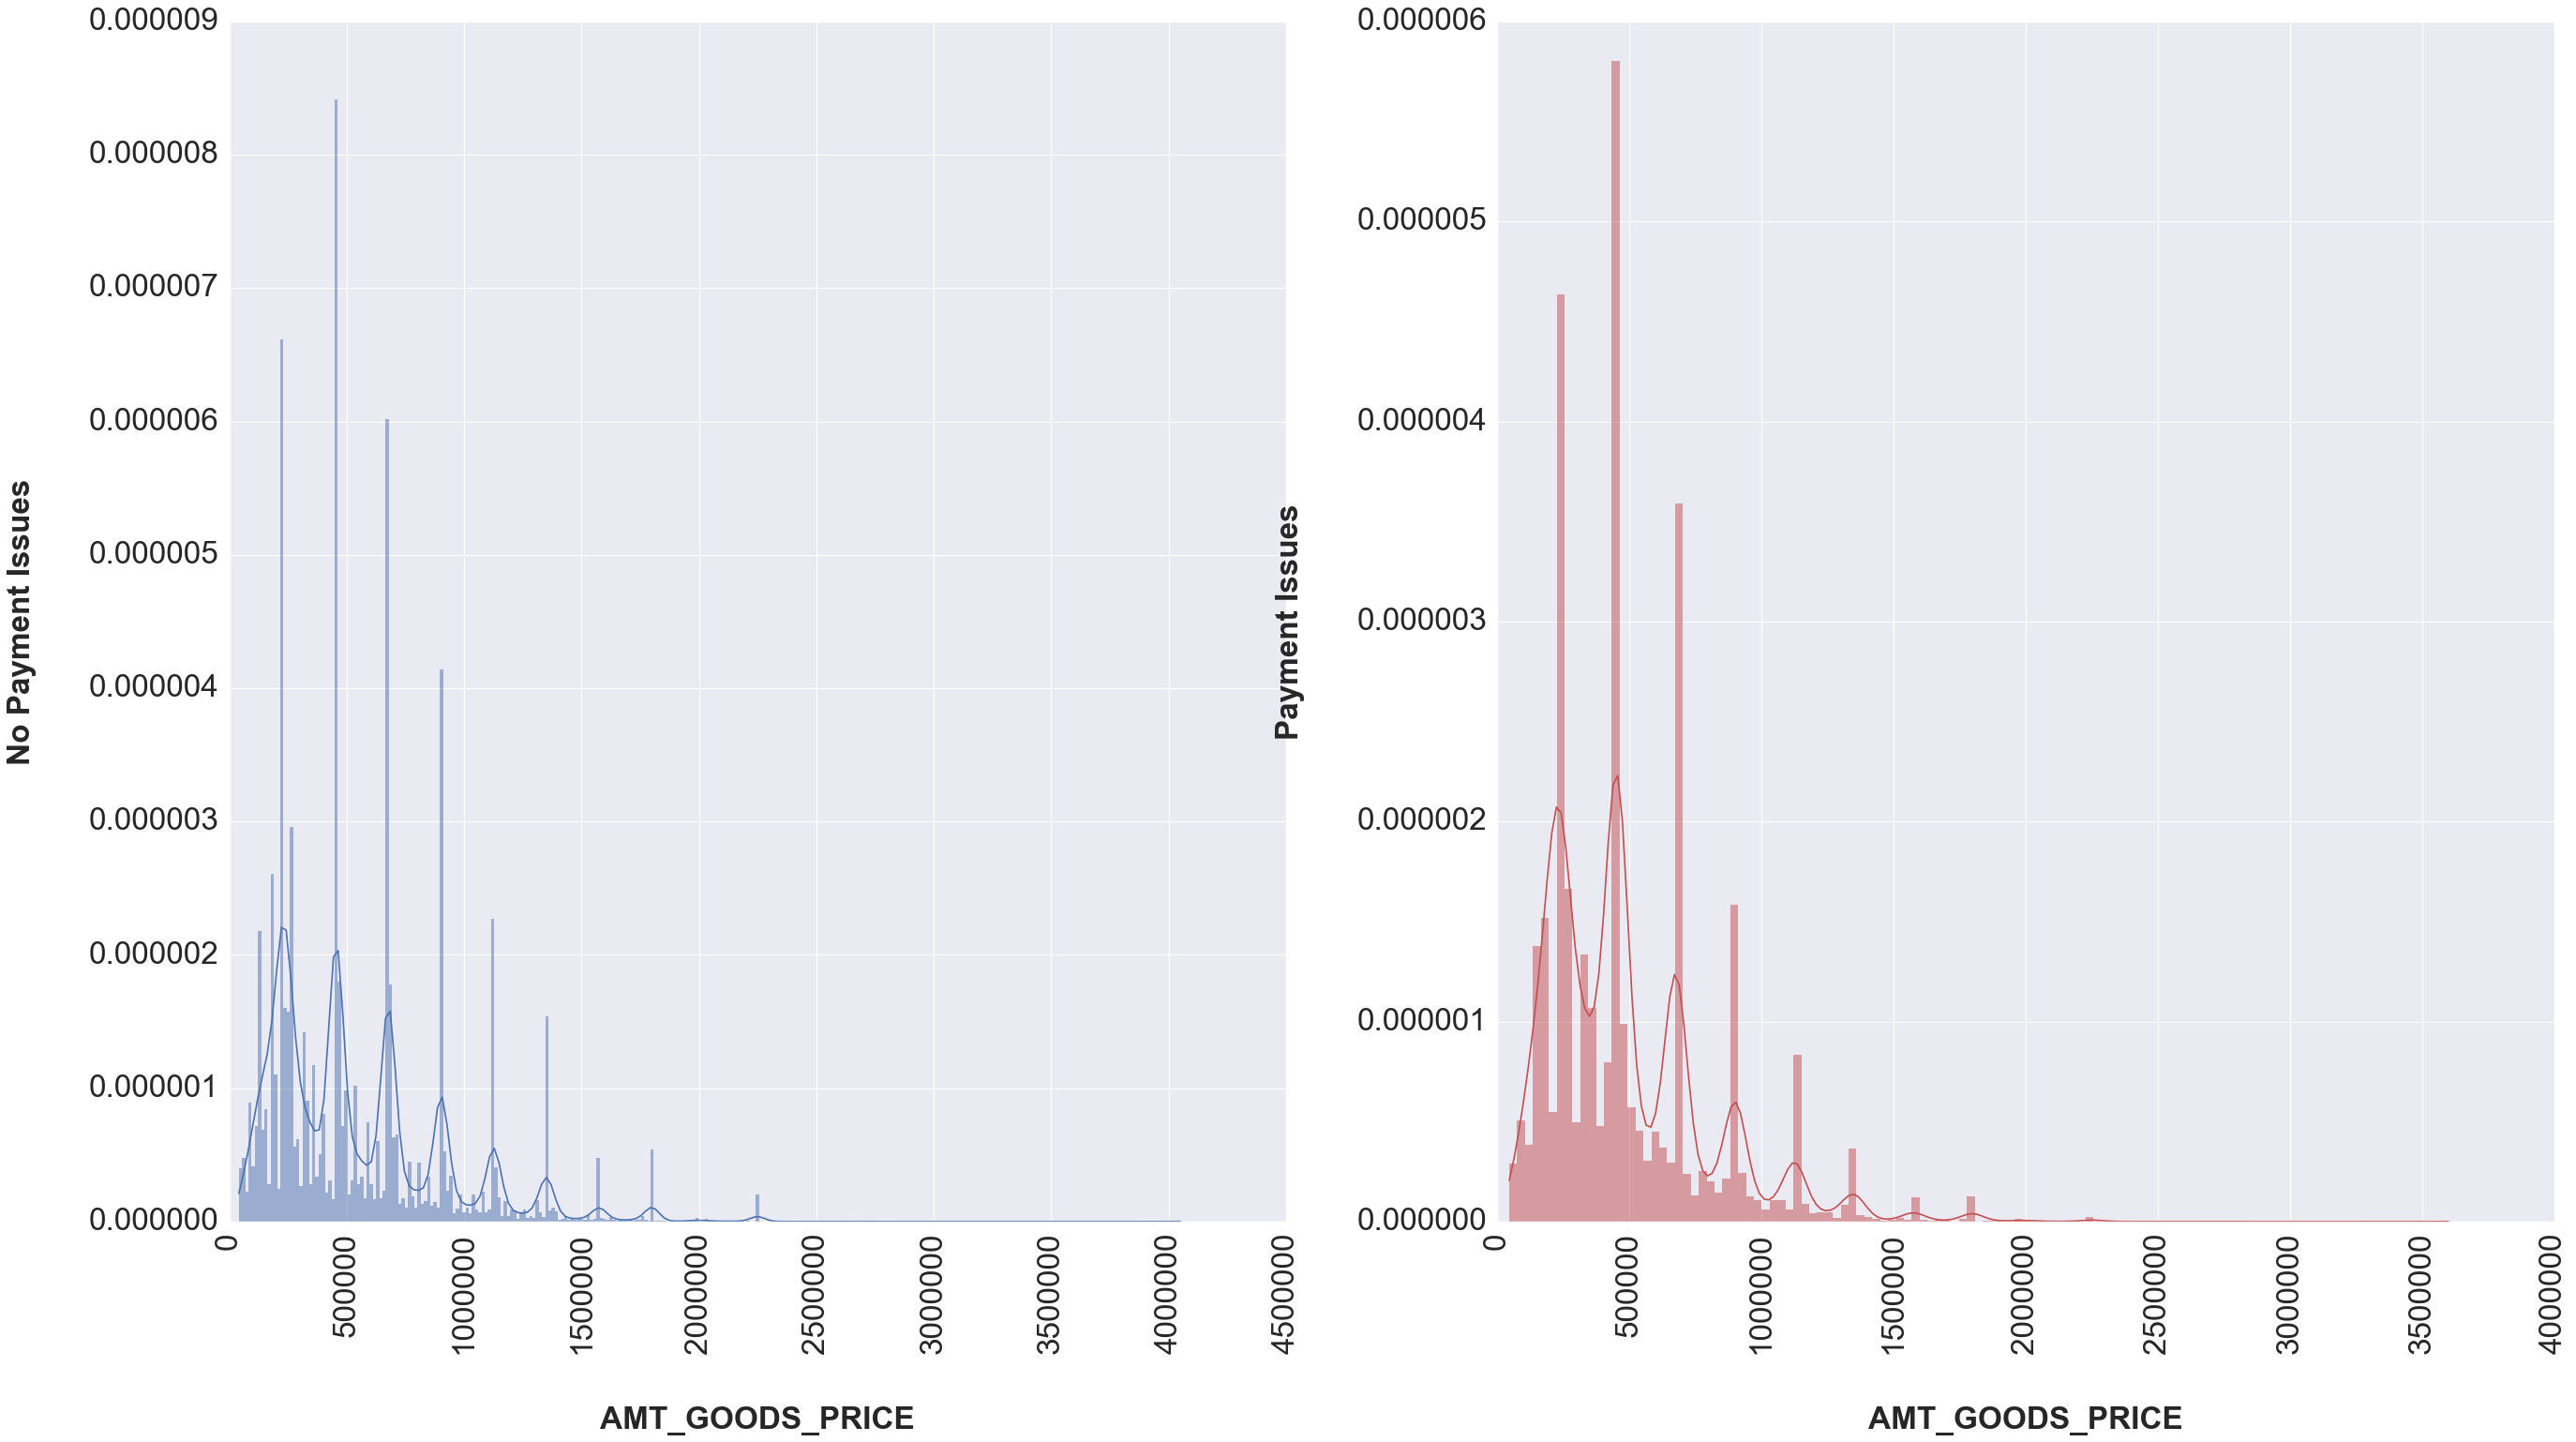

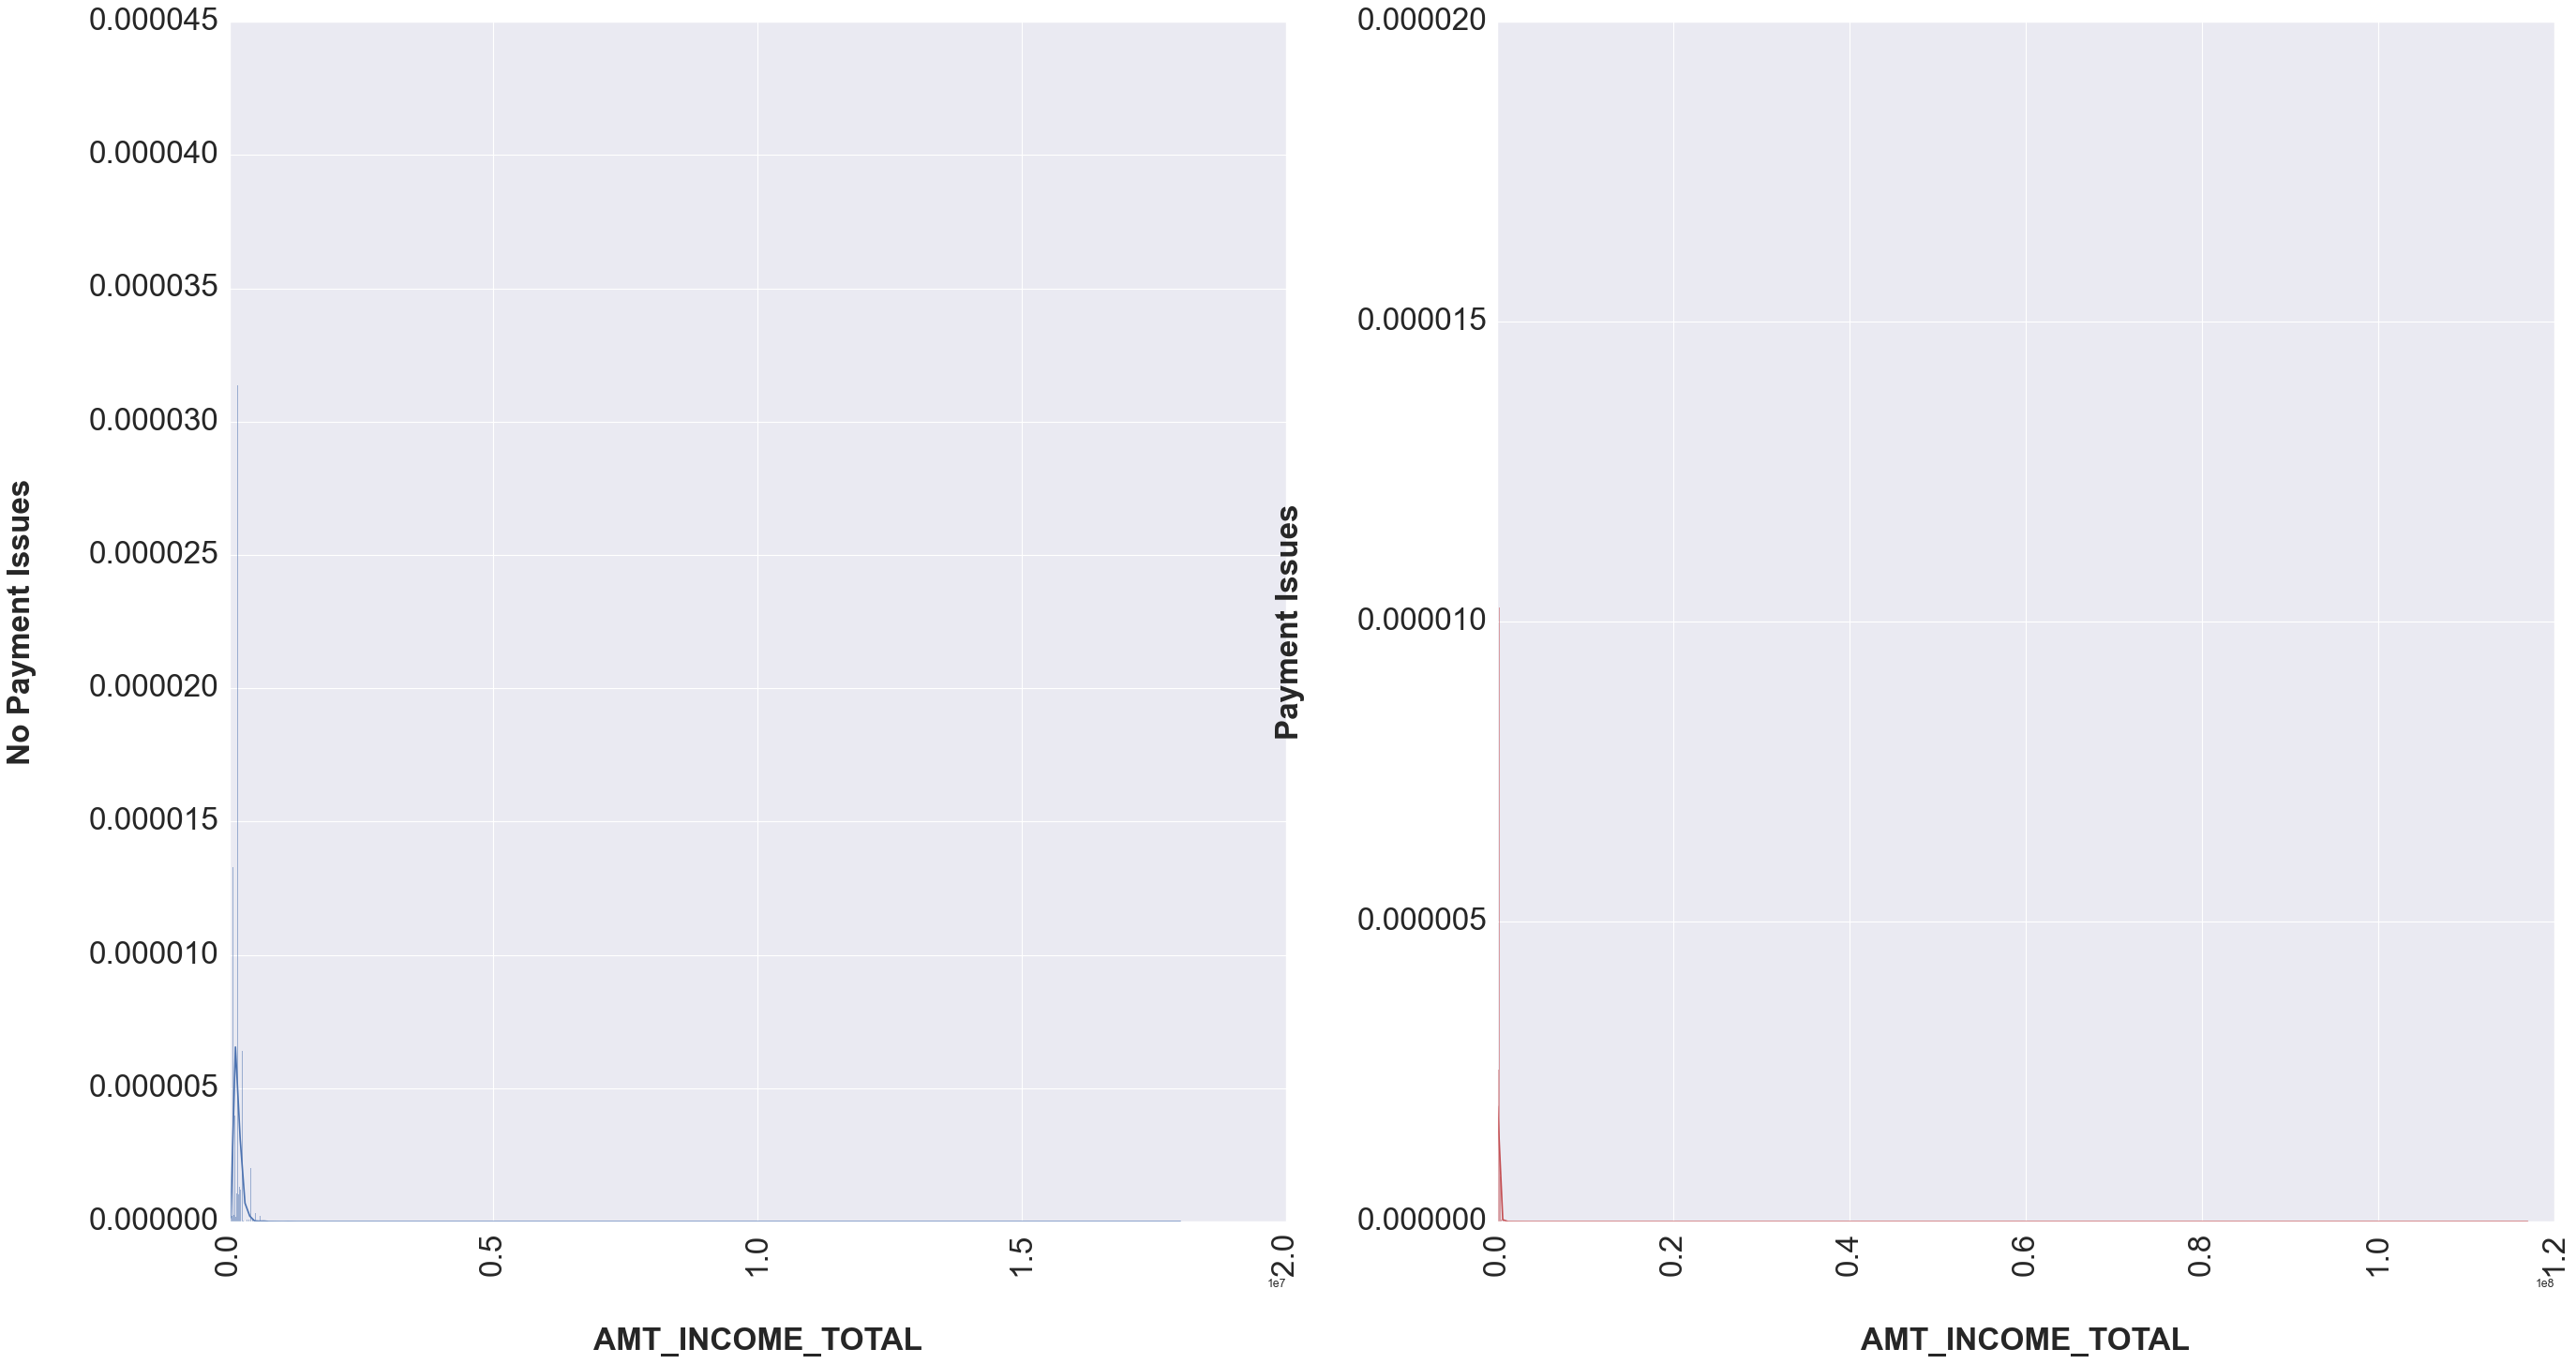

In [90]:
numericals=['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL']
for i in numericals:
    numerical_analysis(i)


`1) People with Default tendency have more spread annuity as compared to Non Defaulters .
 2) Amt Income total, Amt Annuity, Amt Credit and Good Price is similar for Non Defaulters and similar for    Defaulters.`


In [91]:
# Getting correlation for Selected columns in Non Defaulter List
corr0=target0.corr()
corr_df = corr0.where(np.triu(np.ones(corr0.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Col1','Col2','Correlation for non defaulter']
corr_df.dropna(subset=['Correlation for non defaulter'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation for non defaulter'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

Col1  \
854                         FLAG_EMP_PHONE   
3973                                   AGE   
2110              OBS_60_CNT_SOCIAL_CIRCLE   
394                        AMT_GOODS_PRICE   
1319           REGION_RATING_CLIENT_W_CITY   
1172                       CNT_FAM_MEMBERS   
4223  SOCIAL_CIRCLE_60_DAYS_DEF_PERCENTAGE   
1583           LIVE_REGION_NOT_WORK_REGION   
2176              DEF_60_CNT_SOCIAL_CIRCLE   
1781               LIVE_CITY_NOT_WORK_CITY   

                                      Col2  Correlation for non defaulter  \
854                          DAYS_EMPLOYED                      -0.999756   
3973                            DAYS_BIRTH                       0.999706   
2110              OBS_30_CNT_SOCIAL_CIRCLE                       0.998510   
394                             AMT_CREDIT                       0.987022   
1319                  REGION_RATING_CLIENT                       0.950149   
1172                          CNT_CHILDREN                       0.878571   
4223  SOCIAL_CIRCLE_30_DAYS_DEF_PERCENTAGE                       0.873003   
1583            REG_REGION_NOT_WORK_REGION                       0.861861   
2176              DEF_30_CNT_SOCIAL_CIRCLE                       0.859371   
1781                REG_CITY_NOT_WORK_CITY                       0.830381   

      Abs_Correlation  
854          0.999756  
3973         0.999706  
2110         0.998510  
394          0.987022  
1319         0.950149  
1172         0.878571  
4223         0.873003  
1583         0.861861  
2176         0.859371  
1781         0.830381

In [92]:
# Getting correlation for Selected columns in Defaulter List
corr1=target1.corr()
corr_df = corr1.where(np.triu(np.ones(corr1.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Col1','Col2','Correlation for defaulter']
corr_df.dropna(subset=['Correlation for defaulter'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation for defaulter'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

Col1  \
854                         FLAG_EMP_PHONE   
3973                                   AGE   
2110              OBS_60_CNT_SOCIAL_CIRCLE   
394                        AMT_GOODS_PRICE   
1319           REGION_RATING_CLIENT_W_CITY   
1172                       CNT_FAM_MEMBERS   
4223  SOCIAL_CIRCLE_60_DAYS_DEF_PERCENTAGE   
2176              DEF_60_CNT_SOCIAL_CIRCLE   
1583           LIVE_REGION_NOT_WORK_REGION   
1781               LIVE_CITY_NOT_WORK_CITY   

                                      Col2  Correlation for defaulter  \
854                          DAYS_EMPLOYED                  -0.999705   
3973                            DAYS_BIRTH                   0.999680   
2110              OBS_30_CNT_SOCIAL_CIRCLE                   0.998270   
394                             AMT_CREDIT                   0.982783   
1319                  REGION_RATING_CLIENT                   0.956637   
1172                          CNT_CHILDREN                   0.885484   
4223  SOCIAL_CIRCLE_30_DAYS_DEF_PERCENTAGE                   0.874562   
2176              DEF_30_CNT_SOCIAL_CIRCLE                   0.869016   
1583            REG_REGION_NOT_WORK_REGION                   0.847885   
1781                REG_CITY_NOT_WORK_CITY                   0.778540   

      Abs_Correlation  
854          0.999705  
3973         0.999680  
2110         0.998270  
394          0.982783  
1319         0.956637  
1172         0.885484  
4223         0.874562  
2176         0.869016  
1583         0.847885  
1781         0.778540

## G)Bivariate Analysis

In [93]:
def bivariate_analysis(var1,var2):

    plt.style.use('classic')
    plt.figure(figsize = (15,10))
    plt.subplot(1, 2, 1)
    sns.countplot(x = target0[var1], hue = target0[var2])
    plt.title('For Non Defaulters')
    plt.xticks(rotation=90)
    plt.subplot(1, 2, 2)
    sns.countplot(x = target1[var1] ,hue = target1[var2])
    plt.title('For Defaulters')
    plt.xticks(rotation=90)
    plt.show()

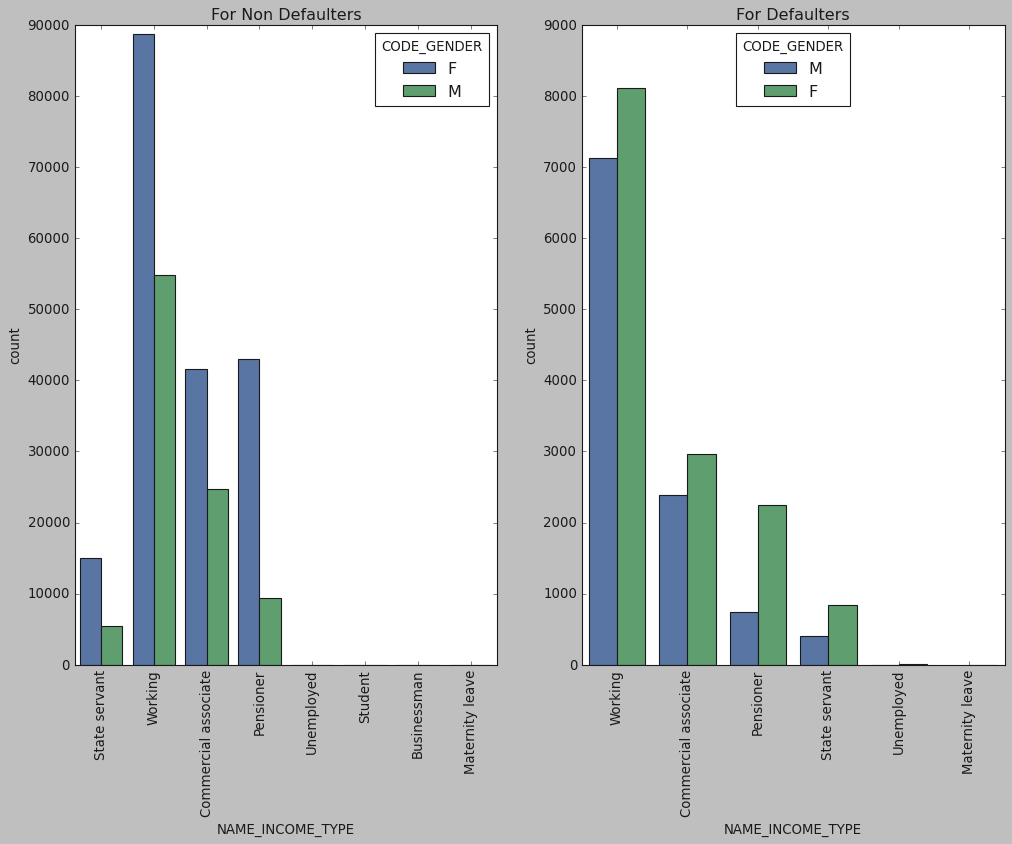

In [94]:
bivariate_analysis("NAME_INCOME_TYPE","CODE_GENDER")


` Result:Working females have both non-defaulter as well as defaulter frequency
  For Pensioner the default frequency of women is more`

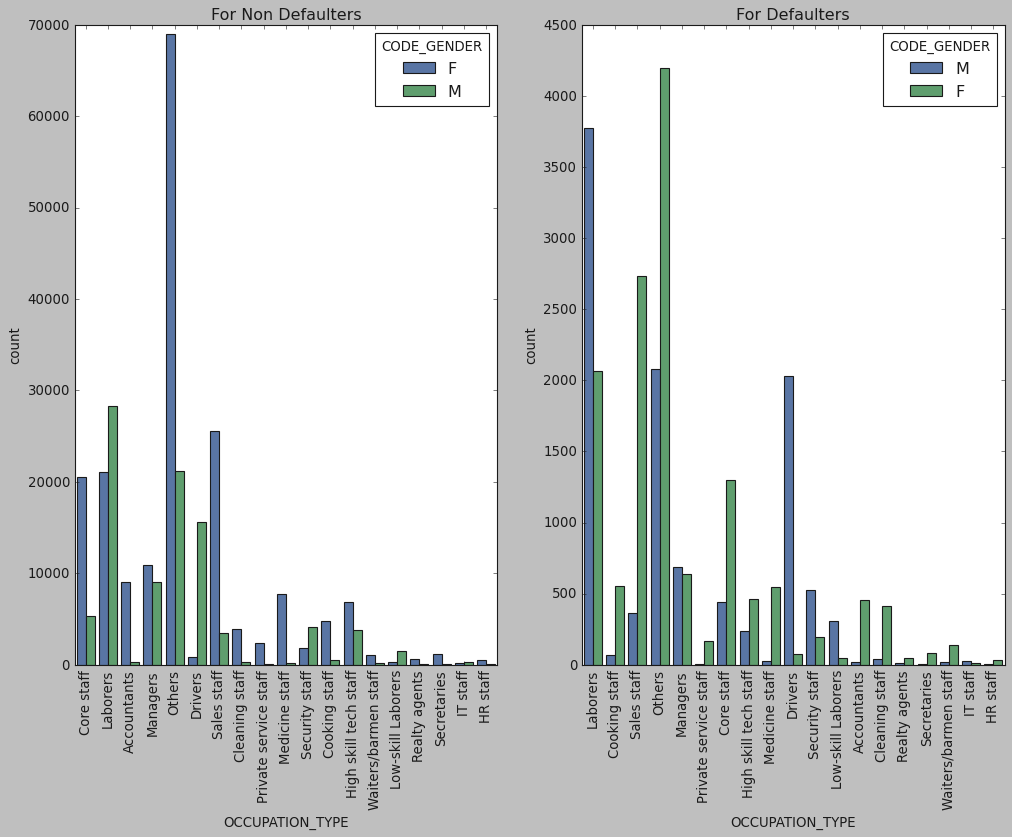

In [95]:
bivariate_analysis("OCCUPATION_TYPE","CODE_GENDER")

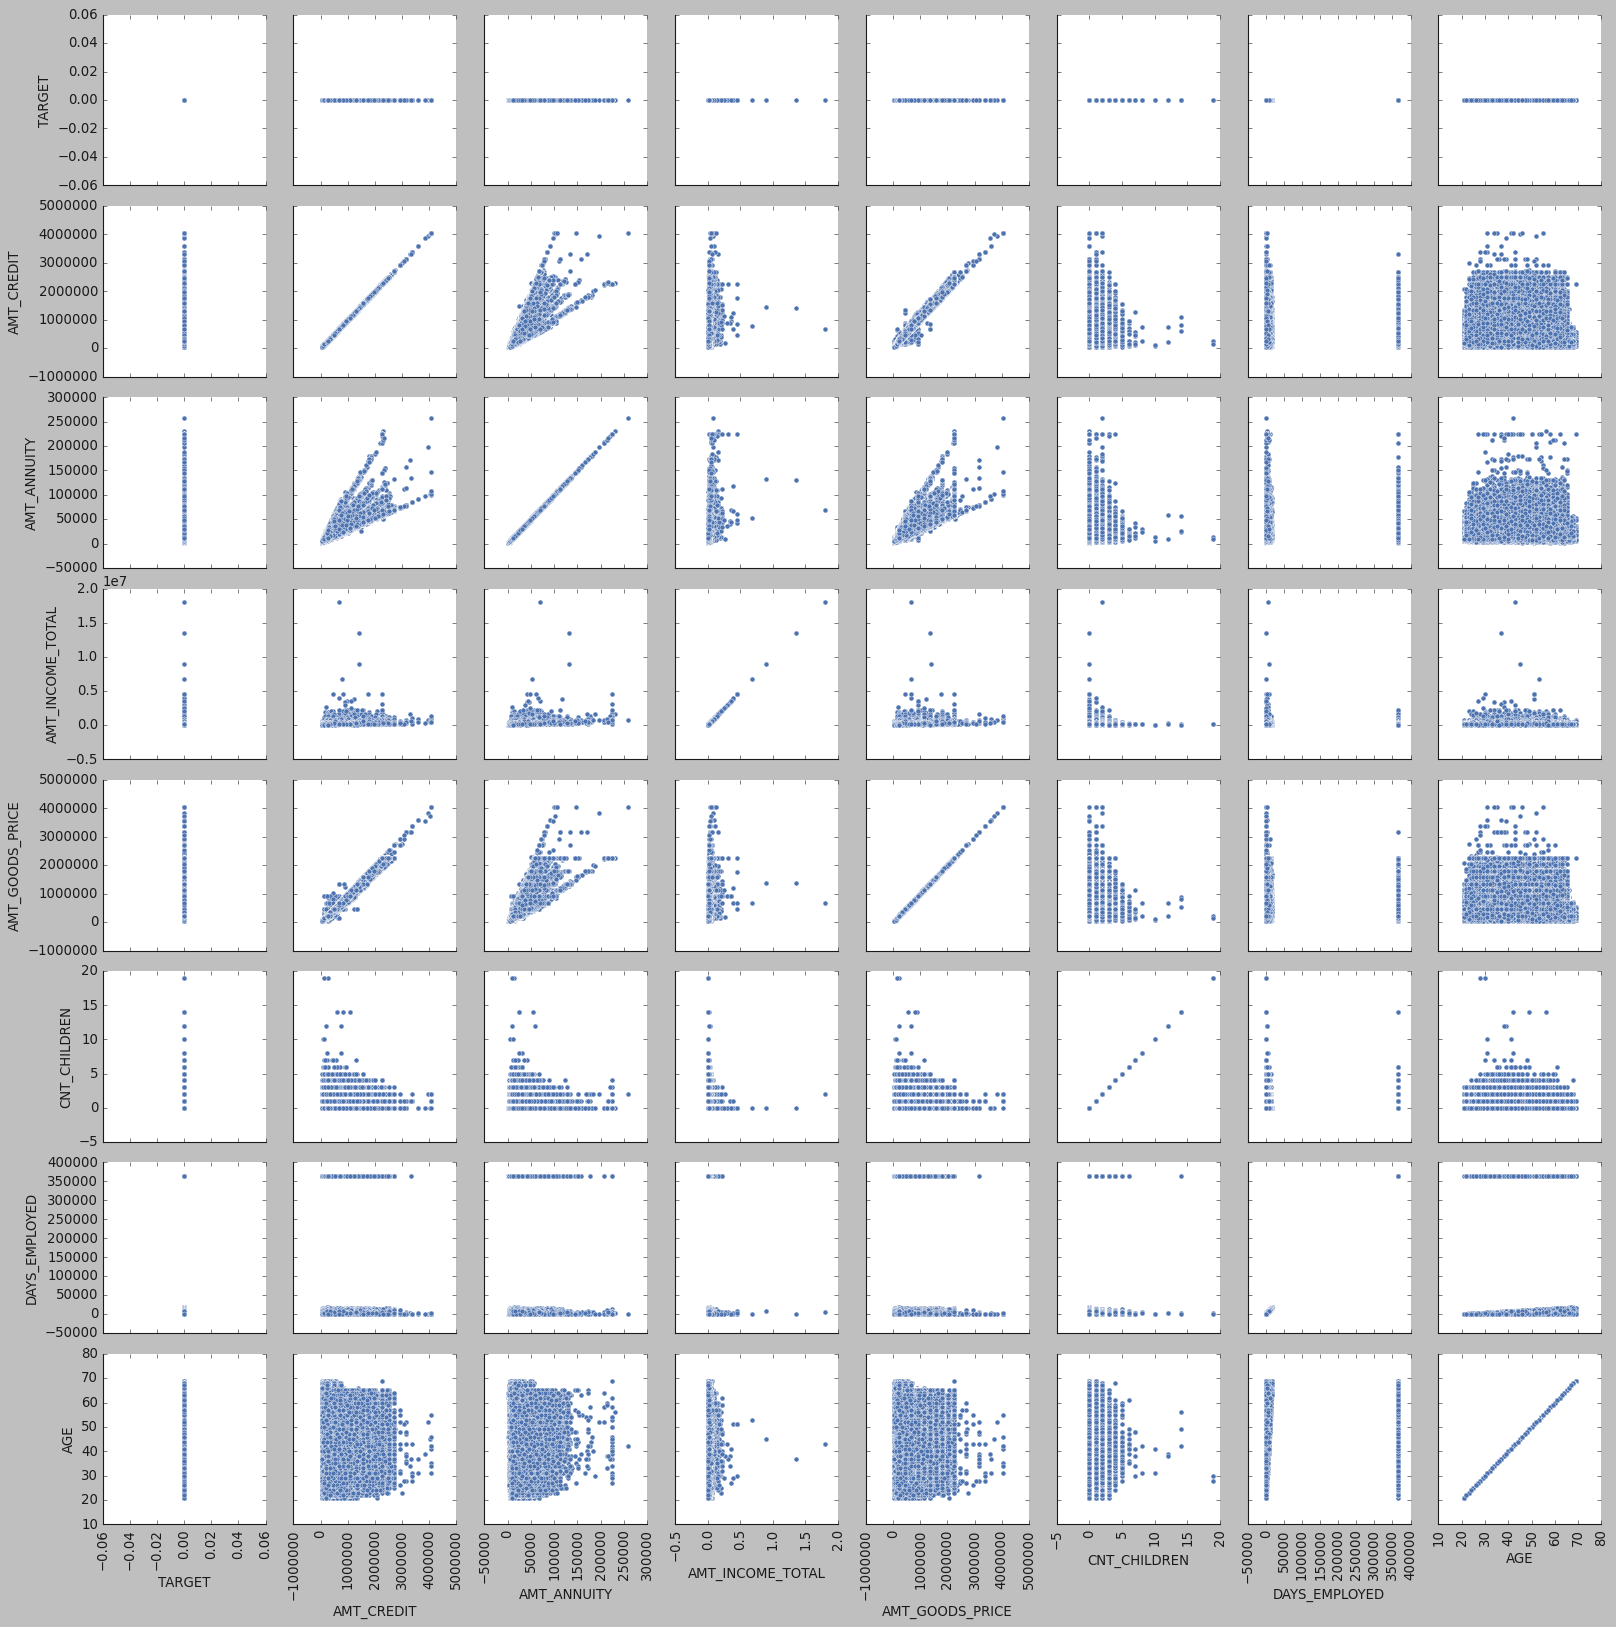

In [96]:
#Pair grid for Non Defaulters
pair = target0[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'CNT_CHILDREN','DAYS_EMPLOYED', 'AGE']].fillna(0)
g = sns.PairGrid(pair)
g.map(sns.scatterplot)
g.fig.draw(
    g.fig.canvas.get_renderer()
)  
for ax in g.axes.flat: 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

`For non defaulters:Amt_credit and Amt_annuity vs amt_income_total is spread across their graphs which could suggest that as income_total increases somewhat in relation to amt_credit and amt-annuity`

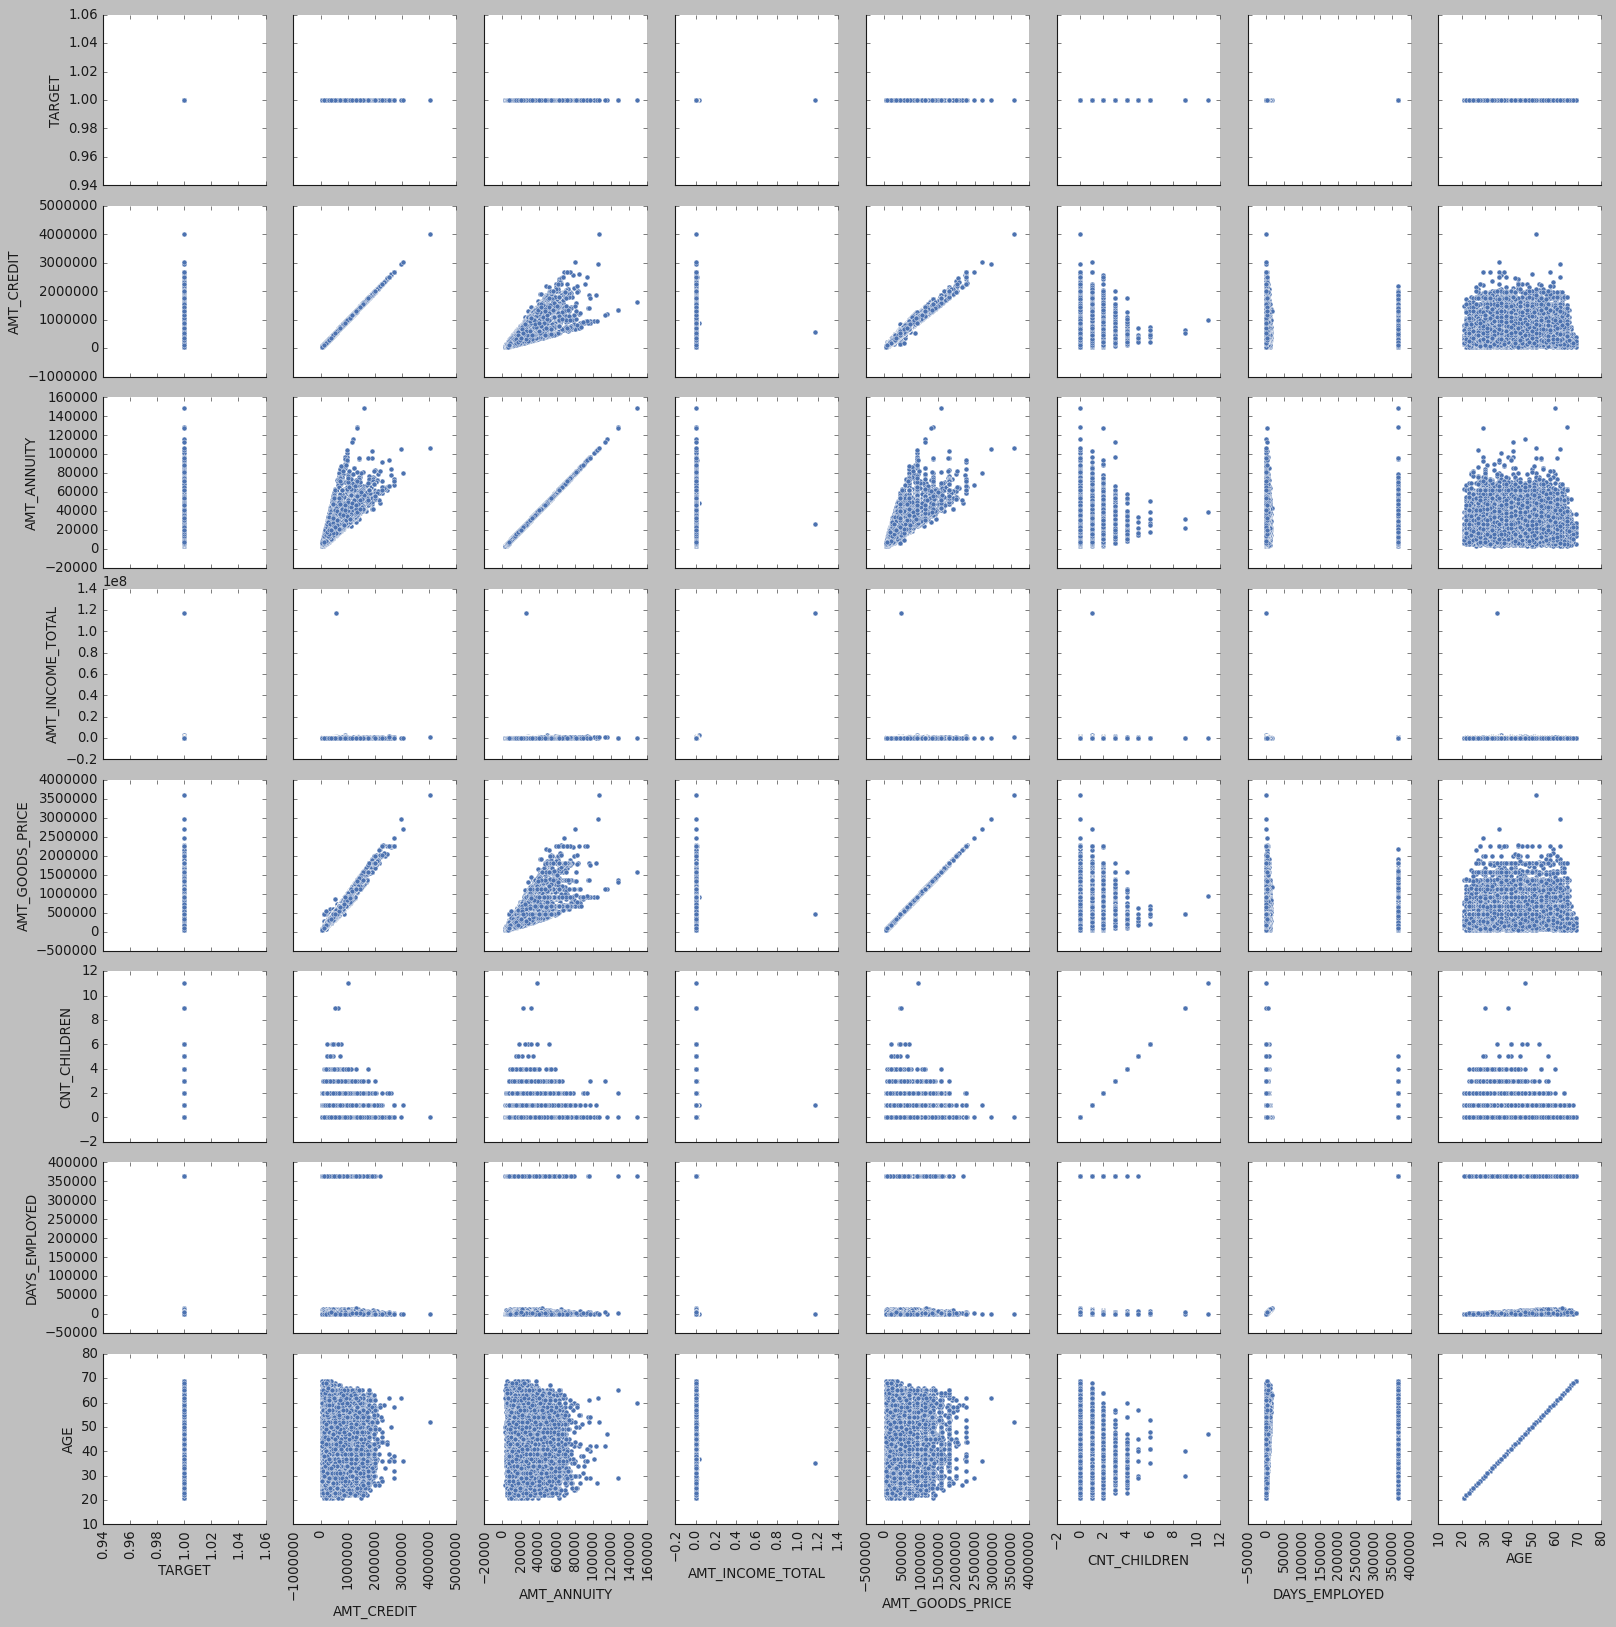

In [97]:
#pair grid for defaulters
pair = target1[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'CNT_CHILDREN','DAYS_EMPLOYED', 'AGE']].fillna(0)
g = sns.PairGrid(pair)
g.map(sns.scatterplot)
g.fig.draw(
    g.fig.canvas.get_renderer()
)  
for ax in g.axes.flat: 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

`For defaulters:Amt_income is pretty much straightforward in vertical way so amt_annuity and amt_credit react in a similar way`

In [98]:
target0.AMT_INCOME_TOTAL.dtype
target0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0            270000     1293502        35698   
2               Y             0             67500      135000         6750   
3               Y             0            135000      312682        29686   
4               Y             0            121500      513000        21865   
5               Y             0             99000      490495        27517   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1          1129500           Family    State servant   
2           135000    Unaccompanied          Working   
3           297000    Unaccompanied          Working   
4           513000    Unaccompanied          Working   
5           454500  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                           0       16765           1188               1186   
2                           0       19046            225               4260   
3                           0       19005           3039               9833   
4                           0       19932           3038               4311   
5                           0       16941           1588               4970   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   
5              477           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
1                 1           1           0      Core staff                2   
2                 1           1           0        Laborers                1   
3                 1           0           0        Laborers                2   
4                 1           0           0      Core staff                1   
5                 1           1           0        Laborers                2   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   
5                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   
5                  WEDNESDAY                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0       

In [99]:
def targets_corr(data, title):
    plt.figure(figsize=(15,10))
    mask = np.zeros_like(data)
    mask[np.triu_indices_from(mask)]=True
    with sns.axes_style("white"):
        ax=sns.heatmap(data,cmap="RdYlBu",mask=mask)
    plt.title(title,fontsize=30, pad=20)

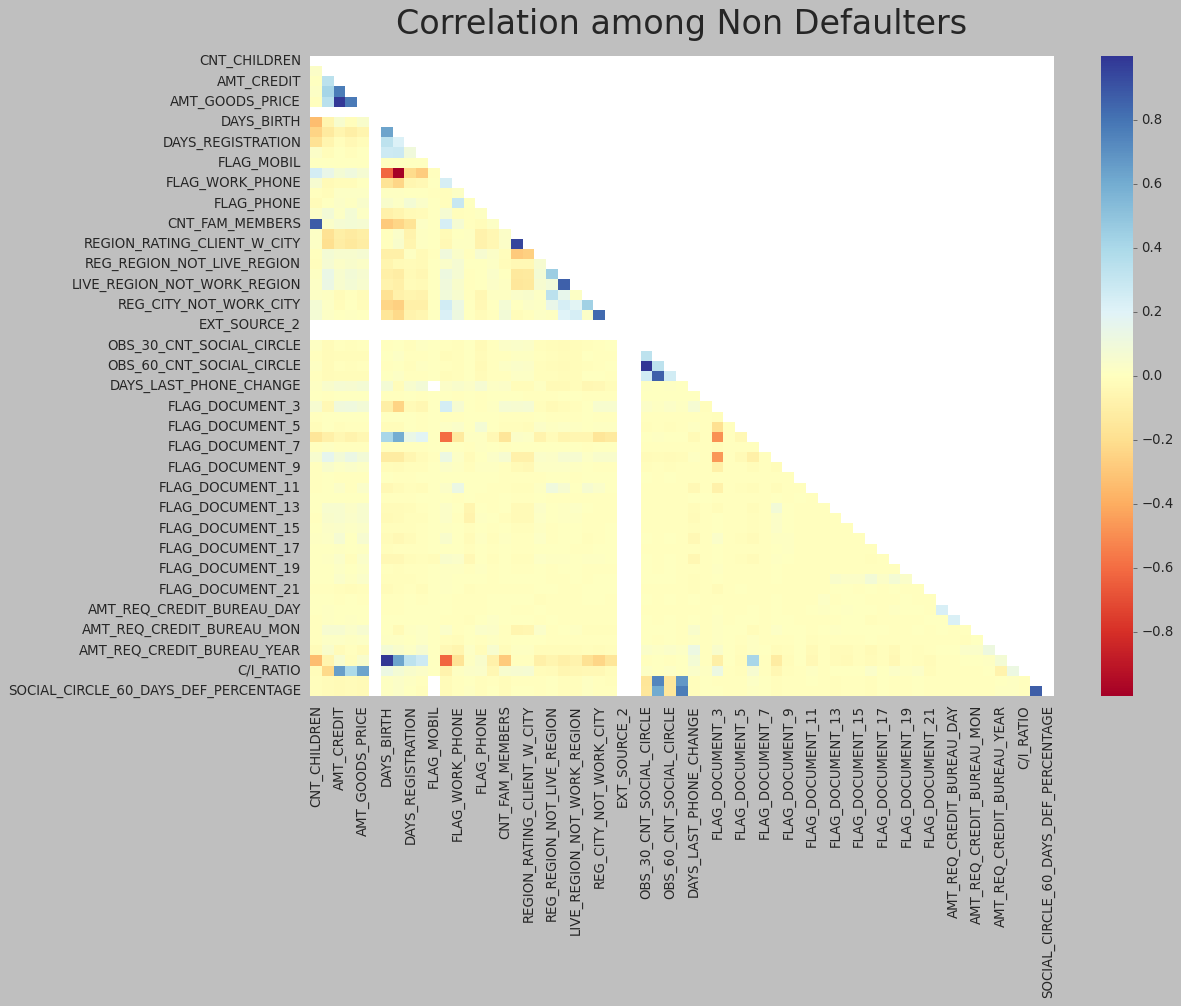

In [100]:
corr0=target0.iloc[0:,2:]
targets_corr(data=corr0.corr(),title='Correlation among Non Defaulters')

plt.show()

`Result: Following Variables have high correlation
AMT_GOODS_PRICE and AMT_CREDIT
AMT_ANNUITY and AMT_CREDIT
AMT_ANNUITY and AMT_GOODS_PRICE
CNT_FAM_MEMBERS and CNT_CHILDREN`

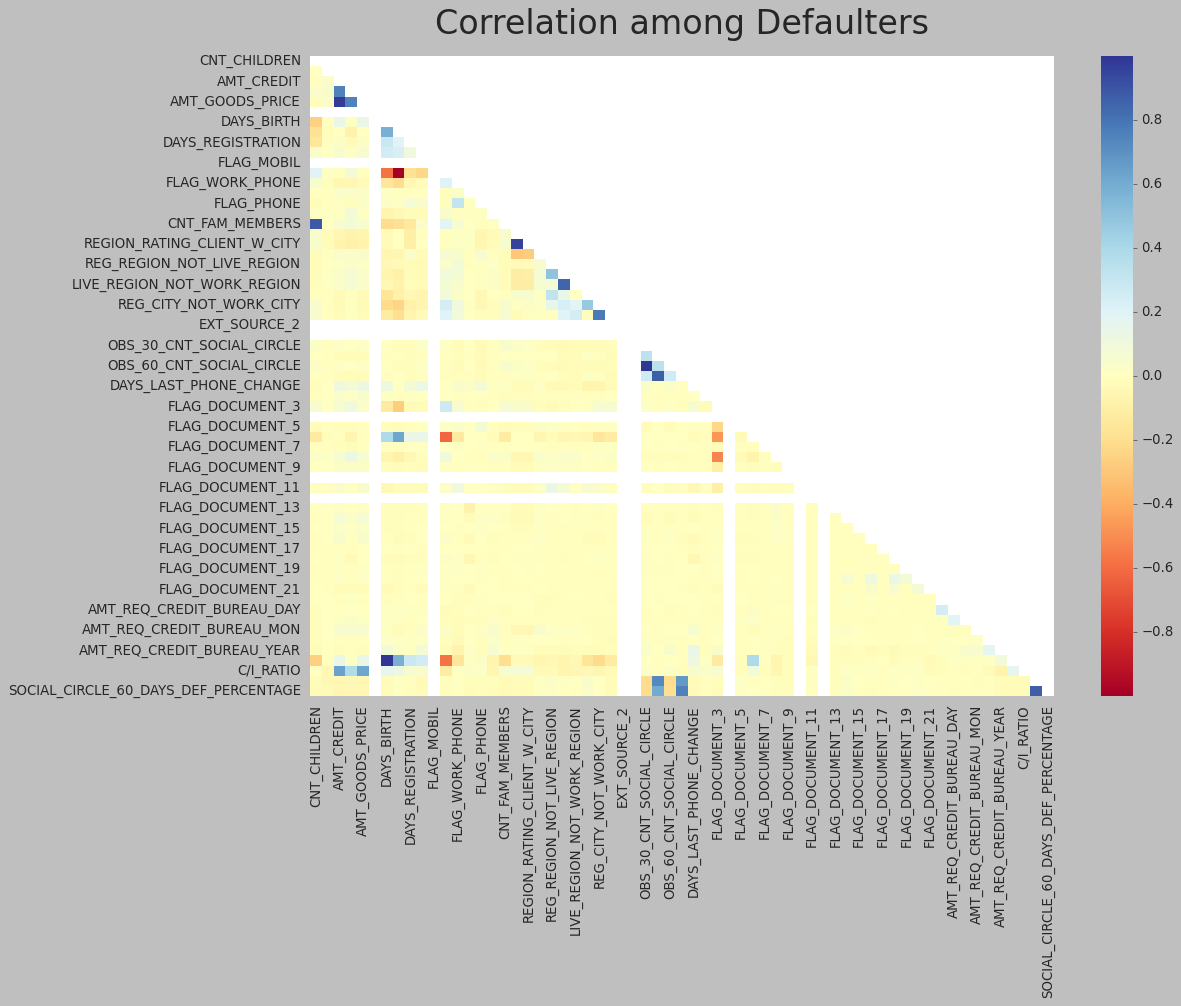

In [101]:
corr1=target1.iloc[0:,2:]
targets_corr(data=corr1.corr(),title='Correlation among Defaulters')



`Result:Heatmap for target 1 is also having somewhat similar observation like target 0.`

## H)Analysis For Previous Application Data

In [102]:
df1=pd.read_csv('previous_application.csv')

In [103]:
df1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [104]:
df1.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [105]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [106]:
df1.shape

(1670214, 37)

In [107]:
print(len( df1.columns[df1.isna().any()] ))


16


## Identification of Null Values and Outliers

In [108]:
# Lets keep a cap of 40%, variables greater than 40 are dropped
truncate_columns=(df1.isna().mean()*100)
truncate_columns[ truncate_columns>40 ].keys()
df1.drop(truncate_columns[ truncate_columns>40 ].keys(), axis=1, inplace=True )
df1.head()


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         12.0           middle  POS mobile with interest  
1         36.0       low_action          Cash X-Sell: low  
2         12.0             high         Cash X-Sell: high  
3         12.0           middle       Cash X-Sell: middle  
4         24.0             high         Cash Street: high

In [109]:
df1.shape

(1670214, 26)

In [110]:
totals=df1.isna().sum()
percentage=round( df1.isna().mean()*100, 4 )
null_col=pd.concat([totals,percentage], axis=1, keys=['Null records', 'Percentage']).sort_values(by="Percentage")
null_col[null_col['Percentage']>0]

Null records  Percentage
AMT_CREDIT                      1      0.0001
PRODUCT_COMBINATION           346      0.0207
CNT_PAYMENT                372230     22.2864
AMT_ANNUITY                372235     22.2867
AMT_GOODS_PRICE            385515     23.0818

`Identification of null values`

In [111]:
df1.dtypes.value_counts()

object     15
int64       6
float64     5
dtype: int64

In [112]:
def outliers(col):
    plt.style.use('classic')
    sns.boxplot(x=df1[col])
    plt.title(f'Analysis of {col}',y=0.832)
    plt.xlabel(f'{col}', labelpad=10)
    plt.show()

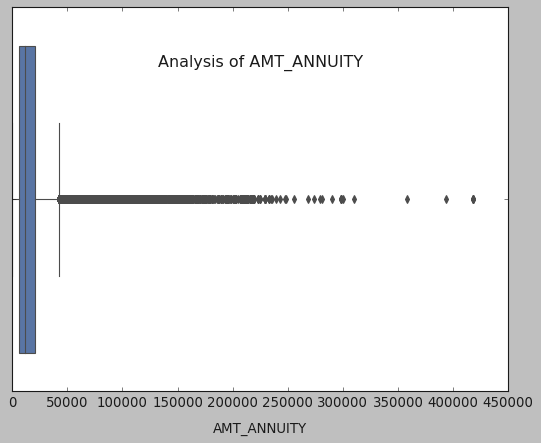

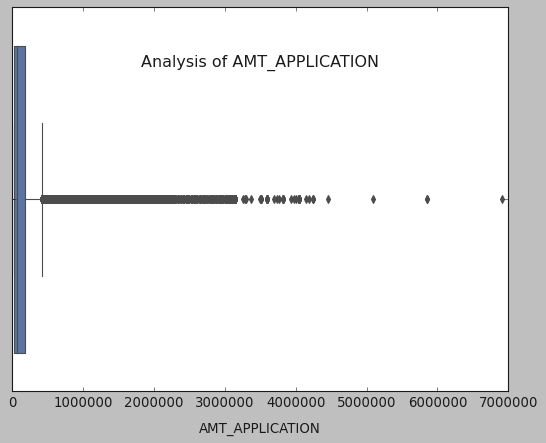

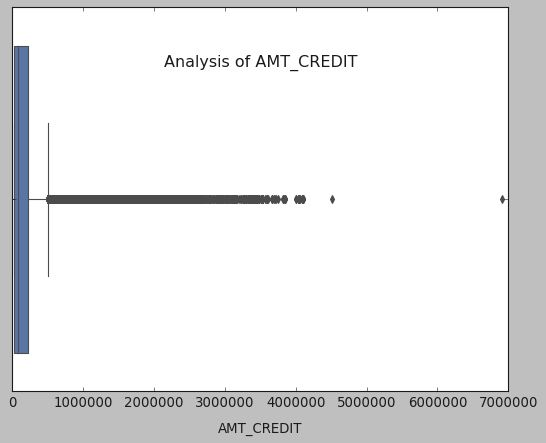

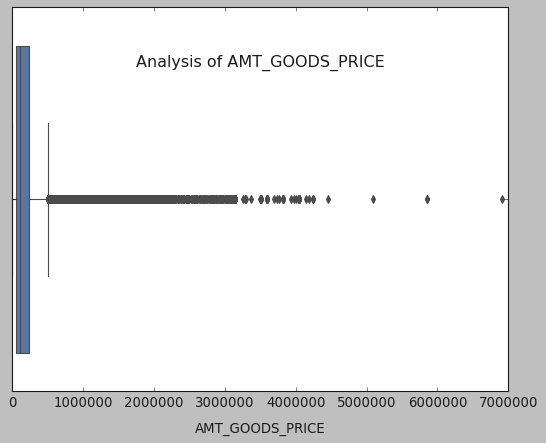

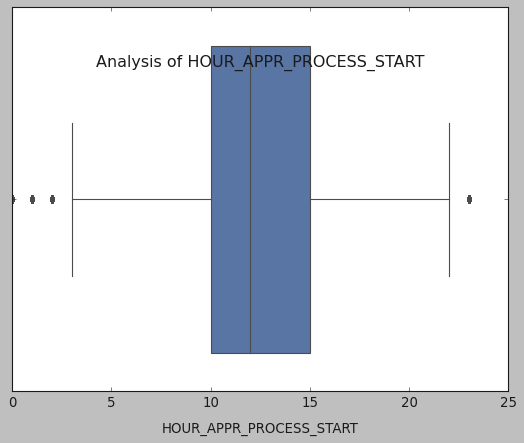

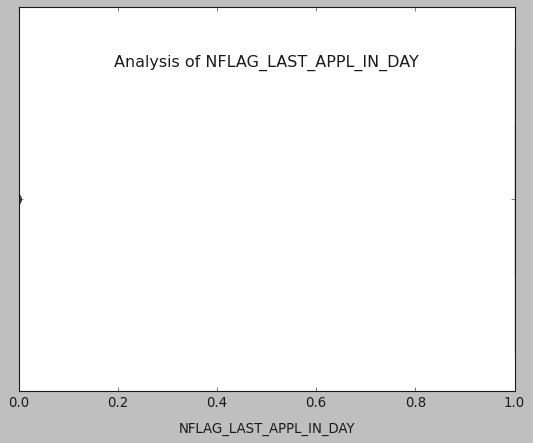

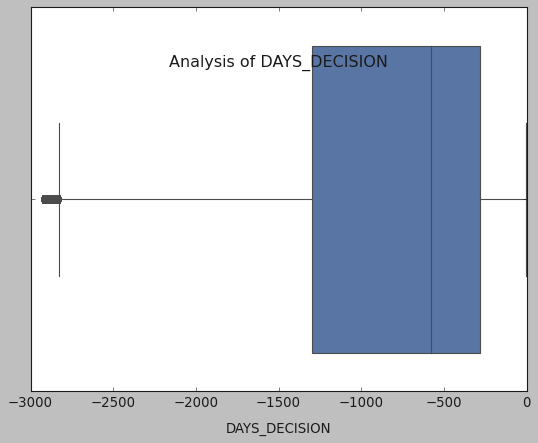

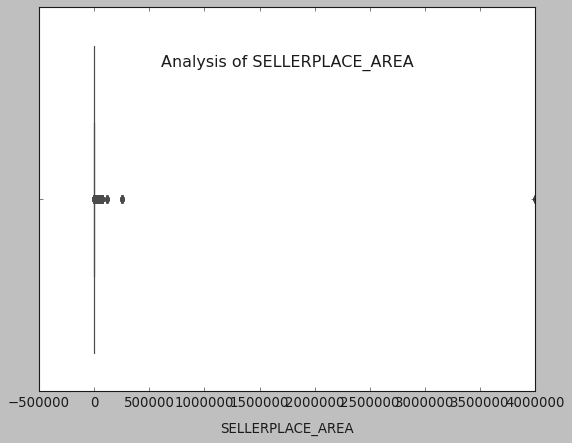

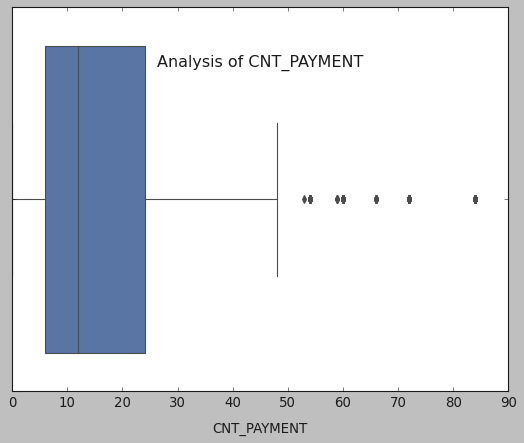

In [113]:

outlier_cols=list(df1.select_dtypes(include=['int64', 'float64']).columns)
for i in outlier_cols[2:]:
    outliers(i)


`Result:'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT'
All these variables have potential outliers, while 'HOUR_APPR_PROCESS_START' has potential outliers on both sides. The boxplot for 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE' is slim, same goes for 'NFLAG_LAST_APPL_IN_DAY' & 'SELLERPLACE_AREA`'

## Univariate analysis of Previous Application Data

In [114]:
# function to count plot for categorical variables
def count_uni(var):

    plt.style.use('classic')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(15,6))
    
    sns.countplot(x=var, data=df1,ax=ax,hue='NAME_CONTRACT_STATUS')
    ax.set_ylabel('Total Counts')
    ax.set_title(f'Frequency of {var}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    
    plt.show()

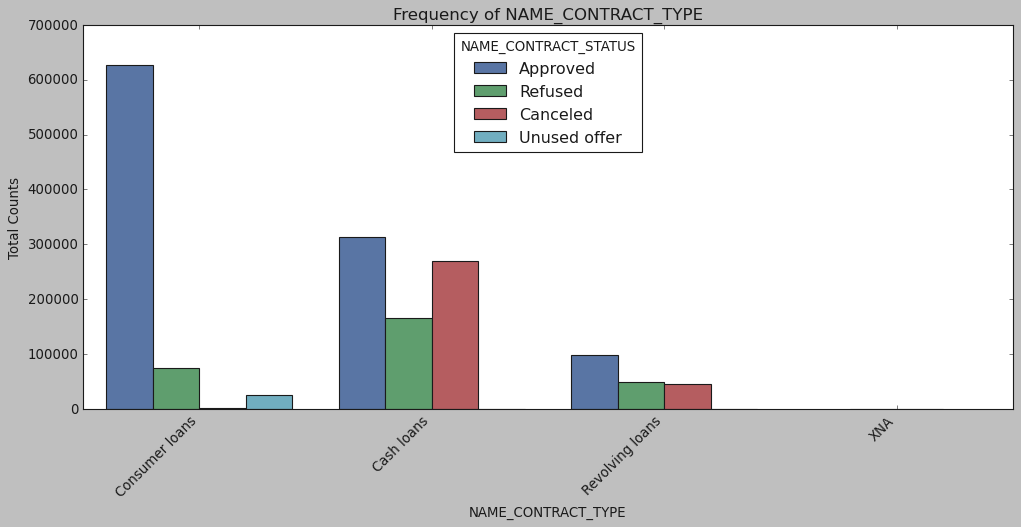

In [115]:
count_uni('NAME_CONTRACT_TYPE')

`Result: Frequency of consumer loans is highest and have highest approval too, Cash loans have high frequency but they have the highest cancellation status in graph`

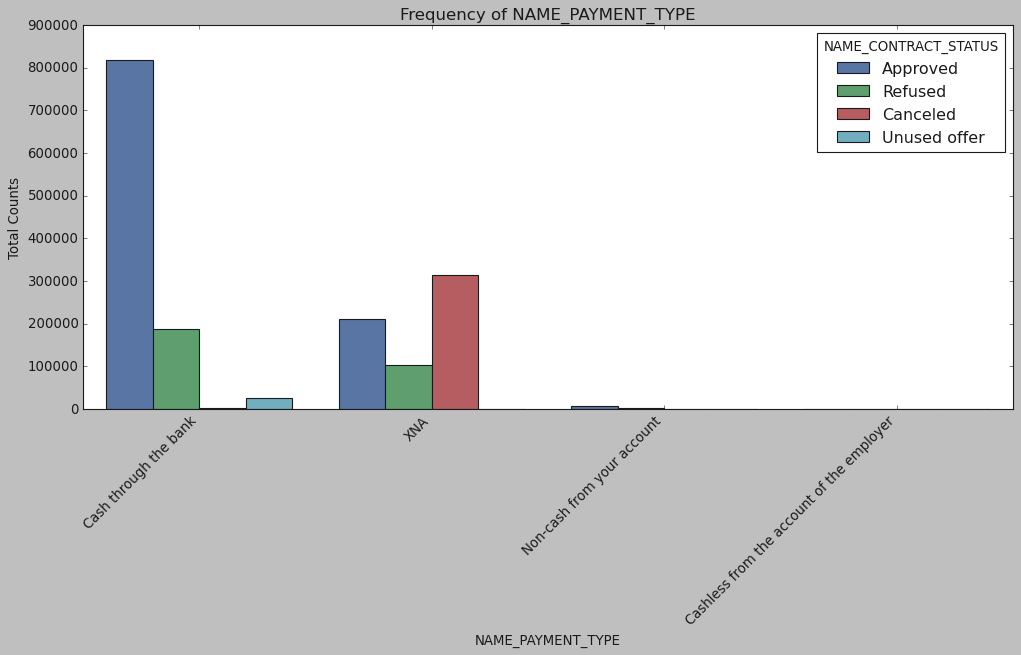

In [116]:
count_uni('NAME_PAYMENT_TYPE')

`Result:in the above chart cash through bank is most approved while cashless option is least favourable`

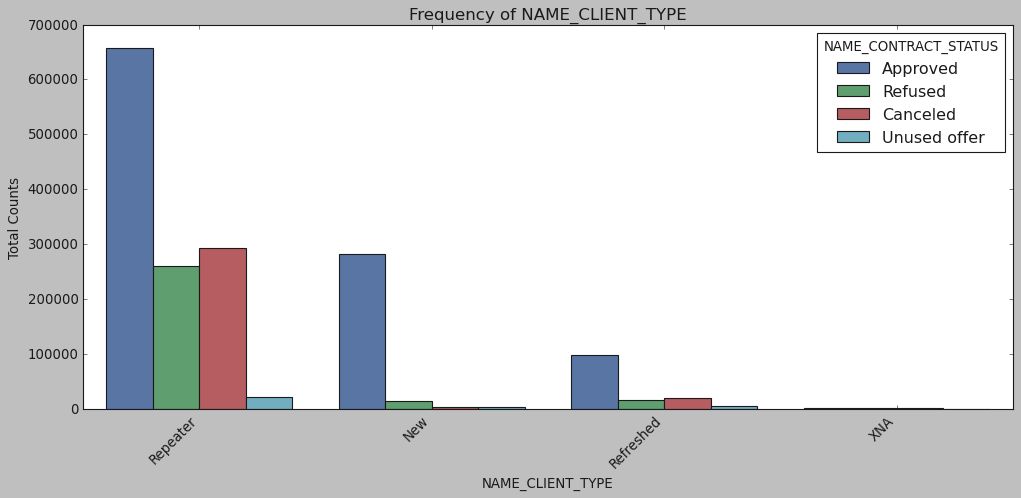

In [117]:
count_uni('NAME_CLIENT_TYPE')

In [118]:
(df1.NAME_CLIENT_TYPE.value_counts(normalize=True)*100)

Repeater     73.718757
New          18.043376
Refreshed     8.121654
XNA           0.116213
Name: NAME_CLIENT_TYPE, dtype: float64

`Result: Turns out Repeating customers applied for loan with more than 70%, the were also the most approved, refused, and cancelled their loans ,New customers got more approval status`

In [119]:
#Getting top 10 correlation Previous Application
corr=df1.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['col1','col2','correlation']
corr_df.dropna(subset=['correlation'],inplace=True)
corr_df['positive_correlation']=corr_df['correlation'].abs()
corr_df = corr_df.sort_values(by=['positive_correlation'], ascending=False)
corr_df.head(10)

col1             col2  correlation  positive_correlation
58   AMT_GOODS_PRICE  AMT_APPLICATION     0.999884              0.999884
59   AMT_GOODS_PRICE       AMT_CREDIT     0.993087              0.993087
47        AMT_CREDIT  AMT_APPLICATION     0.975824              0.975824
57   AMT_GOODS_PRICE      AMT_ANNUITY     0.820895              0.820895
46        AMT_CREDIT      AMT_ANNUITY     0.816429              0.816429
35   AMT_APPLICATION      AMT_ANNUITY     0.808872              0.808872
113      CNT_PAYMENT  AMT_APPLICATION     0.680630              0.680630
114      CNT_PAYMENT       AMT_CREDIT     0.674278              0.674278
115      CNT_PAYMENT  AMT_GOODS_PRICE     0.672129              0.672129
112      CNT_PAYMENT      AMT_ANNUITY     0.394535              0.394535

<Figure size 1600x640 with 0 Axes>

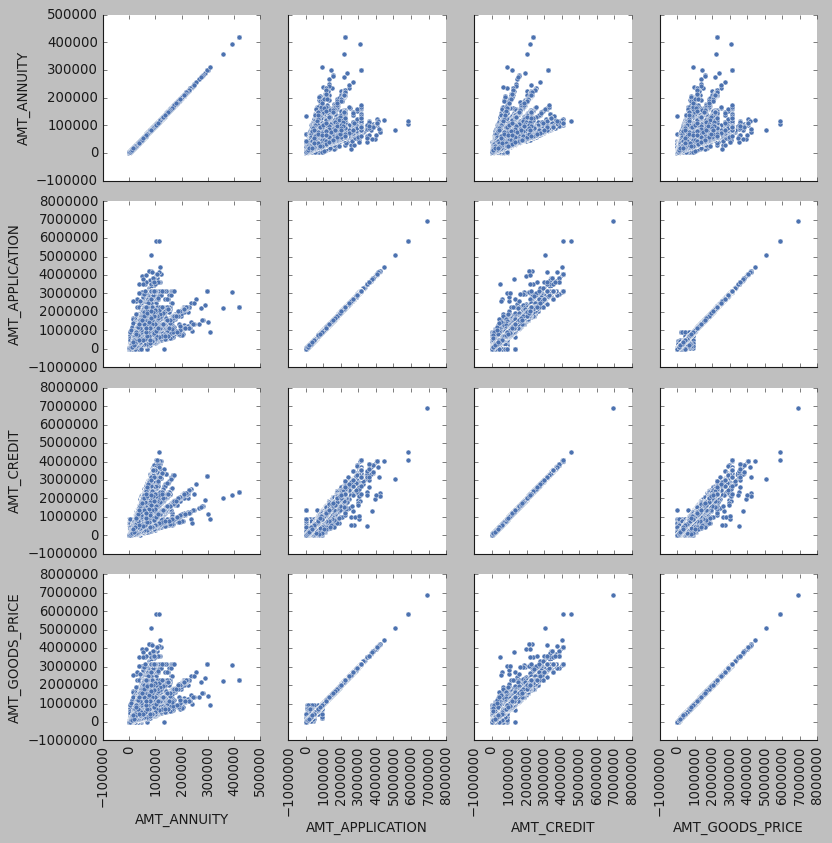

In [120]:
#plotting the relation between  highly corelated numeric variables
plt.figure(figsize=[20,8])
plt.style.use('classic')

g = sns.PairGrid(df1[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS']])
g.map(sns.scatterplot)
g.fig.draw(
    g.fig.canvas.get_renderer()
)  
for ax in g.axes.flat: 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

` Result:Increase of annuity increases following:
(1) credit client asked on the previous application
(2) Goods_ price of goods that clients mentioned on previous application.`

Amt_credit and Amt_application somewhat influence each other but relatively less than Amt_goods_price

Amt_application and Amt_goods_price influence each other, if one increase the other one too

## Bivariate analysis on categorical vs numerical using box plot

In [121]:
#bivariate analysis function
def box_plot(cat, num):

    plt.style.use('classic')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(9,9))
    
    sns.boxplot(x=cat,y = num, data=df1)
    ax.set_ylabel(f'{num}')
    ax.set_xlabel(f'{cat}')

    ax.set_title(f'{cat} VS {num}',fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
     
    plt.show()

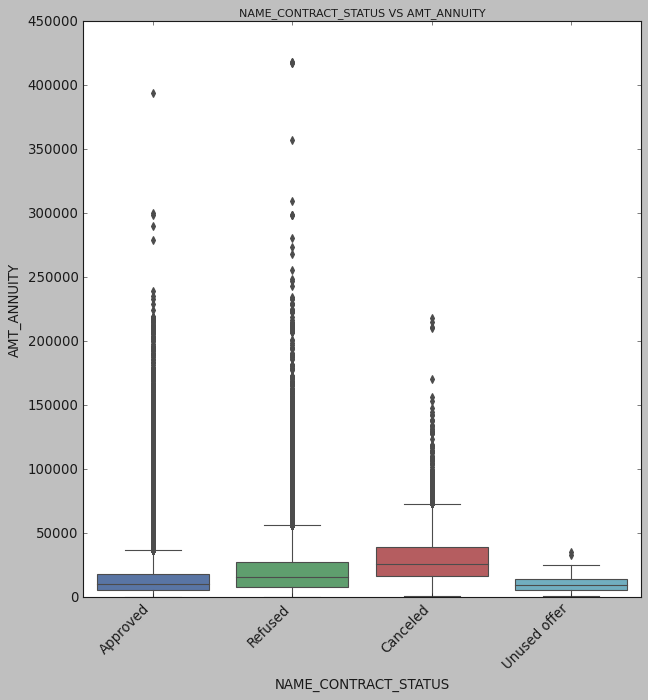

In [122]:
box_plot('NAME_CONTRACT_STATUS', 'AMT_ANNUITY')

`Result: People with Low amt annuity dont use their loans, clients with high annuity either are refused or get their application cancelled`

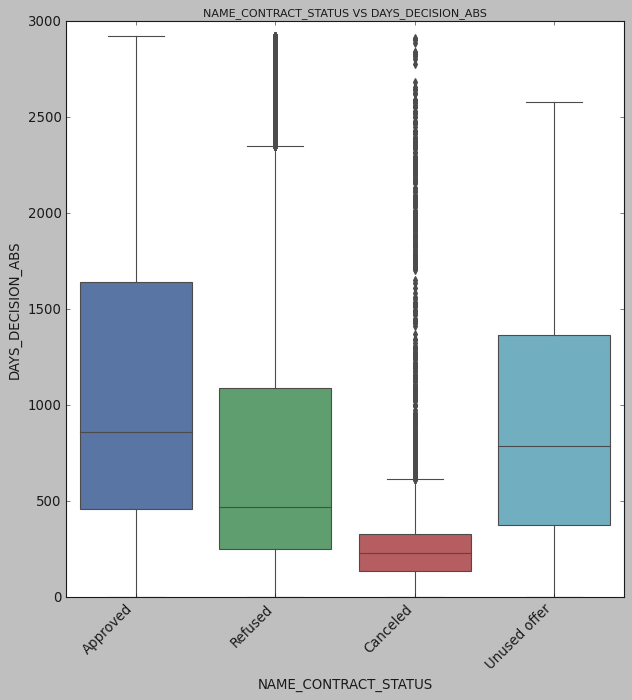

In [123]:
df1['DAYS_DECISION_ABS']=df1['DAYS_DECISION'].abs()
box_plot('NAME_CONTRACT_STATUS', 'DAYS_DECISION_ABS')  

`Result:Organisation usually takes more days to give approval on loan application, similarly it takes less amount of days to cancel out the application`

## Barplot for Analysis  

In [124]:
df1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_DECISION_ABS  
0         12.0           middle  POS mobile with interest                 73  
1         36.0       low_action          Cash X-Sell: low                164  
2         12.0             high         Cash X-Sell: high                301  
3         12.0           middle       Cash X-Sell: middle                512  
4         24.0             high         Cash Street: high                781

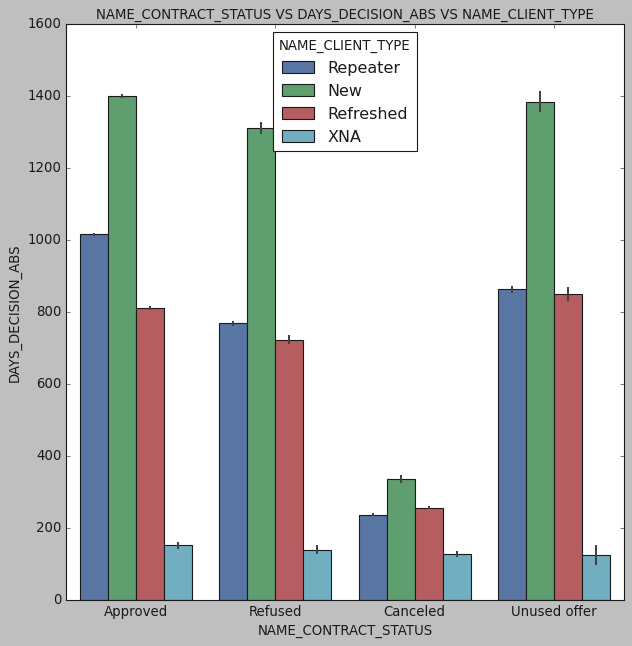

In [125]:
plt.figure(figsize=(9,9))
plt.style.use('classic')
plt.title('NAME_CONTRACT_STATUS VS DAYS_DECISION_ABS VS NAME_CLIENT_TYPE', fontsize=12)
ax = sns.barplot(x="NAME_CONTRACT_STATUS", y='DAYS_DECISION_ABS', hue="NAME_CLIENT_TYPE", data=df1)
plt.show()

`Result: We can infer from the barplot that when the client is new , in any case whether the organisation makes a decision it takes the most time for new clients, In case of repeated clients , bank takes more time to give approval than refusing or cancelling`

<AxesSubplot:>

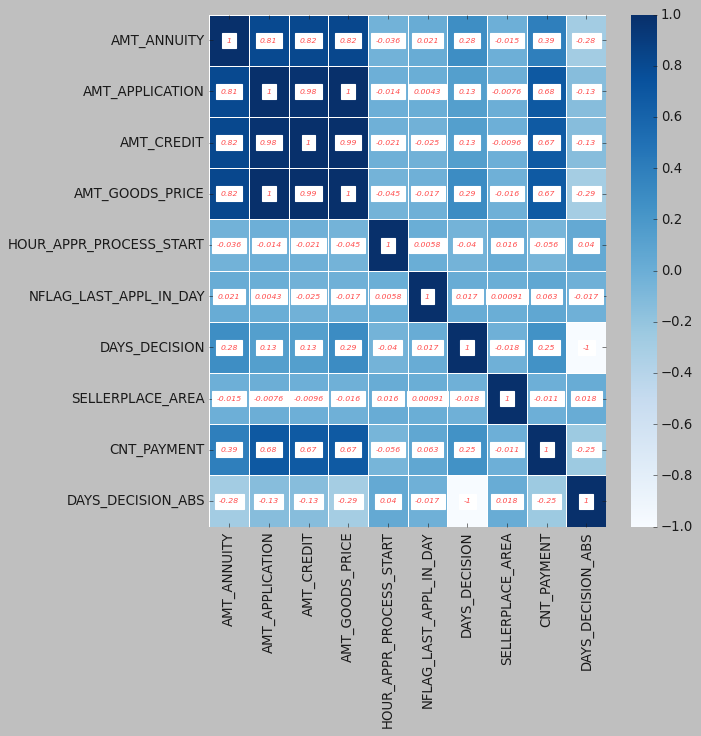

In [126]:
prev_corr=df1.iloc[0:,2:]
prev_corr.head()
plt.subplots(figsize=(8,8))
sns.heatmap((prev_corr.corr()),annot=True,cmap="Blues",linewidths=.5,annot_kws={'fontsize': 7,  'color':'red', 'alpha': 0.7,
                        'backgroundcolor': 'w', 'fontstyle': 'oblique'}, mask=False)

`Amt_annuity, Amt_Application, Amt_credit,Amt_Goods_price show strong relation in the heatmap above, and it holds true because approximate amount gets credited for which the application has been applied 
Amt_goods_price means the goods for which the application was applied, thus they too have co-relation among them`

#  I)Merging the files and analyzing the data


In [127]:
New_Data = pd.merge(df0, df1, how='inner', on=['SK_ID_CURR'])

In [128]:
New_Data.shape

(1413701, 105)

In [129]:
New_Data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 105 columns):
 #    Column                                Non-Null Count    Dtype   
---   ------                                --------------    -----   
 0    SK_ID_CURR                            1413701 non-null  int64   
 1    TARGET                                1413701 non-null  int64   
 2    NAME_CONTRACT_TYPE_x                  1413701 non-null  object  
 3    CODE_GENDER                           1413701 non-null  object  
 4    FLAG_OWN_CAR                          1413701 non-null  object  
 5    FLAG_OWN_REALTY                       1413701 non-null  object  
 6    CNT_CHILDREN                          1413701 non-null  int64   
 7    AMT_INCOME_TOTAL                      1413701 non-null  int64   
 8    AMT_CREDIT_x                          1413701 non-null  int64   
 9    AMT_ANNUITY_x                         1413701 non-null  int64   
 10   AMT_GOODS_PRICE_x           

In [130]:
New_Data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0            202500        406597   
1               N             0            270000       1293502   
2               N             0            270000       1293502   
3               N             0            270000       1293502   
4               Y             0             67500        135000   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0          24700             351000   Unaccompanied          Working   
1          35698            1129500          Family    State servant   
2          35698            1129500          Family    State servant   
3          35698            1129500          Family    State servant   
4           6750             135000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                           0        9461            637               3648   
1                           0       16765           1188               1186   
2                           0       16765           1188               1186   
3                           0       16765           1188               1186   
4                           0       19046            225               4260   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2              291           1               1                0   
3              291           1               1                0   
4             2531           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers                1   
1                 1           1           0      Core staff                2   
2                 1           1           0      Core staff                2   
3                 1           1           0      Core staff                2   
4                 1           1           0        Laborers                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0  

## J)Bivariate Analysis on Merged Data

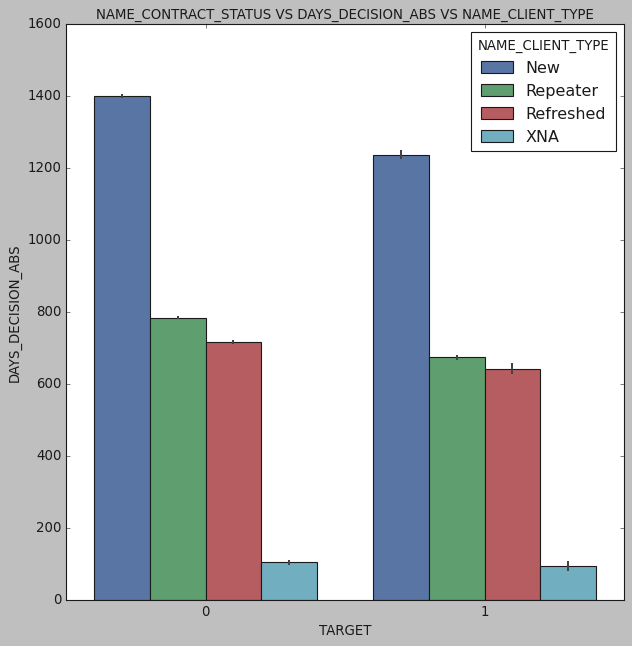

In [131]:
plt.figure(figsize=(9,9))
plt.style.use('classic')
plt.title('NAME_CONTRACT_STATUS VS DAYS_DECISION_ABS VS NAME_CLIENT_TYPE', fontsize=12)
ax = sns.barplot(x="TARGET", y='DAYS_DECISION_ABS', hue="NAME_CLIENT_TYPE", data=New_Data)
plt.show()

`Time taken for defaulters is comparitively less than non defaulters`

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS'>

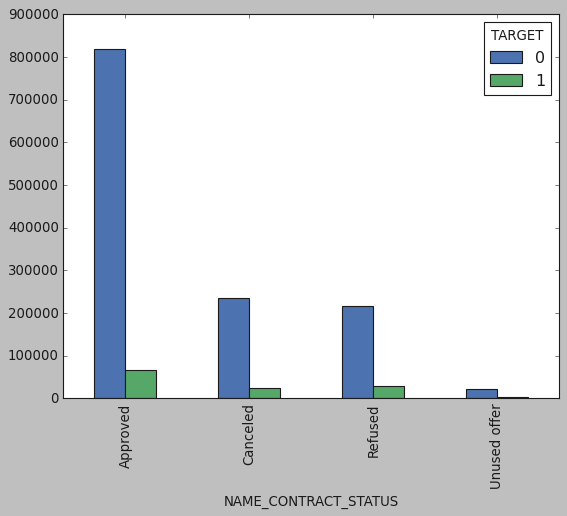

In [132]:
New_Data.pivot_table(values='SK_ID_CURR', 
                      index='NAME_CONTRACT_STATUS',
                      columns='TARGET',
                      aggfunc='count').plot.bar()

`Non defaulters have high cancelled and refusal frequency`

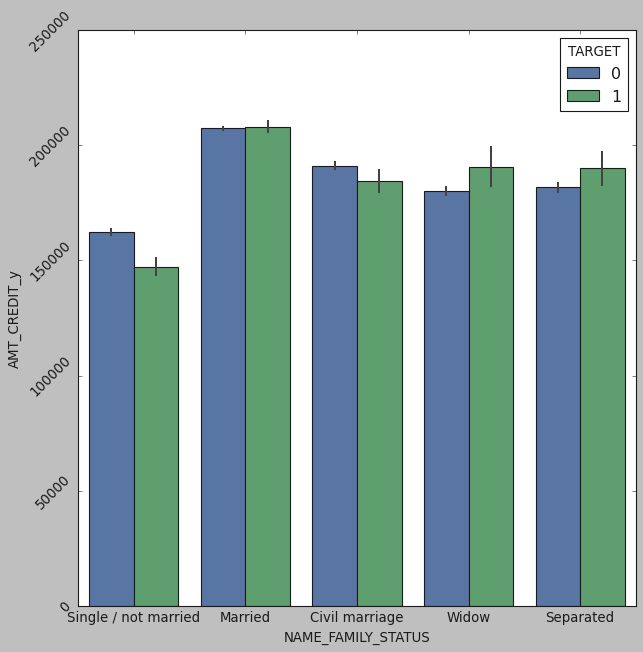

In [133]:
plt.figure(figsize=(9,9))
plt.yticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

sns.barplot( x='NAME_FAMILY_STATUS',y='AMT_CREDIT_y', hue="TARGET", data=New_Data)
plt.show()


`Spearated and Widow people have default ratio more along with higher credit amount`

In [134]:
drop_cols = New_Data[ New_Data!='XAP' ]
New_Data = drop_cols[ drop_cols!='XNA' ]

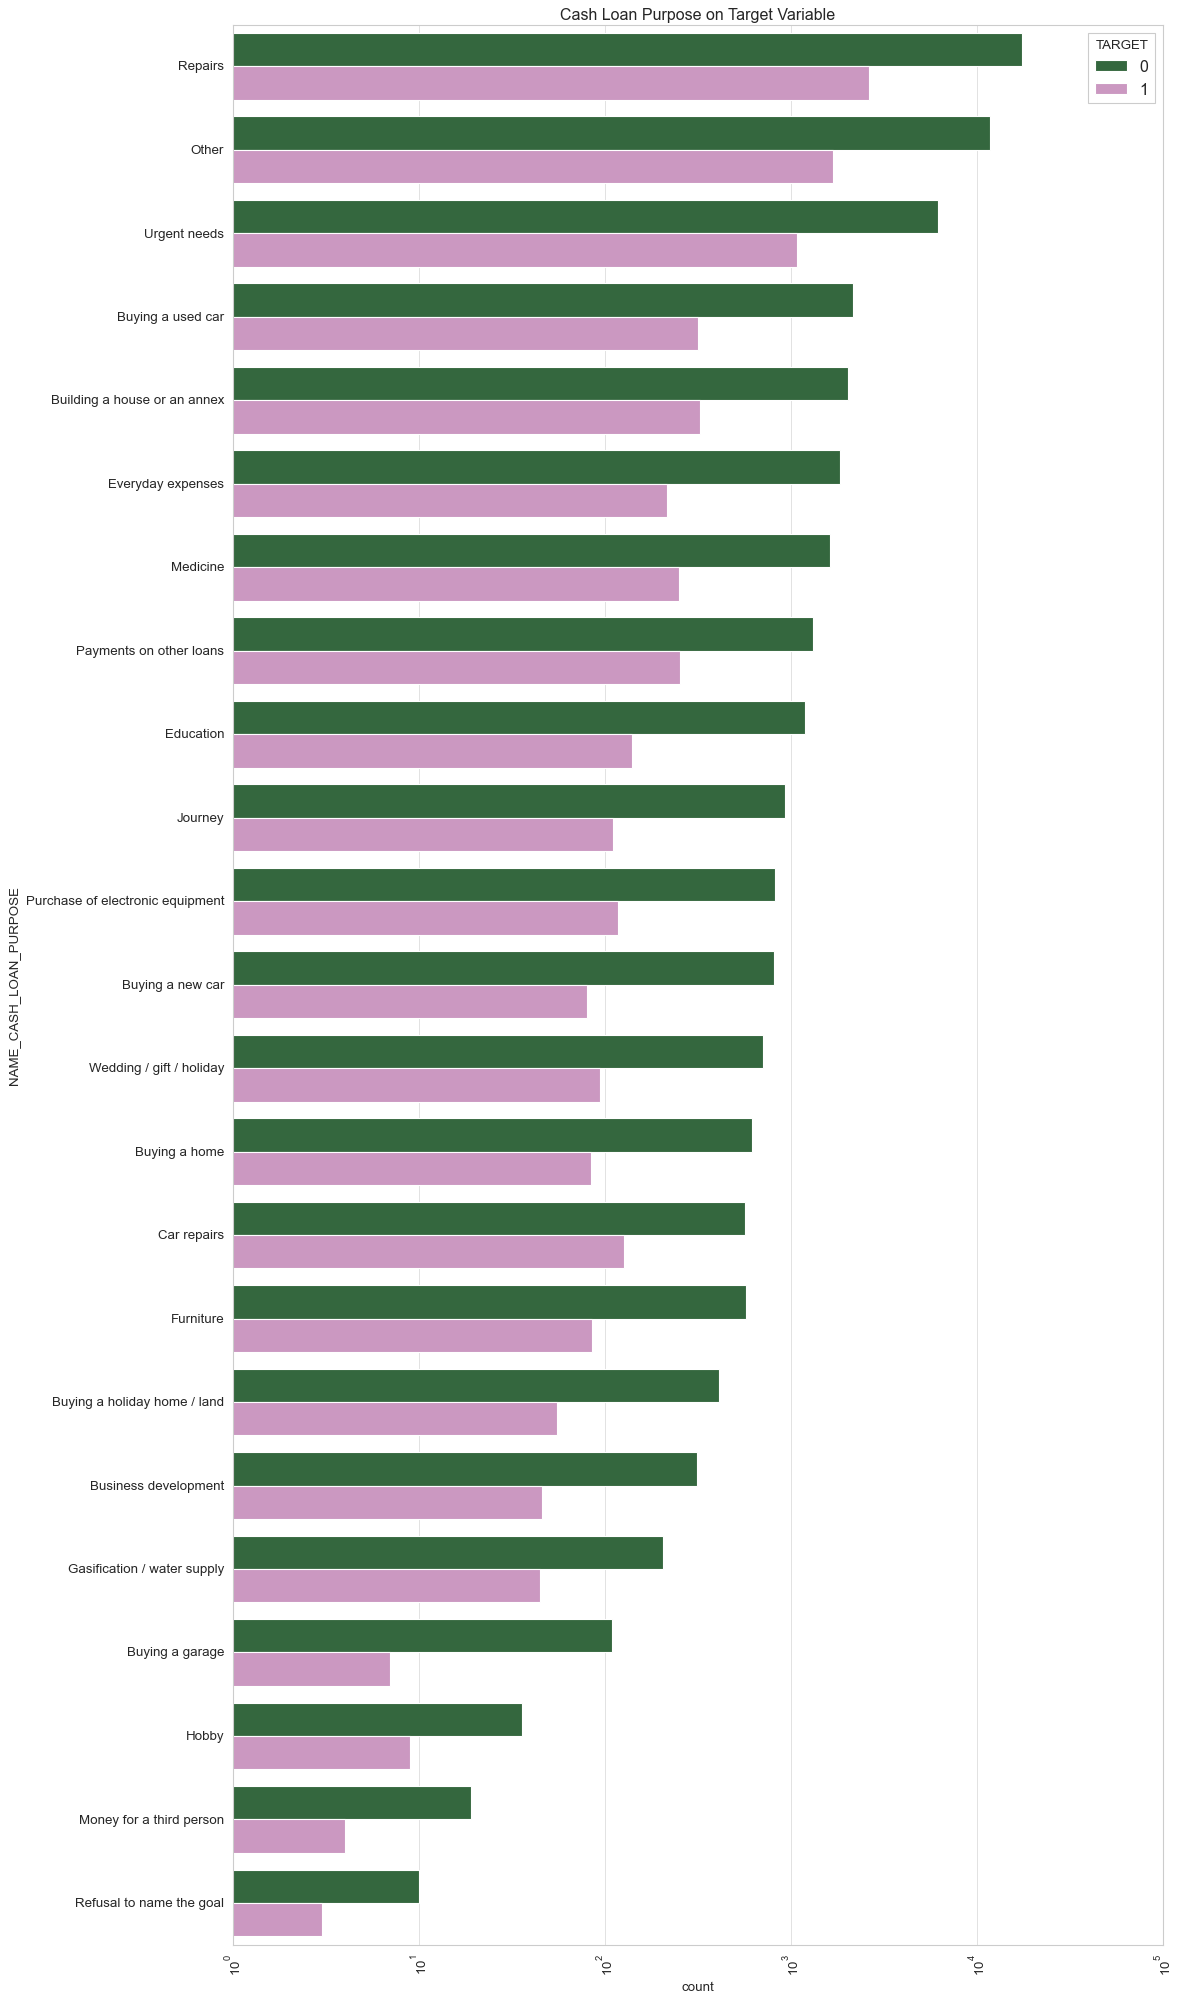

In [135]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,30))
plt.title('Cash Loan Purpose on Target Variable')
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
sns.countplot(data = New_Data, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=New_Data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET', palette='cubehelix') 
plt.show()

`Buying a holiday home/land, Business development, Buying a Garage, Buying a Home , wedding/gift/holiday, all these categories have higher non-defaulter and lower defaulter count`

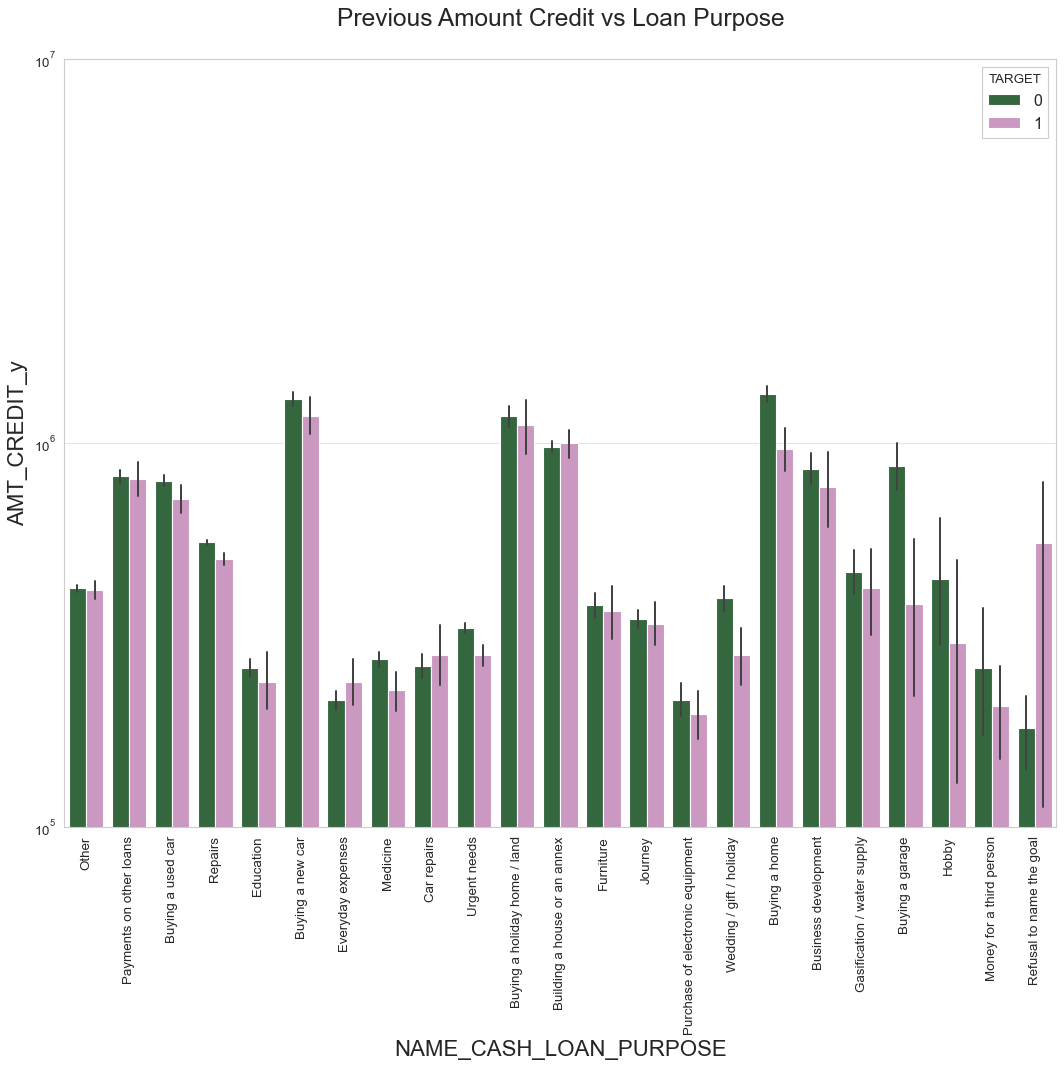

In [136]:
#Previous Amount Credit vs Loan Purpose
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.barplot(data =New_Data, x='NAME_CASH_LOAN_PURPOSE',hue='TARGET',y='AMT_CREDIT_y',orient='v', palette='cubehelix')
plt.title('Previous Amount Credit vs Loan Purpose')
plt.show()

`Following categories: Refusal to name the goal, building a home or an annex. have higher defaulters especially Refusal to name the goal.`

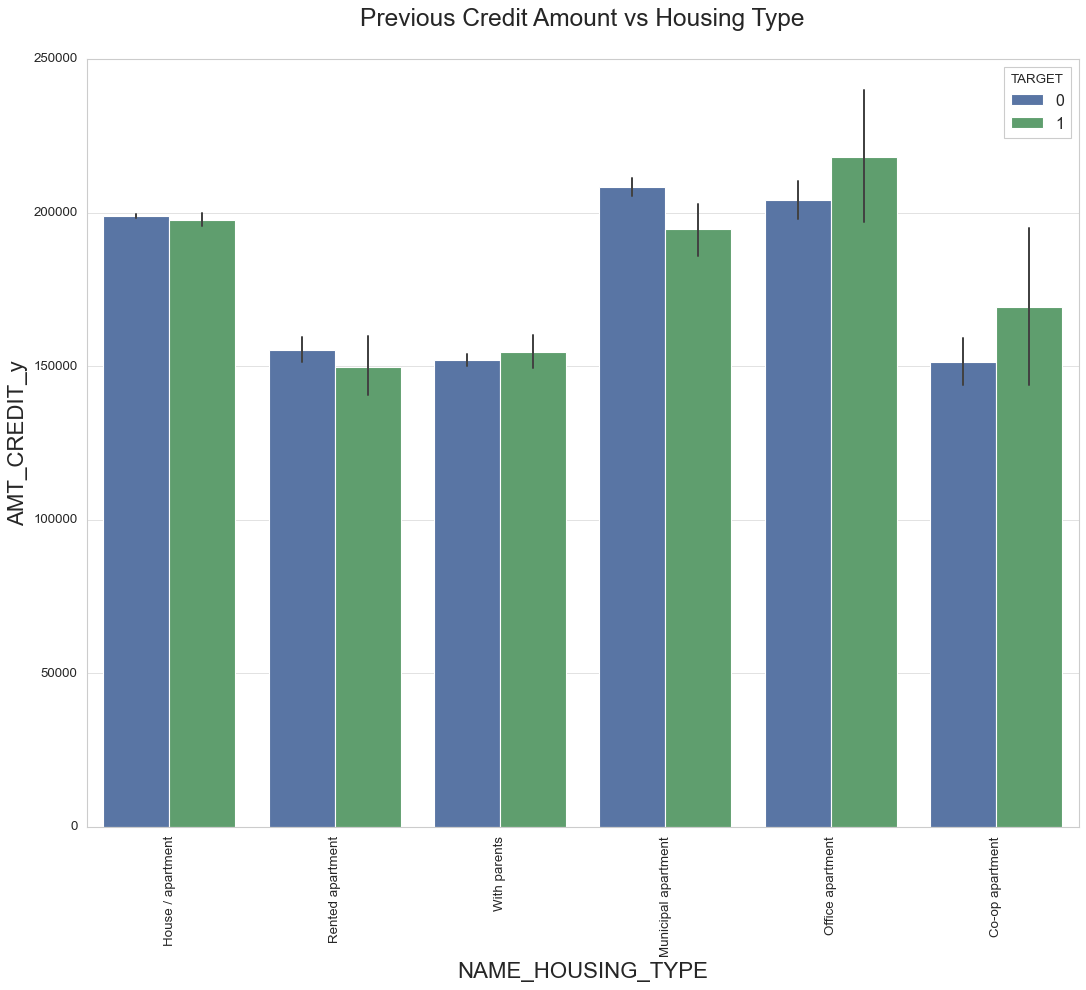

In [137]:
# bar plotting for Previous Credit Amount vs Housing Type
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =New_Data, y='AMT_CREDIT_y',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Previous Credit Amount vs Housing Type')
plt.show()

# K)Conclusion
`1)Banks should target following cash loan purposes more "Buying a holiday home/land, Business development, Buying a Garage" as they have paid their loans on time
2)Widow and Separated people have high defaults on larger amount credits, so Banks should give them less credit
3)Undisclosed Goals for loan purpose, this category has payment difficulties, so maybe for this category Bank should put a cap on amount credit or increase rejection ratio.
4)Non-Defaulters have slightly higher canceled and refused status, Bank should use this indicator and work on bringing down the ratio for non-defaulters.
5)The bank should have taken more time and do their due diligence on loan applications as defaulters who are either New or Repeaters got their decision in less time than Non-Defaulters.
6)Lastly Banks should put a capping on amount credit on clients who have co-op apartment accommodation or office-apartment, as they have high defaulters.`